# Plot actin positions

## This script carries out the memory-intensive job of loading and plotting all hip1r-bound actin points.
## All points are recalibrated in XY relative to the center of the bud.
## outputs are heat maps of position of actin, and FWHM.
## distribution in Z, arp and end numbers/ positions too

## Import actin model points

In [1]:
import pickle
import sys
import pandas as pd
import numpy as np
import os

# with open('branched-actin-points_hip1r.pkl', 'rb') as f:
#     new_actin_pos = pickle.load(f, encoding='latin1') 

# get recalibrated R and Z(can do for ends too)

working_dir = '/Users/makamats/Google Drive/drubin_lab/Modeling/cytosim_current/cytosim/parameter_sweeps_maxReporting/simulations/'

# output_name = 'endocytosis_cut'
# output_name = 'endocytosis2_sims'
# output_name = 'endocytosis'
output_name = 'endocytosis_cut_capped'

output_dir = working_dir + output_name + '_output'
# output_dir = working_dir + 'endocytosis_output' 
# output_dir = working_dir + 'endocytosis_cut_output'
# output_dir = working_dir + 'endocytosis_2 sims' 

# decide whether to load actin positions and fores
load_actin_positions_forces = 'no'

report_loc = '/Users/makamats/Google Drive/drubin_lab/Modeling/cytosim_current/cytosim/bin/report'
os.chdir(working_dir)

solid_positions = pd.read_pickle(output_dir+'/dataframes/bud_positions.pkl')

final_bound_hip1r = pd.read_pickle(output_dir+'/dataframes/final_bound_hip1r.pkl')

# branched_actin_bound_ends = pd.read_pickle(output_dir+'/dataframes/branched-actin-bound-to-hip1r-ends_positions_forces_recalibrated.pkl')

branched_actin_bound_arp  = pd.read_pickle(output_dir+'/dataframes/branched-actin-bound-to-hip1r_arp.pkl')

branched_actin_bound_ends = pd.read_pickle(output_dir+'/dataframes/branched-actin-bound-to-hip1r-ends_recalibrated.pkl')

if load_actin_positions_forces =='yes':
   
    with open(output_dir+'/dataframes/branched-actin-points_hip1r_recalibrated.pkl', 'rb') as f:
        new_actin_pos = pickle.load(f, encoding='latin1') 

print('all dataframes loaded')


all dataframes loaded


In [2]:
# large files opening:
# https://stackoverflow.com/questions/42653386/does-pickle-randomly-fail-with-oserror-on-large-files?rq=1

# def try_to_load_as_pickled_object_or_None(filepath):
#     """
#     This is a defensive way to write pickle.load, allowing for very large files on all platforms
#     """
#     max_bytes = 2**31 - 1
#     try:
#         input_size = os.path.getsize(filepath)
#         bytes_in = bytearray(0)
#         with open(filepath, 'rb') as f_in:
#             for _ in range(0, input_size, max_bytes):
#                 bytes_in += f_in.read(max_bytes)
#         obj = pickle.loads(bytes_in)
#     except:
#         return None
#     return obj

# branched_actin_bound_ends_recalibrated = try_to_load_as_pickled_object_or_None(output_dir+'/dataframes/branched-actin-bound-to-hip1r_positions_forces_recalibrated.pkl')
                                                                  
                                                                

In [3]:
# import random filaments negative control

import_random_filaments = 'yes'

if import_random_filaments=='yes':
    random_filament_ends = pd.read_pickle('/Users/makamats/Google Drive/drubin_lab/Modeling/cytosim_current/cytosim/simulations/random_actin/dataframes/actin_plus_minus_ends.pkl')
    print('imported random filament neg control')
    

imported random filament neg control


In [2]:
time, run, bound = [], [], []
for k, v in new_actin_pos.fiber_id.items():
    time.append(k[1])
    run.append(k[0])

for k, v in new_actin_pos.bound_hip1rs.items():    
    bound.append(len(v))
new_actin_pos['Test_bound'] = pd.Series(bound, index=new_actin_pos.index)
new_actin_pos['Test_time'] = pd.Series(time, index=new_actin_pos.index)
new_actin_pos['Test_run'] = pd.Series(run, index=new_actin_pos.index)


runs   = sorted(list(set(new_actin_pos.Test_run)), key = lambda x:int(x[-2:]))
times = sorted(list(set(new_actin_pos.Test_time)))

# times  = sorted(list(set(new_actin_pos.Test_time)), key = lambda x:int(x[-2:]))

new_actin_pos.head()


NameError: name 'new_actin_pos' is not defined

## Plot 

In [9]:
save_figures='yes'

import matplotlib.pyplot as plt  # plotting
plt.style.use('seaborn-colorblind') # set plot style
plt.cool()                          # heatmap color scheme
%matplotlib inline

import seaborn as sns  # nicer plotting
sns.set_style('whitegrid')  # set plot style

from scipy.stats import binned_statistic_2d

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
import datetime


def plot_errorbar(means, stds, c, label):

    plt.figure(figsize=(6,4))
    plt.rc('font', size=20) 
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20) 

    color=c

    plt.plot(means.index,means, c=color)
    times_cur = means.index
    yminus=means-stds
    yplus=means+stds

    plt.fill_between(times_cur, np.asarray(yminus), np.asarray(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 

    plt.xlabel('Time (s)')
    plt.ylabel(label)

    plt.tick_params(reset=True, color='black', direction='in', length=4)
    plt.grid(False)

    plt.tight_layout()

now = datetime.datetime.now()
date = now.strftime('%Y%m%d')
pref = date+'_'+output_name
pref


'20190416_endocytosis_cut_capped'

In [5]:
# from matplotlib.colors import LogNorm

# plt.figure(figsize=(10,8))

# # set position

# x = new_actin_pos['xpos_recalibrated']*1000
# y = (new_actin_pos['zpos']+0.4)*(-1000)

# plt.hist2d(x, y, bins= [100,100])

# # log scale 
# # plt.hist2d(x, y, bins = 40, norm=LogNorm())


# cb = plt.colorbar(label = 'number of actin points')
# oldlabels = cb.ax.get_yticklabels()
# print(map(lambda x: x.get_text(),oldlabels))
# newlabels = map(lambda x: str(3.64 * float(x.get_text())), oldlabels)
# print(newlabels)
# cb.ax.set_yticklabels(newlabels)

# plt.xlim([-300, 300])
# plt.ylim(bottom = -200)

# plt.xlabel('r-distance from bud center (nm)')
# plt.ylabel('z-distance from membrane (nm)')

# plt.tight_layout()

# os.chdir("..")

# if save_figures == 'yes': 
#     plt.savefig('figures/'+pref+'_actin_heat_map.png')
#     plt.savefig('figures/'+pref+'_actin_heat_map.pdf')




# # if save_figures == 'yes': 
# #         plt.savefig(working_dir+'figures/'+pref+'_fiber_points_zpos-vs-rpos_2dhist.png')

## number of actin monomers

In [ ]:
# # all time points and runs together


# plt.cm.get_cmap('hot')
# plt.set_cmap('hot')


# x = new_actin_pos['xpos_recalibrated']*1000
# y = (new_actin_pos['zpos']+0.4)*(-1000)

# # bin mean positions along run

# # new_actin_pos_meanPerTime = new_actin_pos.pivot_table(
# #     values=['xpos_recalibrated', 'zpos'], 
# #     index=['run', 'time'], aggfunc={'xpos_recalibrated': np.mean, 'zpos': np.mean}).reset_index()

# # new_actin_pos_meanPerRunAndTime = new_actin_pos.pivot_table(
# #     values=['xpos_recalibrated', 'zpos'], 
# #     index=['time'], aggfunc={'xpos_recalibrated': np.mean, 'zpos': np.mean}).reset_index()
# # new_actin_pos.tail()

# # bin mean positions along time

# # new_actin_pos_time=new_actin_pos.loc[new_actin_pos['Test_time']>timept-0.5].loc[new_actin_pos['Test_time']<=timept+0.5]

# model_points,xs,ys=np.histogram2d(x,y,bins=[100,100])
# model_points=np.flipud(np.rot90(model_points))

# # histogram (sum) for one time

# # mean actin in terms of run and time: just divide by number runs and number time points
# # this is only accurate if length times is same for all sims

# times = sorted(list(set(new_actin_pos.Test_time)))



# actin_subunits=model_points/len(runs)/len(times)*10/2.75
# plt.pcolormesh(xs, ys, actin_subunits)

# plt.xlim([-300, 300])
# plt.ylim(bottom = -200)

# plt.xlabel('r-distance from bud center (nm)')
# plt.ylabel('z-distance from membrane (nm)')

# cb = plt.colorbar(label = 'Actin monomers')
# plt.xticks(size=20)
# plt.yticks(size=20)
# # plt.labels(size=20)

# if save_figures == 'yes': 
#     plt.savefig('figures/actin_positions_monomers_XZ_all.png')


## Plot actin points over 1 s binned intervals

In [ ]:
# # group by run and time, get total number actin points per run and time point

# actin_points_by_run_time = new_actin_pos.groupby(level=['run', 'time']).fiber_point.count()

# # convert to monomers

# actin_monomers_by_run_time = actin_points_by_run_time*10/2.75

# actin_monomers_by_time_mean = pd.DataFrame(actin_monomers_by_run_time).groupby('time').mean()
# actin_monomers_by_time_std = pd.DataFrame(actin_monomers_by_run_time).groupby('time').std()



In [ ]:
# # vs time
# plt.cm.get_cmap('hot')
# plt.set_cmap('hot')


# for timept in range(1,16):

#     # bin ± 0.5s as interval

#     new_actin_pos_time=new_actin_pos.loc[new_actin_pos['Test_time']>timept-0.5].loc[new_actin_pos['Test_time']<=timept+0.5]

# #     times_per_timept=new_actin_pos_time.
#     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))
# #     print(times_per_timept)
    
#     plt.figure(figsize=(10,8))

#     # get position, averaged over runs and the time point range

#     x = new_actin_pos_time['xpos_recalibrated']*1000
#     y = (new_actin_pos_time['zpos']+0.4)*(-1000)

#     # set number of bins (kind of like pixel size) here. 
    
#     # x: 600 points, 30 bins is about 20 nm pixel.
#     # z: about 10 nm pixel
    
#     model_points,xs,ys=np.histogram2d(x,y,bins=[30,22],range=[[-300,300],[-200, 20]])
#     model_points=np.flipud(np.rot90(model_points))

#     # histogram (sum) for one time

#     # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
#     # assuming that nb time points is same for all runs. convert from model points to subunits.

#     actin_subunits=model_points/len(runs)/times_per_timept*10/2.75
    
#     plt.rcParams.update({'font.size': 35})


#     plt.pcolormesh(xs, ys, actin_subunits)

#     plt.xlim([-300, 300])
#     plt.ylim([-200, 5])

#     plt.xlabel('X (nm)')
#     plt.ylabel('Z (nm)')

#     cb = plt.colorbar(label = 'Actin monomers')
#     plt.title('Time ' + str(timept) + ' s')

#     # log scale 
#     # plt.hist2d(x, y, bins = 40, norm=LogNorm())


#     plt.xlim([-300, 300])
#     plt.ylim(bottom = -199)

#     # max colormap to show
    
#     plt.clim([0, 15])
    
#     plt.xlabel('x (nm)')
#     plt.ylabel('Z (nm)')
    
#     plt.xticks(size=24)
#     plt.yticks(size=24)

#     plt.tight_layout()
    
#     if save_figures == 'yes': 
#         plt.savefig(working_dir+'figures/actin_map_XZ_time bin '+str(timept)+' s.png')
#         plt.savefig(working_dir+'figures/actin_map_XZ_time bin '+str(timept)+' s.pdf')

In [ ]:
# group by run and time, get total number actin points per run and time point

actin_points_by_run_time = new_actin_pos.groupby(level=['run', 'time']).fiber_point.count()

# convert to monomers

actin_monomers_by_run_time = actin_points_by_run_time*10/2.75

actin_monomers_by_time_mean = pd.DataFrame(actin_monomers_by_run_time).groupby('time').mean()
actin_monomers_by_time_std = pd.DataFrame(actin_monomers_by_run_time).groupby('time').std()



## Plot actin points over 1 s binned intervals, as subplot

time 1


/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


time 3
time 5
time 7
time 9
time 11
time 13
time 15


<Figure size 432x288 with 0 Axes>

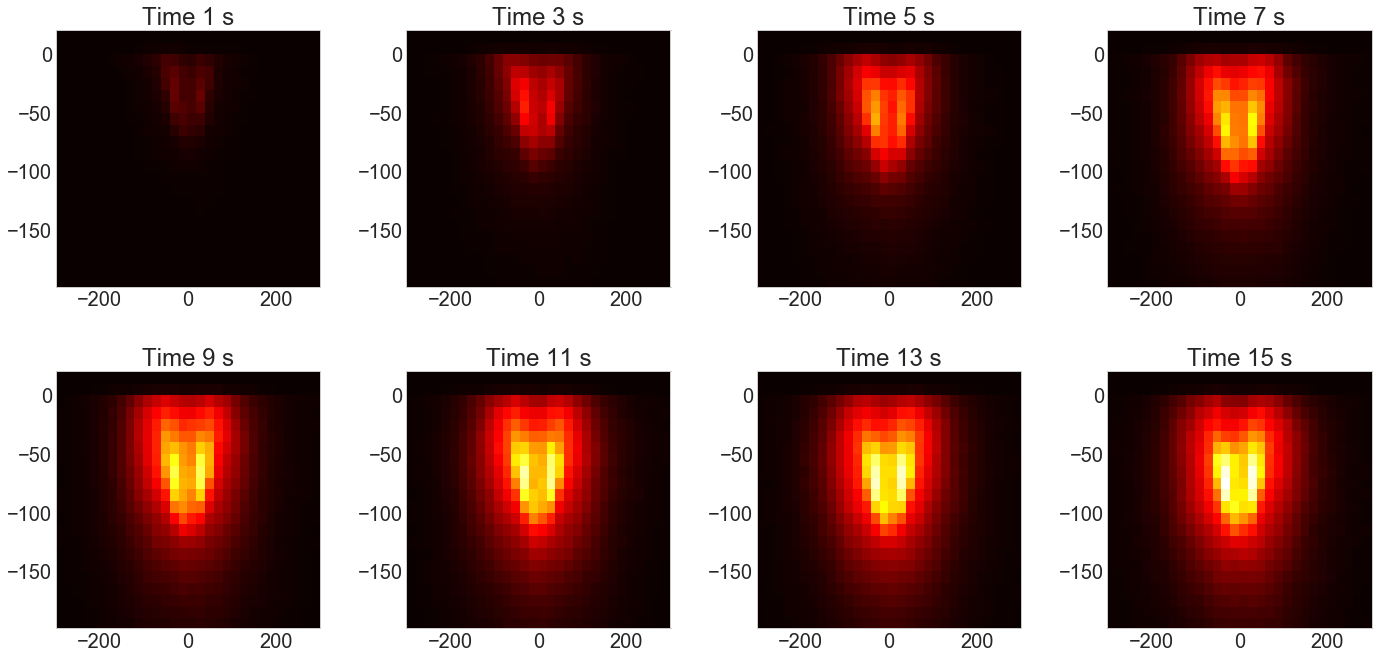

In [23]:
plt.cm.get_cmap('hot')
plt.set_cmap('hot')

plt.figure(figsize=(20,10))


# f, axarr = plt.subplots(2, 4, sharex=True, sharey=True)

# plot one second intervals, show every other time point.

for i, timept in enumerate(range(1,16,2),start=1):
    
#     print(i)
    print('time ' + str(timept))
    
    # bin ± 0.5s as interval

    new_actin_pos_time=new_actin_pos.loc[new_actin_pos['Test_time']>timept-1].loc[new_actin_pos['Test_time']<=timept+1]

#     times_per_timept=new_actin_pos_time.
    times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))
#     print(times_per_timept)
    

    # set position

    x = new_actin_pos_time['xpos_recalibrated']*1000
    y = (new_actin_pos_time['zpos']+0.4)*(-1000)

    # set number of bins (kind of like pixel size) here. 
    
    # x: 600 points, 30 bins is about 20 nm pixel.
    # z: about 10 nm pixel
    
    model_points,xs,ys=np.histogram2d(x,y,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points=np.flipud(np.rot90(model_points))

    # histogram (sum) for one time

    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
    # assuming that nb time points is same for all runs. using one model point = 10 nm and one actin subunit is 2.75 nm.

    actin_subunits=model_points/len(runs)/times_per_timept*10/2.75

    plt.subplot(2, 4, i)

    plt.pcolormesh(xs, ys, actin_subunits)
#     plt.rcParams.update({'font.size': 24})


#     plt.xlim([-300, 300])
#     plt.ylim([-200, 5])

#     plt.xlabel('X (nm)')
#     plt.ylabel('Z (nm)')

#     cb = plt.colorbar(label = 'Actin monomers')
    plt.title('Time ' + str(timept) + ' s', fontsize=24)

    # log scale 
    # plt.hist2d(x, y, bins = 40, norm=LogNorm())


    plt.xlim([-300, 300])
    plt.ylim(bottom = -199)

    # max colormap to show
    
    plt.clim([0, 55])
    
#     plt.xlabel('x (nm)')
#     plt.ylabel('Z (nm)')
    
    plt.xticks(size=20)
    plt.yticks(size=20)

    plt.tight_layout()
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_actin_map_XZ_time_subplots.png')
    plt.savefig('../figures/'+pref+'_actin_map_XZ_time_subplots.pdf')
    

In [33]:
# vs time,  1 s intervals, save each time point separately
#  this code is good for movies. there are ways to make it directly a movie,
# but other option is to drop them into imagej.

plt.cm.get_cmap('hot')
plt.set_cmap('hot')

# plt.subplots(2, 2, sharex=True, sharey=True)

for timept in range(1,16):

    # bin ± 0.5s as interval

    new_actin_pos_time=new_actin_pos.loc[new_actin_pos['Test_time']>timept-1].loc[new_actin_pos['Test_time']<=timept]

#     times_per_timept=new_actin_pos_time.
    times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))
#     print(times_per_timept)
    
    plt.figure(figsize=(8,6))

    # set position

    x = new_actin_pos_time['xpos_recalibrated']*1000
    y = (new_actin_pos_time['zpos']+0.4)*(-1000)

    # set number of bins (kind of like pixel size) here. 
    
    # x: 600 points, 30 bins is about 20 nm pixel.
    # z: about 10 nm pixel
    
    model_points,xs,ys=np.histogram2d(x,y,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points=np.flipud(np.rot90(model_points))

    # histogram (sum) for one time

    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
    # assuming that nb time points is same for all runs

    actin_subunits=model_points/len(runs)/times_per_timept*10/2.75
    

    plt.pcolormesh(xs, ys, actin_subunits)

    plt.xlim([-300, 300])
    plt.ylim([-200, 5])
    
    cb = plt.colorbar(label = 'Actin monomers')
    cb.ax.tick_params(labelsize=16) 
    plt.title('Time ' + str(timept) + ' s', fontsize=20)

    # log scale 
    # plt.hist2d(x, y, bins = 40, norm=LogNorm())


    plt.xlim([-300, 300])
    plt.ylim(bottom = -199)

    # max colormap to show
    
    plt.clim([0, 55])
    
    plt.xlabel('X (nm)', fontsize = 18)
    plt.ylabel('Z (nm)', fontsize = 18)
    
    plt.xticks(size=16)
    plt.yticks(size=16)

    plt.tight_layout()
    
    if save_figures == 'yes': 
        plt.savefig('../figures/actin_map_XZ_time bin '+str(timept)+' s.png', dpi=500)
        plt.savefig('../figures/actin_map_XZ_time bin '+str(timept)+' s.pdf')
        
  

NameError: name 'new_actin_pos' is not defined

<Figure size 432x288 with 0 Axes>

## Find FWHM

In [ ]:
# https://stackoverflow.com/questions/10582795/finding-the-full-width-half-maximum-of-a-peak

# proof of principle and graph of measurement

import scipy.optimize as opt
from scipy.stats import norm

x = new_actin_pos['xpos_recalibrated']*1000
y = (new_actin_pos['zpos']+0.4)*(-1000)


# Fit gaussian

mean,std=norm.fit(x)

plt.hist(x, bins=30, normed=True)
xmin, xmax = plt.xlim()
x_plt = np.linspace(xmin, xmax, 100)
y_plt = norm.pdf(x_plt, mean, std)
plt.plot(x_plt, y_plt)
FWHM = 2*np.sqrt(2*np.log(2))*std
plt.title('Actin X position FWHM: '+str(round(FWHM))+ ' nm')

plt.axvspan(mean-FWHM/2, mean+FWHM/2, facecolor='g', alpha=0.5)
plt.show()

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'actin_positions_X_dist_all.png')

# in Z

# with gaussian fitting

mean,std=norm.fit(y)
plt.hist(y, bins=30, normed=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)
FWHM = 2*np.sqrt(2*np.log(2))*std
plt.title('Actin Z position FWHM: '+str(round(FWHM))+ ' nm')

plt.axvspan(mean-FWHM/2, mean+FWHM/2, facecolor='g', alpha=0.5)
plt.show()

# with peak finding?



if save_figures == 'yes': 
    plt.savefig(working_dir+'../figures/'+pref+'actin_positions_Z_dist_all.png')


In [ ]:
mean,std=norm.fit(y)
plt.hist(y, bins=30, normed=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)
FWHM = 2*np.sqrt(2*np.log(2))*std
plt.title('Actin Z position FWHM: '+str(round(FWHM))+ ' nm')

plt.axvspan(mean-FWHM/2, mean+FWHM/2, facecolor='g', alpha=0.5)
plt.show()


## Over time FHWM ± std

In [ ]:
# over time

In [6]:
# import numpy as np
import scipy.optimize as opt
from scipy.stats import norm

# save_figures='no'

#thru runs, save std and mean
FWHMS_x_runs=[]
FWHMS_z_runs=[]

for r in runs:
    print(r)

    new_actin_pos_run=new_actin_pos.loc[new_actin_pos['Test_run']==r]

    FWHMS_x_time = []
    FWHMS_z_time = []                                        
    # thru times
    for timept in times:

        new_actin_pos_time=new_actin_pos_run.loc[new_actin_pos_run['Test_time']==timept]

        x = new_actin_pos_time['xpos_recalibrated']*1000
        y = (new_actin_pos_time['zpos']+0.4)*(-1000)

        mean_x,std_x=norm.fit(x)

        FWHM_x = 2*np.sqrt(2*np.log(2))*std_x

        # in Z

        mean_z,std_z=norm.fit(y)
        FWHM_z = 2*np.sqrt(2*np.log(2))*std_z

        FWHMS_x_time.append(FWHM_x)
        FWHMS_z_time.append(FWHM_z)
    FWHMS_x_runs.append(FWHMS_x_time)
    FWHMS_z_runs.append(FWHMS_z_time)


run0000_0000
run0000_0001
run0000_0002
run0000_0003
run0000_0004
run0000_0005
run0000_0006
run0000_0007
run0000_0008
run0000_0009
run0000_0010
run0000_0011
run0000_0012
run0000_0013
run0000_0014
run0000_0015
run0000_0016
run0000_0017
run0000_0018
run0000_0019
run0000_0020
run0000_0021
run0000_0022
run0000_0023


In [ ]:
# 1s intervals

# import scipy.optimize as opt
# from scipy.stats import norm

# save_figures='no'

# #thru runs, save std and mean
# FWHMS_x_runs=[]
# FWHMS_z_runs=[]

# for r in runs:
#     print(r)

#     new_actin_pos_run=new_actin_pos.loc[new_actin_pos['Test_run']==r]

#     FWHMS_x_time = []
#     FWHMS_z_time = []                                        
#     # thru times
#     for timept in range(1,16):

#         # bin ± 0.5s as interval

#         new_actin_pos_time=new_actin_pos_run.loc[new_actin_pos_run['Test_time']>timept-0.5].loc[new_actin_pos_run['Test_time']<=timept+0.5]

#     #     times_per_timept=new_actin_pos_time.
#     #     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))
#     # 

#         x = new_actin_pos_time['xpos_recalibrated']*1000
#         y = (new_actin_pos_time['zpos']+0.4)*(-1000)

#         # hist dist in x
#         # freq,xs_x=np.histogram(x)
#         # x_dist_norm=freq/max(freq)

#         # freq,xs_z=np.histogram(y)
#         # z_dist_norm=freq/max(freq)

#         # Fit gaussian

#         # data = np.random.normal(loc=5.0, scale=2.0, size=1000)
#         mean_x,std_x=norm.fit(x)

#     #         plt.hist(x, bins=30, normed=True)
#     #         xmin, xmax = plt.xlim()
#     #         x_plt = np.linspace(xmin, xmax, 100)
#     #         y_plt = norm.pdf(x_plt, mean, std)
#     #         plt.plot(x_plt, y_plt)
#         FWHM_x = 2*np.sqrt(2*np.log(2))*std_x
#     #         plt.title('Actin X position FWHM: '+str(round(FWHM))+ ' nm '+str(timept)+ ' s')

#     #         plt.axvspan(mean-FWHM/2, mean+FWHM/2, facecolor='g', alpha=0.5)
#     #         plt.show()

#     #         if save_figures == 'yes': 
#     #             plt.savefig('figures/actin_positions_X_dist_all.png')




#         # in Z

#         mean_z,std_z=norm.fit(y)
#     #         plt.hist(y, bins=30, normed=True)
#     #         xmin, xmax = plt.xlim()
#     #         x = np.linspace(xmin, xmax, 100)
#     #         y = norm.pdf(x, mean, std)
#     #         plt.plot(x, y)
#         FWHM_z = 2*np.sqrt(2*np.log(2))*std_z
#     #         plt.title('Actin Z position FWHM: '+str(round(FWHM))+ ' nm '+str(timept)+ ' s')

#         FWHMS_x_time.append(FWHM_x)
#         FWHMS_z_time.append(FWHM_z)
#     FWHMS_x_runs.append(FWHMS_x_time)
#     FWHMS_z_runs.append(FWHMS_z_time)

                                        

# # FWHMS_x_runs
# #         plt.axvspan(mean-FWHM/2, mean+FWHM/2, facecolor='g', alpha=0.5)
# #         plt.show()


# #         if save_figures == 'yes': 
# #             plt.savefig('figures/actin_positions_Z_dist_all.png')





## Plot FWHM over time averge runs

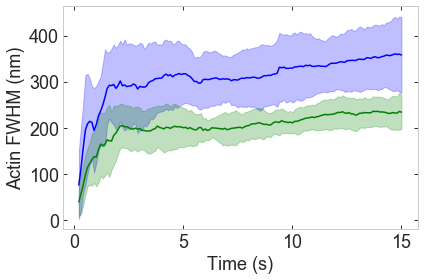

Last time point: X 357 ± 83
Last time point: Z 233 ± 36


In [7]:
# save_figures == 'yes'

color1 = 'blue'
color2 = 'green'

FHWMS_x_mean_runs=np.mean(FWHMS_x_runs,axis=0)
FHWMS_x_std_runs=np.std(FWHMS_x_runs,axis=0)


plt.plot(times,FHWMS_x_mean_runs, c=color1)
plt.fill_between(times,np.array(FHWMS_x_mean_runs)-np.array(FHWMS_x_std_runs), np.array(FHWMS_x_mean_runs)+np.array(FHWMS_x_std_runs), alpha=0.25,edgecolor=color1, facecolor=color1, linewidth=1, antialiased=True) 


plt.xlabel('Time (s)')
plt.ylabel('Actin FWHM in x (nm)')

# z

plt.tick_params(reset=True, color='black', direction='in', length=4)


FHWMS_z_mean_runs=np.mean(FWHMS_z_runs,axis=0)
FHWMS_z_std_runs=np.std(FWHMS_z_runs,axis=0)

plt.plot(times,FHWMS_z_mean_runs, c= color2)

plt.fill_between(times,np.array(FHWMS_z_mean_runs)-np.array(FHWMS_z_std_runs), np.array(FHWMS_z_mean_runs)+np.array(FHWMS_z_std_runs), alpha=0.25,edgecolor=color2, facecolor=color2, linewidth=1, antialiased=True) 



plt.xlabel('Time (s)')
plt.ylabel('Actin FWHM (nm)')
plt.grid(False)


plt.tight_layout()
# if save_figures == 'yes': 
plt.savefig(working_dir+'../figures/'+pref+'actin_FWHM_vs_time.png')
plt.savefig(working_dir+'../figures/'+pref+'actin_FWHM_vs_time.pdf')
plt.show()
print('Last time point: X '+str(int(FHWMS_x_mean_runs[-1]))+' ± '+str(int(FHWMS_x_std_runs[-1])))
print('Last time point: Z '+str(int(FHWMS_z_mean_runs[-1]))+' ± '+str(int(FHWMS_z_std_runs[-1])))




## plot number actin monomers in hip1r-associated clusters over time

In [7]:
# group by run and time, get total number actin points per run and time point

actin_points_by_run_time = new_actin_pos.groupby(level=['run', 'time']).fiber_point.count()

# convert to monomers

actin_monomers_by_run_time = actin_points_by_run_time*10/2.75

actin_monomers_by_time_mean = pd.DataFrame(actin_monomers_by_run_time).groupby('time').mean()
actin_monomers_by_time_std = pd.DataFrame(actin_monomers_by_run_time).groupby('time').std()


# actin_points_by_time = pd.DataFrame.from_dict(actin_points_by_run_time, orient = 'index')
# actin_points_by_time_mean =  actin_points_by_run_time.grouby(level='run').mean()
actin_monomers_by_time_mean

fiber_point
time             
0.1     24.958678
0.2     44.426877
0.3     72.272727
0.4     95.909091
0.5    133.030303
0.6    162.424242
0.7    188.636364
0.8    210.909091
0.9    249.090909
1.0    276.515152
1.1    302.878788
1.2    345.303030
1.3    385.151515
1.4    438.181818
1.5    478.636364
1.6    517.575758
1.7    565.757576
1.8    612.121212
1.9    652.121212
2.0    699.545455
2.1    750.000000
2.2    799.545455
2.3    850.303030
2.4    900.000000
2.5    946.515152
2.6    993.333333
2.7   1051.818182
2.8   1119.090909
2.9   1180.151515
3.0   1250.151515
...           ...
12.1  4834.696970
12.2  4851.212121
12.3  4871.515152
12.4  4886.060606
12.5  4900.757576
12.6  4916.969697
12.7  4931.060606
12.8  4958.333333
12.9  4979.393939
13.0  4996.666667
13.1  5013.333333
13.2  5024.090909
13.3  5037.575758
13.4  5052.727273
13.5  5067.424242
13.6  5082.575758
13.7  5097.424242
13.8  5109.696970
13.9  5121.818182
14.0  5131.818182
14.1  5140.000000
14.2  5112.121212
14.3  5123.333333
14.4  5135.606061
14.5  5147.878788
14.6  5160.000000
14.7  5158.787879
14.8  5180.151515
14.9  5188.636364
15.0  5198.333333

[150 rows x 1 columns]

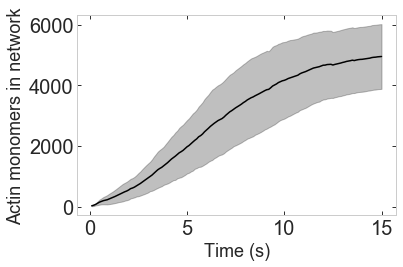

In [274]:
# plot

plt.figure(figsize=(6,4))
plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

color='black'

plt.plot(times,actin_monomers_by_time_mean, c=color)
yminus=actin_monomers_by_time_mean-actin_monomers_by_time_std
yplus=actin_monomers_by_time_mean+actin_monomers_by_time_std

plt.fill_between(times, np.array(yminus.fiber_point), np.array(yplus.fiber_point), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 


plt.xlabel('Time (s)')
plt.ylabel('Actin monomers in network')

# z

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)
plt.tight_layout()

plt.savefig('../figures/'+pref+'actin_monomers_vs_time.png')
plt.savefig('../figures/'+pref+'actin_monomers_vs_time.pdf')

plt.show()


## number arp,

In [4]:
# merge w actin to get earlier time points == 0

# arp_actin = pd.merge(new_actin_pos, branched_actin_bound_arp, on=['run','time'], how='outer')

# group by run and time, get total number actin points per run and time point

arp_by_run_time = branched_actin_bound_arp.groupby(level=['run', 'time']).arp_id.count()

arp_by_time_mean = pd.DataFrame(arp_by_run_time).groupby('time').mean()
arp_by_time_std = pd.DataFrame(arp_by_run_time).groupby('time').std()


arp_by_time_mean

arp_id
time            
0.1     1.000000
0.2     1.000000
0.3     1.000000
0.4     1.437500
0.5     1.791667
0.6     2.066667
0.7     2.324324
0.8     2.675000
0.9     3.756098
1.0     4.357143
1.1     5.619048
1.2     6.465116
1.3     7.250000
1.4     8.622222
1.5     9.888889
1.6    11.155556
1.7    12.533333
1.8    13.777778
1.9    15.000000
2.0    16.739130
2.1    18.304348
2.2    19.826087
2.3    21.500000
2.4    23.543478
2.5    24.934783
2.6    26.521739
2.7    28.260870
2.8    29.808511
2.9    31.489362
3.0    33.191489
...          ...
12.1  120.000000
12.2  119.872340
12.3  119.787234
12.4  119.489362
12.5  119.446809
12.6  119.468085
12.7  119.446809
12.8  119.404255
12.9  119.404255
13.0  119.382979
13.1  119.404255
13.2  118.765957
13.3  118.680851
13.4  118.659574
13.5  118.659574
13.6  118.404255
13.7  118.319149
13.8  118.319149
13.9  118.212766
14.0  118.063830
14.1  118.000000
14.2  117.978723
14.3  118.000000
14.4  117.893617
14.5  117.872340
14.6  117.829787
14.7  117.829787
14.8  117.787234
14.9  117.489362
15.0  117.382979

[150 rows x 1 columns]

In [5]:
def get_mean_count_time(data_frame, v):
# merge with solid to get remaing timepoints (which will count as 0)

    merged = pd.merge(solid_positions, data_frame, on=['run','time'], how = 'outer')

    # use pivot table to identify number of columns in the ends dataframe. other runs, timepoints will be 0

    data_frame_time_count = merged.pivot_table(index=['run', 'time'], values=v, fill_value=0, dropna = False, aggfunc='count')

    # mean std grouped by time

    mean_nb_vs_time=data_frame_time_count.groupby('time').mean().iloc[:,0]
    std_nb_vs_time=data_frame_time_count.groupby('time').std().iloc[:,0]
    
    return [mean_nb_vs_time, std_nb_vs_time]
arp_time_mean = []
arp_time_std = []

arp_time_mean, arp_time_std = get_mean_count_time(branched_actin_bound_arp, 'arp_id')


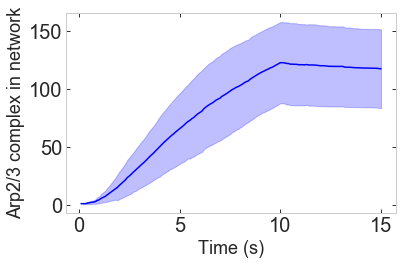

In [6]:
# plot

plt.figure(figsize=(6,4))
plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

color='blue'

plt.plot(arp_by_time_mean.index,arp_by_time_mean, c=color)
yminus=arp_by_time_mean-arp_by_time_std
yplus=arp_by_time_mean+arp_by_time_std

plt.fill_between(arp_by_time_mean.index, np.array(yminus.arp_id), np.array(yplus.arp_id), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 


plt.xlabel('Time (s)')
plt.ylabel('Arp2/3 complex in network')

# z

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)

plt.tight_layout()
plt.savefig('../figures/'+pref+'arp_vs_time.png')
plt.savefig('../figures/'+pref+'arp_vs_time.pdf')

plt.show()

In [11]:
# arp heat map xz over time

In [12]:
# movie arp heat map xz

In [7]:
# arp branch angle over time

arp_angles = branched_actin_bound_arp['branch_angle_deg']

# group by run and time, get mean arp angle nd time point

# arp_angle_by_run_time = arp_angles.groupby(level=['run', 'time'])

arp_angle_by_time_all_mean = arp_angles.groupby(level=['time']).mean()
arp_angle_by_time_all_std = arp_angles.groupby(level=['time']).std()

# arp_angle_by_time_mean = pd.DataFrame(arp_angle_by_time_all).groupby('time').mean()
# arp_angle_by_time_std = pd.DataFrame(arp_angle_by_time_all).groupby('time').std()


arp_angle_by_time_all_mean.head()

# versus internalization...

time
0.1    69.961652
0.2    82.121632
0.3    83.184151
0.4    83.016475
0.5    82.407180
Name: branch_angle_deg, dtype: float64

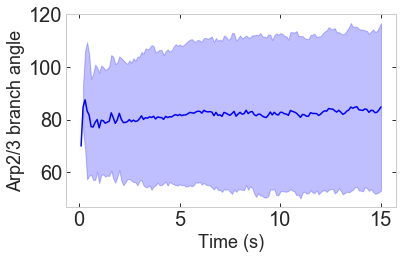

In [14]:
# plot

plt.figure(figsize=(6,4))
plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

color='blue'

plt.plot(arp_angle_by_time_all_mean.index,arp_angle_by_time_all_mean, c=color)
yminus=arp_angle_by_time_all_mean-arp_angle_by_time_all_std
yplus=arp_angle_by_time_all_mean+arp_angle_by_time_all_std

plt.fill_between(arp_by_time_mean.index, np.array(yminus), np.array(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 


plt.xlabel('Time (s)')
plt.ylabel('Arp2/3 branch angle')

# z

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)
plt.tight_layout()

plt.savefig('../figures/'+pref+'arp_angle_vs_time.png')
plt.savefig('../figures/'+pref+'arp_angle_vs_time.pdf')

plt.show()


In [ ]:
# bound hip1r over time



## length distribution actin filanets 

## over time

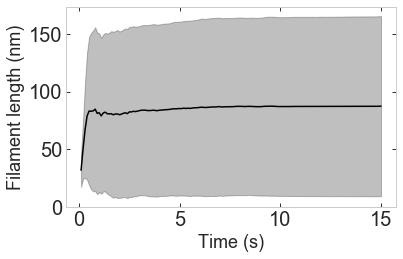

In [10]:
be=branched_actin_bound_ends.set_index(['run','time'])

# arp branch angle over time

lengths = be['length']

# group by run and time, get mean by time point

lengths_by_time_all_mean = lengths.groupby(level=['time']).mean()
lengths_by_time_all_std  = lengths.groupby(level=['time']).std()

plot_errorbar(lengths_by_time_all_mean*1000, lengths_by_time_all_std*1000, 'black', 'Filament length (nm)')


(array([3218., 3253., 2078., 1980., 1206., 1374.,  727.,  292.,  484.,
         143.]),
 array([0.0099  , 0.046292, 0.082684, 0.119076, 0.155468, 0.19186 ,
        0.228252, 0.264644, 0.301036, 0.337428, 0.37382 ]),
 <a list of 10 Patch objects>)

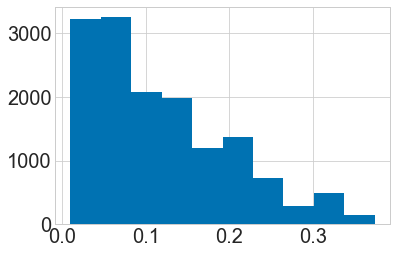

In [16]:
lengths = branched_actin_bound_ends['length']

plt.hist(lengths)

# average over runs? plot over time?

# 3D hist?

In [11]:


lengths_by_run_time = branched_actin_bound_ends.groupby(['run', 'time']).length

lengths_mean = pd.DataFrame(lengths_by_run_time).groupby('time').mean()
lengths_std = pd.DataFrame(lengths_by_run_time).groupby('time').std()

ValueError: DataFrame constructor not properly called!


## number growing and capped ends over time

In [11]:
# get capped or growing ends in branched actin network bound to hip1r

growing_ends = branched_actin_bound_ends.loc[branched_actin_bound_ends['plus_state']==1]
capped_ends  = branched_actin_bound_ends.loc[branched_actin_bound_ends['plus_state']==4]

# group by run and time, get total number actin points per run and time point

growing_ends_by_run_time = growing_ends.groupby(['run', 'time']).fiber_id.count()
capped_ends_by_run_time = capped_ends.groupby(['run', 'time']).fiber_id.count()

growing_ends_by_time_mean = pd.DataFrame(growing_ends_by_run_time).groupby('time').mean()
growing_ends_by_time_std = pd.DataFrame(growing_ends_by_run_time).groupby('time').std()

capped_ends_by_time_mean = pd.DataFrame(capped_ends_by_run_time).groupby('time').mean()
capped_ends_by_time_std = pd.DataFrame(capped_ends_by_run_time).groupby('time').std()



growing_ends_by_time_mean.head()


fiber_id
time          
0.1   1.444444
0.2   1.250000
0.3   1.387097
0.4   1.517241
0.5   1.608696

In [15]:
# diagnostic

# data_frame = growing_ends


# merged = pd.merge(solid_positions, data_frame, on=['run','time'], how = 'outer')

# # use pivot table to identify number of columns in the ends dataframe. other runs, timepoints will be 0

# data_frame_time_count = merged.pivot_table(index=['run', 'time'], values='fiber_id', fill_value=0, dropna = True, aggfunc='count')

# # mean std grouped by time

# mean_nb_vs_time=data_frame_time_count.groupby('time').mean().iloc[:,0]
# std_nb_vs_time=data_frame_time_count.groupby('time').std().iloc[:,0]

# #     return [mean_nb_vs_time, std_nb_vs_time]

# data_frame_time_count.groupby('time').describe()

fiber_id                                               
        count      mean       std  min   25%  50%   75%  max
time                                                        
0.1      24.0  1.250000  0.989071  0.0  1.00  1.0  2.00  3.0
0.2      24.0  0.708333  0.806450  0.0  0.00  1.0  1.00  3.0
0.3      24.0  0.916667  1.282547  0.0  0.00  1.0  1.00  6.0
0.4      24.0  1.125000  1.295897  0.0  0.00  1.0  1.00  6.0
0.5      24.0  0.916667  1.316011  0.0  0.00  1.0  1.00  6.0
0.6      24.0  1.000000  1.444630  0.0  0.00  1.0  1.00  6.0
0.7      24.0  1.083333  1.176460  0.0  0.00  1.0  2.00  4.0
0.8      24.0  1.166667  1.239448  0.0  0.00  1.0  2.00  4.0
0.9      24.0  1.041667  1.082636  0.0  0.00  1.0  2.00  4.0
1.0      24.0  1.500000  1.383128  0.0  0.75  1.0  2.00  4.0
1.1      24.0  1.166667  1.659404  0.0  0.00  1.0  1.25  6.0
1.2      24.0  1.333333  1.761093  0.0  0.00  1.0  2.00  7.0
1.3      24.0  1.625000  1.929463  0.0  0.00  1.0  3.00  8.0
1.4      24.0  1.916667  2.394135  0.0  0.00  1.0  3.00  7.0
1.5      24.0  2.083333  2.124734  0.0  0.75  1.0  3.00  7.0
1.6      24.0  1.791667  1.744037  0.0  0.75  1.0  2.25  6.0
1.7      24.0  1.875000  1.623536  0.0  1.00  1.5  3.00  6.0
1.8      24.0  1.833333  1.551063  0.0  1.00  2.0  2.00  6.0
1.9      24.0  1.750000  1.224745  0.0  1.00  2.0  3.00  4.0
2.0      24.0  1.666667  1.551063  0.0  0.75  1.0  3.00  5.0
2.1      24.0  2.041667  1.573674  0.0  1.00  2.0  3.00  6.0
2.2      24.0  2.083333  2.019829  0.0  1.00  2.0  3.00  8.0
2.3      24.0  2.500000  2.166945  0.0  1.00  2.0  4.00  8.0
2.4      24.0  2.416667  2.019829  0.0  1.00  2.0  3.25  8.0
2.5      24.0  2.666667  1.903467  0.0  1.00  2.5  4.00  7.0
2.6      24.0  2.666667  2.180281  0.0  1.00  2.0  4.00  7.0
2.7      24.0  2.583333  1.954185  0.0  1.00  2.0  4.25  7.0
2.8      24.0  2.625000  1.860633  0.0  1.00  2.5  3.25  7.0
2.9      24.0  2.750000  1.823756  0.0  1.75  2.0  4.00  7.0
3.0      24.0  2.625000  2.299575  0.0  1.00  2.0  4.00  8.0
...       ...       ...       ...  ...   ...  ...   ...  ...
12.1     24.0  0.833333  0.816497  0.0  0.00  1.0  1.00  3.0
12.2     24.0  0.750000  0.675664  0.0  0.00  1.0  1.00  2.0
12.3     24.0  0.833333  0.916831  0.0  0.00  1.0  1.25  3.0
12.4     24.0  0.791667  1.020621  0.0  0.00  0.5  1.00  3.0
12.5     24.0  0.750000  0.944089  0.0  0.00  0.5  1.00  3.0
12.6     24.0  0.708333  0.750604  0.0  0.00  1.0  1.00  3.0
12.7     24.0  0.458333  0.658005  0.0  0.00  0.0  1.00  2.0
12.8     24.0  0.416667  0.583592  0.0  0.00  0.0  1.00  2.0
12.9     24.0  0.416667  0.583592  0.0  0.00  0.0  1.00  2.0
13.0     24.0  0.375000  0.494535  0.0  0.00  0.0  1.00  1.0
13.1     24.0  0.500000  0.780189  0.0  0.00  0.0  1.00  2.0
13.2     24.0  0.500000  0.722315  0.0  0.00  0.0  1.00  2.0
13.3     24.0  0.750000  0.944089  0.0  0.00  0.0  1.25  3.0
13.4     24.0  0.708333  0.999094  0.0  0.00  0.0  1.00  4.0
13.5     24.0  0.541667  0.832971  0.0  0.00  0.0  1.00  3.0
13.6     24.0  0.708333  0.858673  0.0  0.00  0.5  1.00  3.0
13.7     24.0  0.958333  1.122078  0.0  0.00  0.5  2.00  3.0
13.8     24.0  0.583333  0.880547  0.0  0.00  0.0  1.00  3.0
13.9     24.0  0.625000  0.923721  0.0  0.00  0.0  1.00  3.0
14.0     24.0  0.500000  0.722315  0.0  0.00  0.0  1.00  2.0
14.1     24.0  0.458333  0.658005  0.0  0.00  0.0  1.00  2.0
14.2     24.0  0.333333  0.761387  0.0  0.00  0.0  0.00  3.0
14.3     24.0  0.208333  0.588230  0.0  0.00  0.0  0.00  2.0
14.4     24.0  0.333333  0.761387  0.0  0.00  0.0  0.00  3.0
14.5     24.0  0.500000  1.142080  0.0  0.00  0.0  0.25  5.0
14.6     24.0  0.541667  0.931533  0.0  0.00  0.0  1.00  3.0
14.7     24.0  0.458333  0.658005  0.0  0.00  0.0  1.00  2.0
14.8     24.0  0.333333  0.564660  0.0  0.00  0.0  1.00  2.0
14.9     24.0  0.375000  0.710939  0.0  0.00  0.0  0.25  2.0
15.0     24.0  0.375000  0.769670  0.0  0.00  0.0  0.25  3.0

[150 rows x 8 columns]

In [12]:
# try again with merge to solid_positions to account for runs or time points with no ends

def get_mean_count_time(data_frame):
# merge with solid to get remaing timepoints (which will count as 0)

    merged = pd.merge(solid_positions, data_frame, on=['run','time'], how = 'outer')

    # use pivot table to identify number of columns in the ends dataframe. other runs, timepoints will be 0

    data_frame_time_count = merged.pivot_table(index=['run', 'time'], values='plus_state', fill_value=0, dropna = True, aggfunc='count')

    # mean std grouped by time

    mean_nb_vs_time=data_frame_time_count.groupby('time').mean().iloc[:,0]
    std_nb_vs_time=data_frame_time_count.groupby('time').std().iloc[:,0]
    
    return [mean_nb_vs_time, std_nb_vs_time]

growing_ends_time_mean, growing_ends_time_std = get_mean_count_time(growing_ends)
capped_ends_time_mean, capped_ends_time_std = get_mean_count_time(capped_ends)

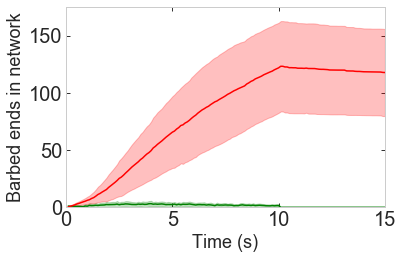

In [13]:
# plot

plt.figure(figsize=(6,4))
plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

color='green'
times = growing_ends_time_mean.index
plt.plot(times,growing_ends_time_mean, c=color)
yminus=growing_ends_time_mean-growing_ends_time_std
yplus=growing_ends_time_mean+growing_ends_time_std

plt.fill_between(times, np.array(yminus), np.array(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 

color='red'

plt.plot(times,capped_ends_time_mean, c=color)
yminus=capped_ends_time_mean-capped_ends_time_std
yplus=capped_ends_time_mean+capped_ends_time_std

plt.fill_between(times, np.array(yminus), np.array(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 



plt.xlabel('Time (s)')
plt.ylabel('Barbed ends in network')

plt.ylim([0, 175])
plt.xlim([0, 15])

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)
plt.tight_layout()

plt.savefig('../figures/'+pref+'actin_ends_vs_time_solid-merge.png')
plt.savefig('../figures/'+pref+'actin_ends_vs_time_solid-merge.pdf')
plt.show()

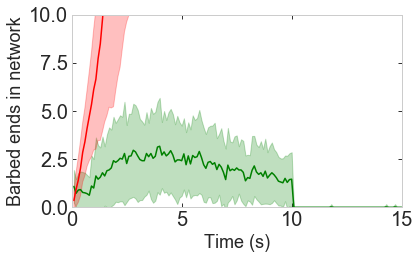

In [14]:
# plot zoom Y

plt.figure(figsize=(6,4))
plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

color='green'

plt.plot(times,growing_ends_time_mean, c=color)
yminus=growing_ends_time_mean-growing_ends_time_std
yplus=growing_ends_time_mean+growing_ends_time_std

plt.fill_between(times, np.array(yminus), np.array(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 

color='red'

plt.plot(times,capped_ends_time_mean, c=color)
yminus=capped_ends_time_mean-capped_ends_time_std
yplus=capped_ends_time_mean+capped_ends_time_std

plt.fill_between(times, np.array(yminus), np.array(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 



plt.xlabel('Time (s)')
plt.ylabel('Barbed ends in network')

plt.ylim([0, 10])
plt.xlim([0, 15])

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)

plt.tight_layout()

plt.savefig('../figures/'+pref+'actin_ends_vs_time_zoomY_solid_merge.png')
plt.savefig('../figures/'+pref+'actin_ends_vs_time_zoomY_solid_merge.pdf')

plt.show()


## plot distribution of capped ends ( or all ends)

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


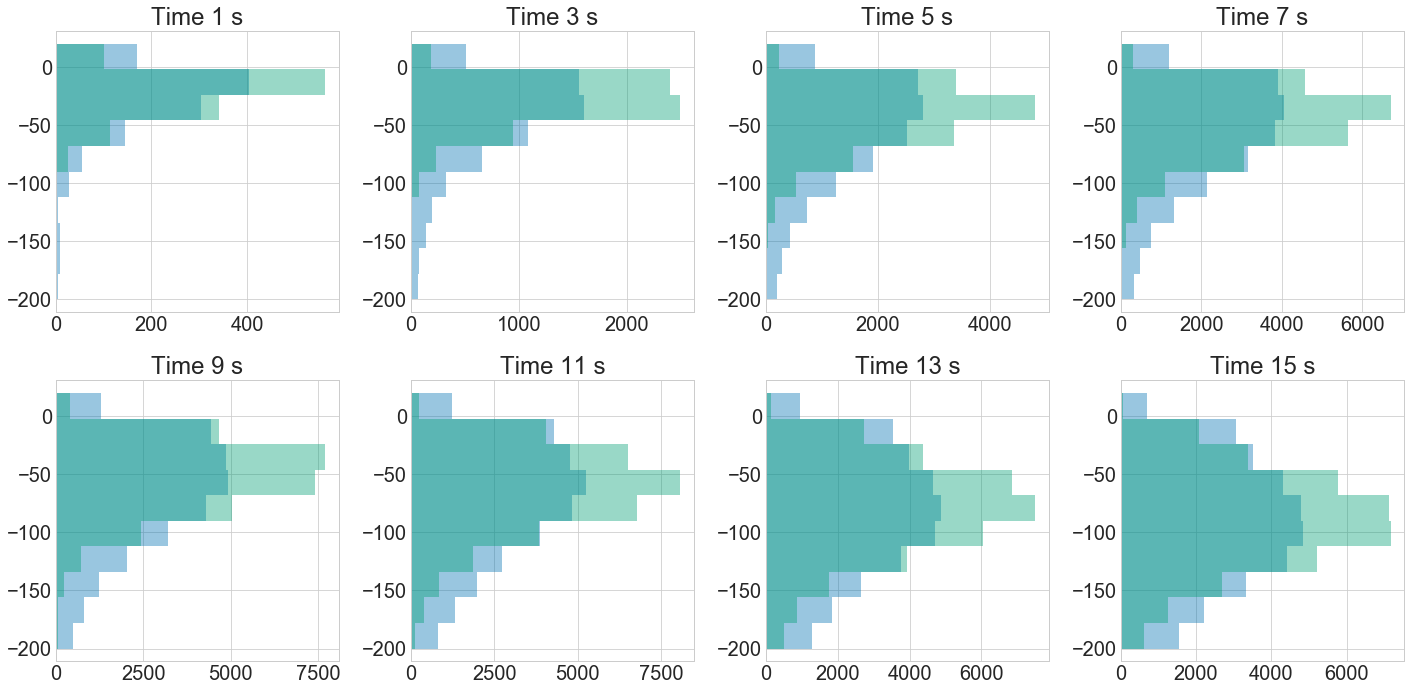

In [17]:
plt.figure(figsize=(20,10))

# plot one second intervals, show every other time point.

for i, timept in enumerate(range(1,16,2),start=1):
    
#     print(i)
    print('time ' + str(timept))
    # bin ± 0.5s as interval
    
    branched_actin_bound_ends_time=branched_actin_bound_ends.loc[branched_actin_bound_ends['time']>(timept-1)].loc[branched_actin_bound_ends['time']<=(timept)]

    times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

    # set position

    x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000
    z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)

    x_minus_time = branched_actin_bound_ends_time.minus_xpos_recalibrated*1000
    z_minus_time = (branched_actin_bound_ends_time.minus_zpos+0.4)*(-1000)
    
#     x = new_actin_pos_time['xpos_recalibrated']*1000
#     y = (new_actin_pos_time['zpos']+0.4)*(-1000)

    # set number of bins (kind of like pixel size) here. 
    
    # x: 600 points, 30 bins is about 20 nm pixel.
    # z: about 10 nm pixel
    
#     model_points_plus,xs,ys=np.histogram2d(x_plus_time,z_plus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
#     model_points_plus=np.flipud(np.rot90(model_points_plus))

#     model_points_minus,xs,ys=np.histogram2d(x_minus_time,z_minus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
#     model_points_minus=np.flipud(np.rot90(model_points_minus))    
    
    
#     growing_ends_z_dist = hist
#     capped_ends_z_dist =
#     minus_ends_z_dist = hist(z_minus_time)
    
    # histogram (sum) for one time

    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
    # assuming that nb time points is same for all runs. using one model point = 10 nm and one actin subunit is 2.75 nm.

#     model_points_plus=model_points_plus/len(runs)/times_per_timept
#     model_points_minus=model_points_minus/len(runs)/times_per_timept

##     average over time and runs


    plt.subplot(2, 4, i)

#     plt.pcolormesh(xs, ys, model_points_plus)
    plus_ends_z_dist  = plt.hist(z_plus_time, range = [-200, 20], orientation = 'horizontal', alpha = 0.4)
    minus_ends_z_dist = plt.hist(z_minus_time, range = [-200, 20], orientation = 'horizontal', alpha = 0.4)




#     cb = plt.colorbar(label = 'Actin monomers')
    plt.title('Time ' + str(timept) + ' s', fontsize=24)

    # log scale 
    # plt.hist2d(x, y, bins = 40, norm=LogNorm())


#     plt.xlim([-300, 300])
#     plt.ylim(bottom = -199)

    # max colormap to show
    
#     plt.clim([0, 15])
    
#     plt.xlabel('x (nm)')
#     plt.ylabel('Z (nm)')
    
    plt.xticks(size=20)
    plt.yticks(size=20)

    plt.tight_layout()
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'plus_minus_ends_Z_dist_time_subplots.png')
    plt.savefig('../figures/'+pref+'plus_minus_ends_Z_dist_time_subplots.pdf')
    

(array([ 2302.,  4599., 10296., 21508., 38892., 58817., 73454., 71204.,
        47706.,  3423.]),
 array([-200., -178., -156., -134., -112.,  -90.,  -68.,  -46.,  -24.,
          -2.,   20.]),
 <a list of 10 Patch objects>)

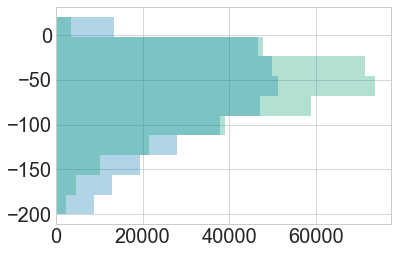

In [19]:

x_plus = branched_actin_bound_ends.plus_xpos_recalibrated
z_plus = (branched_actin_bound_ends.plus_zpos+0.4)*(-1000)


x_minus = branched_actin_bound_ends.minus_xpos_recalibrated
z_minus = (branched_actin_bound_ends.minus_zpos+0.4)*(-1000)

plt.hist(z_plus, alpha = 0.3, range = [-200, 20], orientation = 'horizontal')
plt.hist(z_minus, alpha = 0.3, range = [-200, 20], orientation = 'horizontal')





In [25]:
# plt.figure(1, figsize=(20,10))
# plt.figure(2, figsize=(20,10))


# # plot one second intervals, show every other time point.
# plt.cm.get_cmap('seismic')
# plt.set_cmap('seismic')
# counts_plus_vs_minus_time = []

# for i, timept in enumerate(range(1,16,2),start=1):
    
# #     print(i)
#     print('time ' + str(timept))
    
#     # bin ± 0.5s as interval
    
#     branched_actin_bound_ends_time=branched_actin_bound_ends.loc[branched_actin_bound_ends['time']>(timept-1)].loc[branched_actin_bound_ends['time']<=(timept)]

#     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

#     counts_plus, bins, bars  = plt.hist(z_plus_time, bins=22, range=[-200, 20])
#     counts_minus, bins, bars = plt.hist(z_minus_time, bins=22, range=[-200, 20]) 
 
#     counts_plus=counts_plus/len(runs)/times_per_timept
#     counts_minus=counts_minus/len(runs)/times_per_timept

#     # difference between plus and minus ends. positive is more plus ends.
#     counts_plus_vs_minus = counts_plus-counts_minus
    
#     counts_plus_vs_minus_time.append(model_points_plus_vs_minus)
    
# #     print(counts_plus_vs_minus)
#     plt.figure(2)
#     plt.subplot(2, 4, i)
#     plt.plot(bins[:-1], counts_plus_vs_minus, alpha = 0.3)


# #     make this some kind of heat map! 1D, or histogram, or something.
    
# # plt.pcolormesh(bins, range(1,16,2), counts_plus_vs_minus_time)


# #     cb = plt.colorbar(label = 'Actin monomers')
# plt.title('Time ' + str(timept) + ' s', fontsize=24)


    

## convert this to a heat map over time or type of kymograph

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


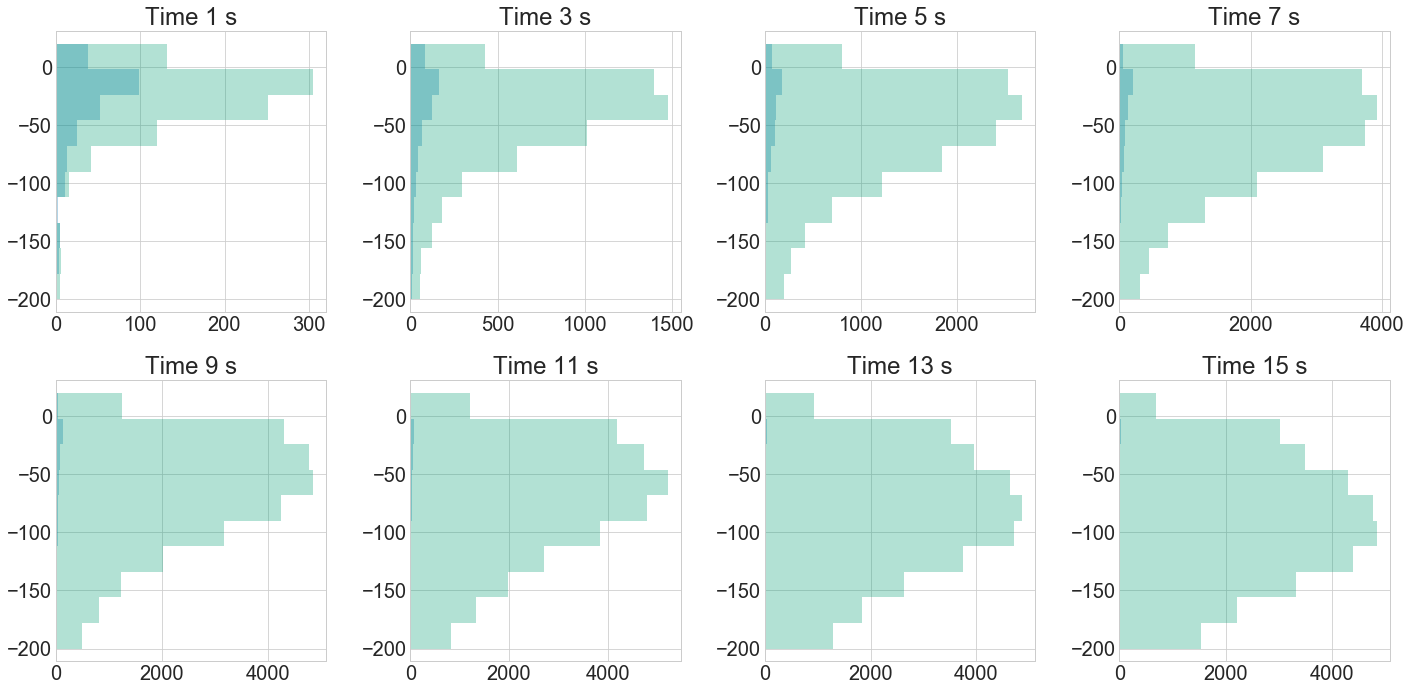

In [21]:
## growing ends

# growing ends

plt.figure(figsize=(20,10))
# plt.set_cmap('hot')


# plot one second intervals, show every other time point.

for i, timept in enumerate(range(1,16,2),start=1):
    
#     print(i)
    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
    branched_actin_bound_ends_time=branched_actin_bound_ends.loc[branched_actin_bound_ends['time']>(timept-1)].loc[branched_actin_bound_ends['time']<=(timept)]

#     only growing
    branched_actin_bound_ends_growing_time = branched_actin_bound_ends_time.loc[branched_actin_bound_ends_time['plus_state']==1]
#     only capped
    branched_actin_bound_ends_capped_time = branched_actin_bound_ends_time.loc[branched_actin_bound_ends_time['plus_state']==4]
    
    times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

    # set position

    x_plus_time = branched_actin_bound_ends_growing_time.plus_xpos_recalibrated*1000
    z_plus_time = (branched_actin_bound_ends_growing_time.plus_zpos+0.4)*(-1000)
    
    z_plus_capped_time = (branched_actin_bound_ends_capped_time.plus_zpos+0.4)*(-1000)

    plt.subplot(2, 4, i)
    
    plt.hist(z_plus_time, alpha = 0.3, range = [-200, 20], orientation = 'horizontal')
    plt.hist(z_plus_capped_time, alpha = 0.3, range = [-200, 20], orientation = 'horizontal')
    

#     cb = plt.colorbar(label = 'Actin monomers')
    plt.title('Time ' + str(timept) + ' s', fontsize=24)

    # log scale 
    # plt.hist2d(x, y, bins = 40, norm=LogNorm())


#     plt.xlim([-300, 300])
#     plt.ylim(bottom = -199)

    # max colormap to show
    
#     plt.clim([0, 15])
    
#     plt.xlabel('x (nm)')
#     plt.ylabel('Z (nm)')
    
    plt.xticks(size=20)
    plt.yticks(size=20)

    plt.tight_layout()
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'growing_capped_ends_Z_hist_time_subplots.png')
    plt.savefig('../figures/'+pref+'growing_capped_ends_Z_hist_time_subplots.pdf')
    

## all plus ends

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


<Figure size 432x288 with 0 Axes>

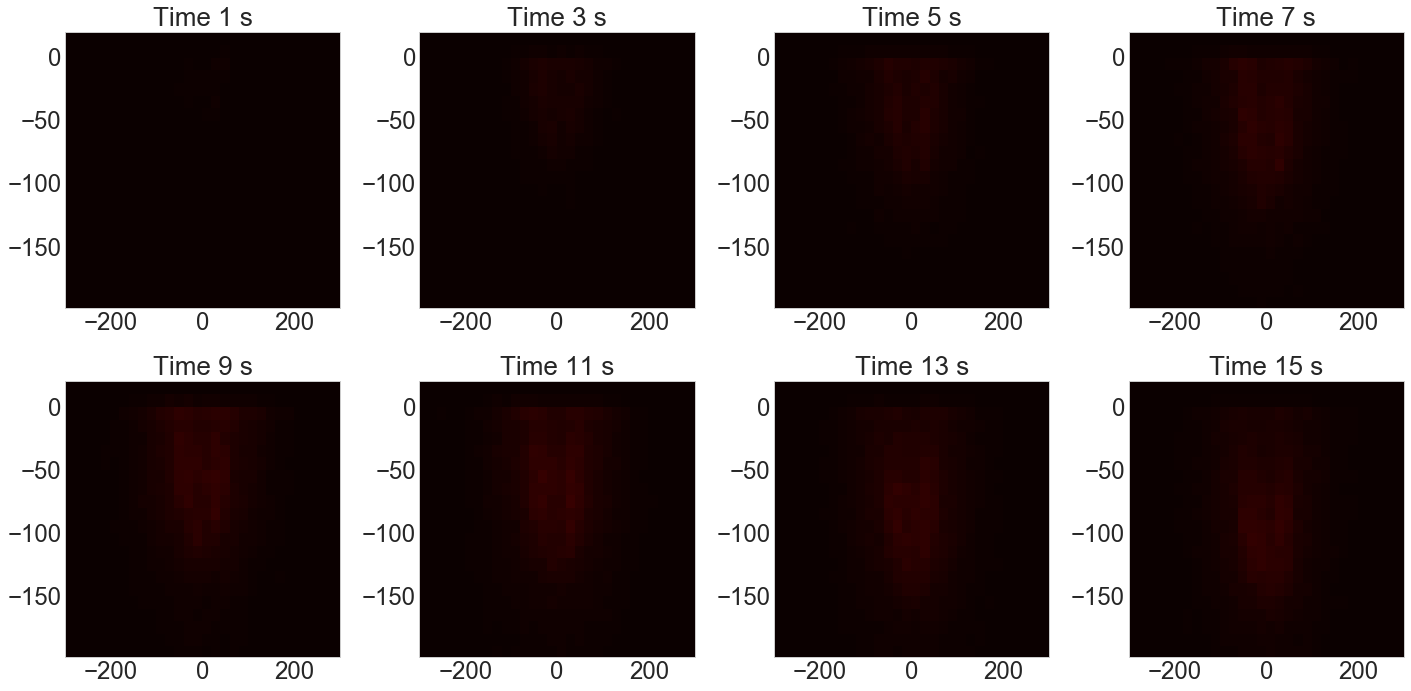

In [24]:
plt.cm.get_cmap('hot')
plt.set_cmap('hot')

plt.figure(figsize=(20,10))

# plot one second intervals, show every other time point.

for i, timept in enumerate(range(1,16,2),start=1):
    
#     print(i)
    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
    branched_actin_bound_ends_time=branched_actin_bound_ends.loc[branched_actin_bound_ends['time']>(timept-1)].loc[branched_actin_bound_ends['time']<=(timept)]

    runs = sorted(list(set(branched_actin_bound_ends_time.run)), key = lambda x:int(x[-2:]))
    times_per_timept=len(sorted(list(set(branched_actin_bound_ends_time.time))))

    # set position

    x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000
    z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)

    x_minus_time = branched_actin_bound_ends_time.minus_xpos_recalibrated*1000
    z_minus_time = (branched_actin_bound_ends_time.minus_zpos+0.4)*(-1000)
    
#     x = new_actin_pos_time['xpos_recalibrated']*1000
#     y = (new_actin_pos_time['zpos']+0.4)*(-1000)

    # set number of bins (kind of like pixel size) here. 
    
    # x: 600 points, 30 bins is about 20 nm pixel.
    # z: about 10 nm pixel
    
    model_points_plus,xs,ys=np.histogram2d(x_plus_time,z_plus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points_plus=np.flipud(np.rot90(model_points_plus))

    model_points_minus,xs,ys=np.histogram2d(x_minus_time,z_minus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points_minus=np.flipud(np.rot90(model_points_minus))    
    
    # histogram (sum) for one time

    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
    # assuming that nb time points is same for all runs. using one model point = 10 nm and one actin subunit is 2.75 nm.

    model_points_plus=model_points_plus/len(runs)/times_per_timept
    model_points_minus=model_points_minus/len(runs)/times_per_timept


    plt.subplot(2, 4, i)

    plt.pcolormesh(xs, ys, model_points_plus)


#     cb = plt.colorbar(label = 'Actin monomers')
    plt.title('Time ' + str(timept) + ' s', fontsize=26)

    # log scale 
    # plt.hist2d(x, y, bins = 40, norm=LogNorm())


    plt.xlim([-300, 300])
    plt.ylim(bottom = -199)

    # max colormap to show
    
    plt.clim([0, 15])
    
#     plt.xlabel('x (nm)')
#     plt.ylabel('Z (nm)')
    
    plt.xticks(size=24)
    plt.yticks(size=24)

    plt.tight_layout()



if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_plus_ends_map_XZ_time_subplots.png')
    plt.savefig('../figures/'+pref+'_plus_ends_map_XZ_time_subplots.pdf')
    


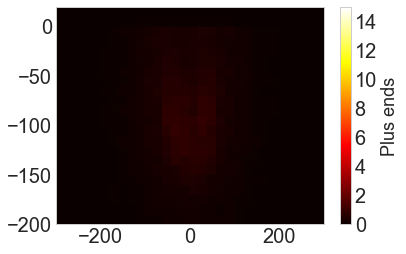

In [25]:
plt.figure()
plt.pcolormesh(xs, ys, model_points_plus)
plt.clim([0, 15])
plt.colorbar(label = 'Plus ends')

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_plus_ends_map_XZ_time_subplots_colorbar.png')

plt.show()

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


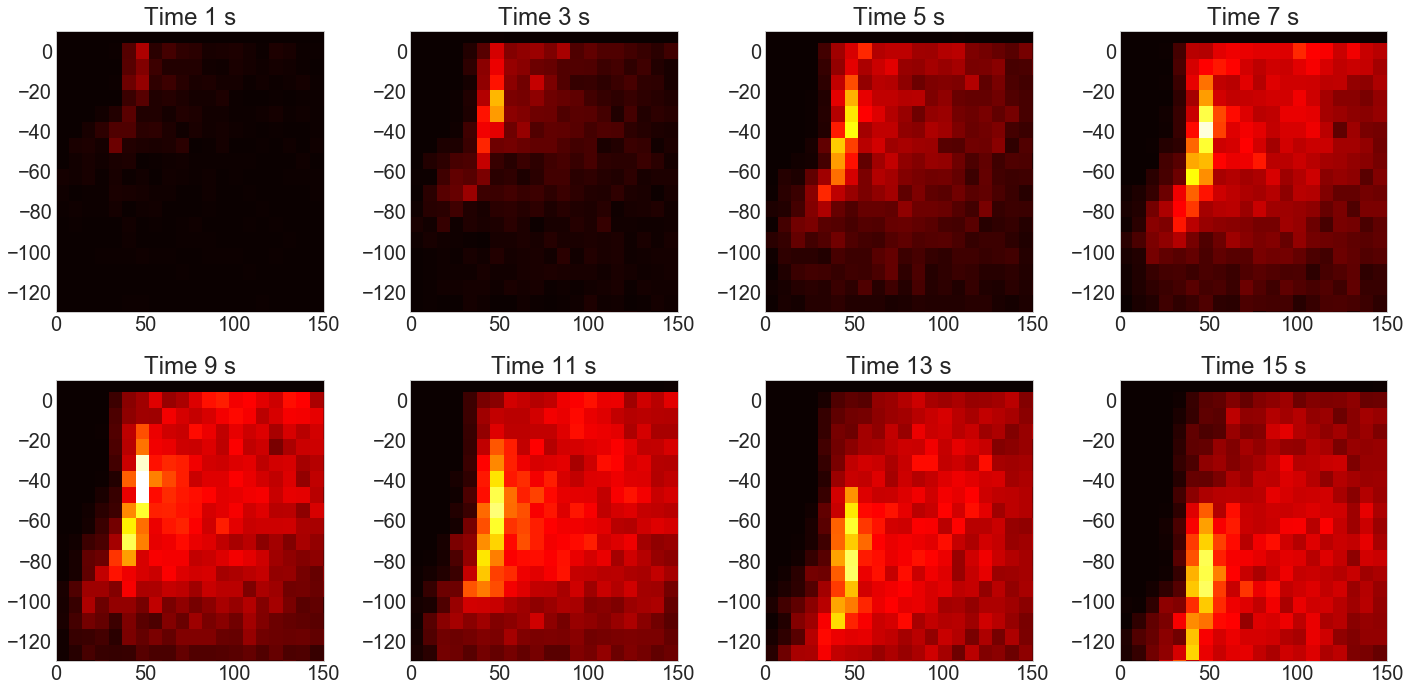

In [23]:
plt.figure(figsize=(20,10))

# plot one second intervals, show every other time point.

for i, timept in enumerate(range(1,16,2),start=1):
    
#     print(i)
    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
    branched_actin_bound_ends_time=branched_actin_bound_ends.loc[branched_actin_bound_ends['time']>(timept-1)].loc[branched_actin_bound_ends['time']<=(timept)]

    times_per_timept=len(sorted(list(set(branched_actin_bound_ends_time.reset_index().time))))

    # set position

    x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000
    r_plus_time = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000
    z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)

    x_minus_time = branched_actin_bound_ends_time.minus_xpos_recalibrated*1000
    z_minus_time = (branched_actin_bound_ends_time.minus_zpos+0.4)*(-1000)
    
    # set number of bins (kind of like pixel size) here. 
    
    # x: 600 points, 30 bins is about 20 nm pixel.
    # z: about 10 nm pixel
    
    model_points_plus,xs,ys=np.histogram2d(r_plus_time,z_plus_time,bins=[40,28],range=[[0, 300],[-200, 20]])
    model_points_plus=np.flipud(np.rot90(model_points_plus))


    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
    # assuming that nb time points is same for all runs. using one model point = 10 nm and one actin subunit is 2.75 nm.

    model_points_plus=model_points_plus/len(runs)/times_per_timept
#     model_points_minus=model_points_minus/len(runs)/times_per_timept


    plt.subplot(2, 4, i)

    plt.pcolormesh(xs, ys, model_points_plus)


#     cb = plt.colorbar(label = 'Actin monomers')
    plt.title('Time ' + str(timept) + ' s', fontsize=24)

    # log scale 
    # plt.hist2d(x, y, bins = 40, norm=LogNorm())


    plt.xlim([0, 150])
    plt.ylim([-130,10])

    # max colormap to show
    
    plt.clim([0, 1])
    
#     plt.xlabel('x (nm)')
#     plt.ylabel('Z (nm)')
    
    plt.xticks(size=20)
    plt.yticks(size=20)

    plt.tight_layout()
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'plus_ends_map_RZ_time_subplots.png')
    plt.savefig('../figures/'+pref+'plus_ends_map_RZ_time_subplots.pdf')

In [24]:
# movie of barbed end growing ends, all 150 time points as png.

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


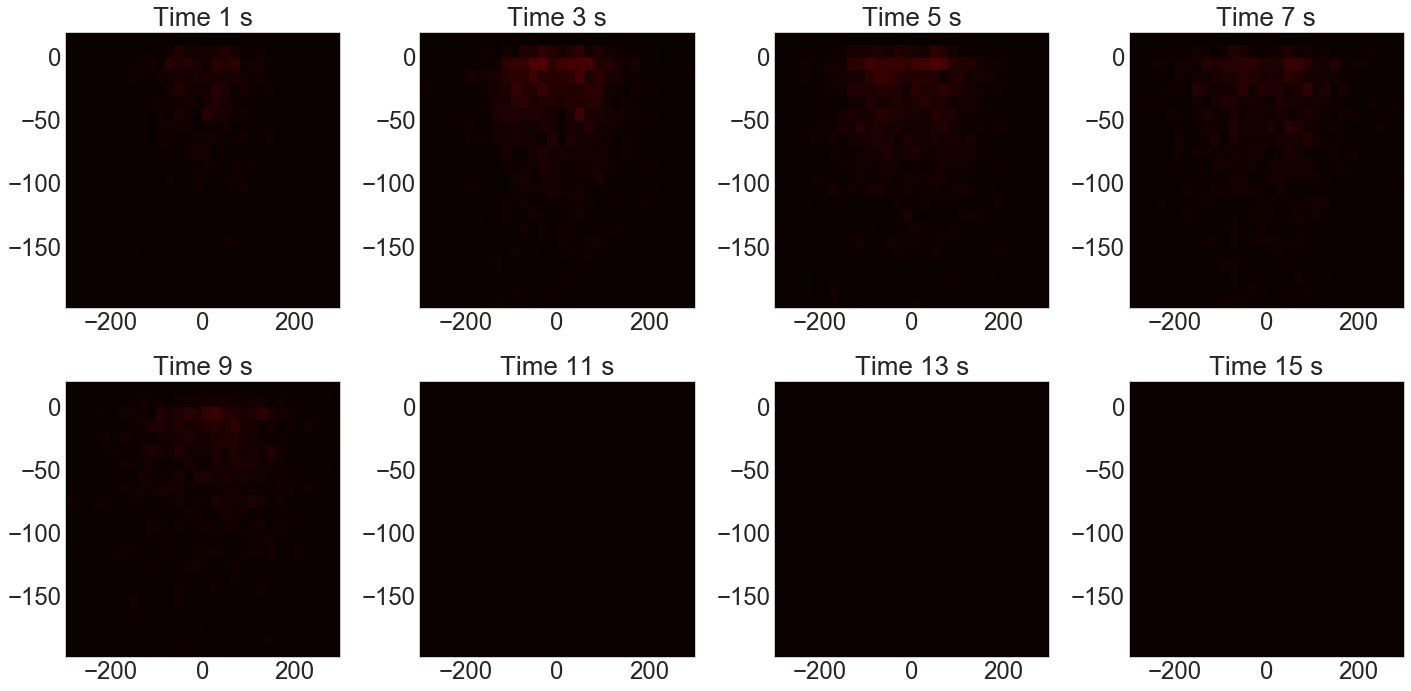

In [27]:
# growing ends

plt.figure(figsize=(20,10))
plt.set_cmap('hot')


# plot one second intervals, show every other time point.

for i, timept in enumerate(range(1,16,2),start=1):
    
#     print(i)
    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
    branched_actin_bound_ends_time=branched_actin_bound_ends.loc[branched_actin_bound_ends['time']>(timept-1)].loc[branched_actin_bound_ends['time']<=(timept)]

#     only growing
    branched_actin_bound_ends_growing_time = branched_actin_bound_ends_time.loc[branched_actin_bound_ends_time['plus_state']==1]
#     only capped
    branched_actin_bound_ends_capped_time = branched_actin_bound_ends_time.loc[branched_actin_bound_ends_time['plus_state']==4]

    
    times_per_timept=len(sorted(list(set(branched_actin_bound_ends_time.time))))

    # set position

    x_plus_time = branched_actin_bound_ends_growing_time.plus_xpos_recalibrated*1000
    z_plus_time = (branched_actin_bound_ends_growing_time.plus_zpos+0.4)*(-1000)


    # set number of bins (kind of like pixel size) here. 
    
    # x: 600 points, 30 bins is about 20 nm pixel.
    # z: about 10 nm pixel
    
    model_points_plus,xs,ys=np.histogram2d(x_plus_time,z_plus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points_plus=np.flipud(np.rot90(model_points_plus))

    model_points_minus,xs,ys=np.histogram2d(x_minus_time,z_minus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points_minus=np.flipud(np.rot90(model_points_minus))    
    
    # histogram (sum) for one time

    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
    # assuming that nb time points is same for all runs. using one model point = 10 nm and one actin subunit is 2.75 nm.

    model_points_plus=model_points_plus/len(runs)/times_per_timept
    model_points_minus=model_points_minus/len(runs)/times_per_timept


    plt.subplot(2, 4, i)

    plt.pcolormesh(xs, ys, model_points_plus)


#     cb = plt.colorbar(label = 'growing ends')
    plt.title('Time ' + str(timept) + ' s', fontsize=26)

    # log scale 
    # plt.hist2d(x, y, bins = 40, norm=LogNorm())

    plt.xlim([-300, 300])
    plt.ylim(bottom = -199)

    # max colormap to show
    
    plt.clim([0, 0.5])
    plt.xticks(size=24)
    plt.yticks(size=24)

    plt.tight_layout()
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_growing_plus_ends_map_XZ_time_subplots.png')
    plt.savefig('../figures/'+pref+'_growing_plus_ends_map_XZ_time_subplots.pdf')

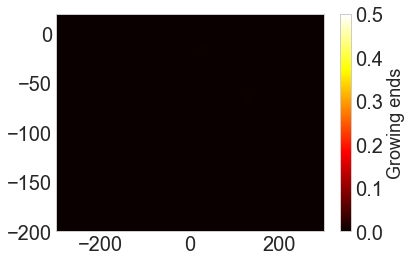

In [28]:
plt.figure()
plt.pcolormesh(xs, ys, model_points_plus)
plt.clim([0, 0.5])
plt.colorbar(label = 'Growing ends')

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_growing_plus_ends_map_XZ_time_subplots_colorbar.png')

plt.show()

In [30]:
# # growing ends

# plt.figure(figsize=(20,10))
# plt.set_cmap('hot')


# # plot one second intervals, show every other time point.

# for i, timept in enumerate(range(1,16,2),start=1):
    
# #     print(i)
#     print('time ' + str(timept))
    
#     # bin ± 0.5s as interval
    
#     branched_actin_bound_ends_time=branched_actin_bound_ends.loc[branched_actin_bound_ends['time']>(timept-1)].loc[branched_actin_bound_ends['time']<=(timept)]

# #     only growing
#     branched_actin_bound_ends_growing_time = branched_actin_bound_ends_time.loc[branched_actin_bound_ends_time['plus_state']==1]
# #     only capped
#     branched_actin_bound_ends_capped_time = branched_actin_bound_ends_time.loc[branched_actin_bound_ends_time['plus_state']==4]

    
#     times_per_timept=len(sorted(list(set(branched_actin_bound_ends_time.reset_index().time))))

#     # set position

#     x_plus_time = branched_actin_bound_ends_growing_time.plus_xpos_recalibrated*1000
#     r_plus_time = branched_actin_bound_ends_growing_time.plus_rpos_recalibrated*1000

#     z_plus_time = (branched_actin_bound_ends_growing_time.plus_zpos+0.4)*(-1000)

    
    
# #     x_minus_time = branched_actin_bound_ends_time.minus_xpos_recalibrated*1000
# #     z_minus_time = (branched_actin_bound_ends_time.minus_zpos+0.4)*(-1000)
    
# #     x = new_actin_pos_time['xpos_recalibrated']*1000
# #     y = (new_actin_pos_time['zpos']+0.4)*(-1000)

#     # set number of bins (kind of like pixel size) here. 
    
#     # x: 600 points, 30 bins is about 20 nm pixel.
#     # z: about 10 nm pixel
    
#     model_points_plus,xs,ys=np.histogram2d(r_plus_time,z_plus_time,bins=[40,28],range=[[0,300],[-200, 20]])
#     model_points_plus=np.flipud(np.rot90(model_points_plus))

# #     model_points_minus,xs,ys=np.histogram2d(x_minus_time,z_minus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
# #     model_points_minus=np.flipud(np.rot90(model_points_minus))    
    
#     # histogram (sum) for one time

#     # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
#     # assuming that nb time points is same for all runs. using one model point = 10 nm and one actin subunit is 2.75 nm.

#     model_points_plus=model_points_plus/len(runs)/times_per_timept
# #     model_points_minus=model_points_minus/len(runs)/times_per_timept


#     plt.subplot(2, 4, i)

#     plt.pcolormesh(xs, ys, model_points_plus)


#     cb = plt.colorbar(label = 'growing ends')
#     plt.title('Time ' + str(timept) + ' s', fontsize=24)

#     # log scale 
#     # plt.hist2d(x, y, bins = 40, norm=LogNorm())


#     plt.xlim([0, 200])
#     plt.ylim([-150,10])

#     # max colormap to show
    
#     plt.clim([0, 0.1])
    
# #     plt.xlabel('x (nm)')
# #     plt.ylabel('Z (nm)')
    
#     plt.xticks(size=20)
#     plt.yticks(size=20)

#     plt.tight_layout()
    
# if save_figures == 'yes': 
#     plt.savefig('../figures/'+pref+'growing_plus_ends_map_RZ_time_subplots.png')
#     plt.savefig('../figures/'+pref+'growing_plus_ends_map_RZ_time_subplots.pdf')

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


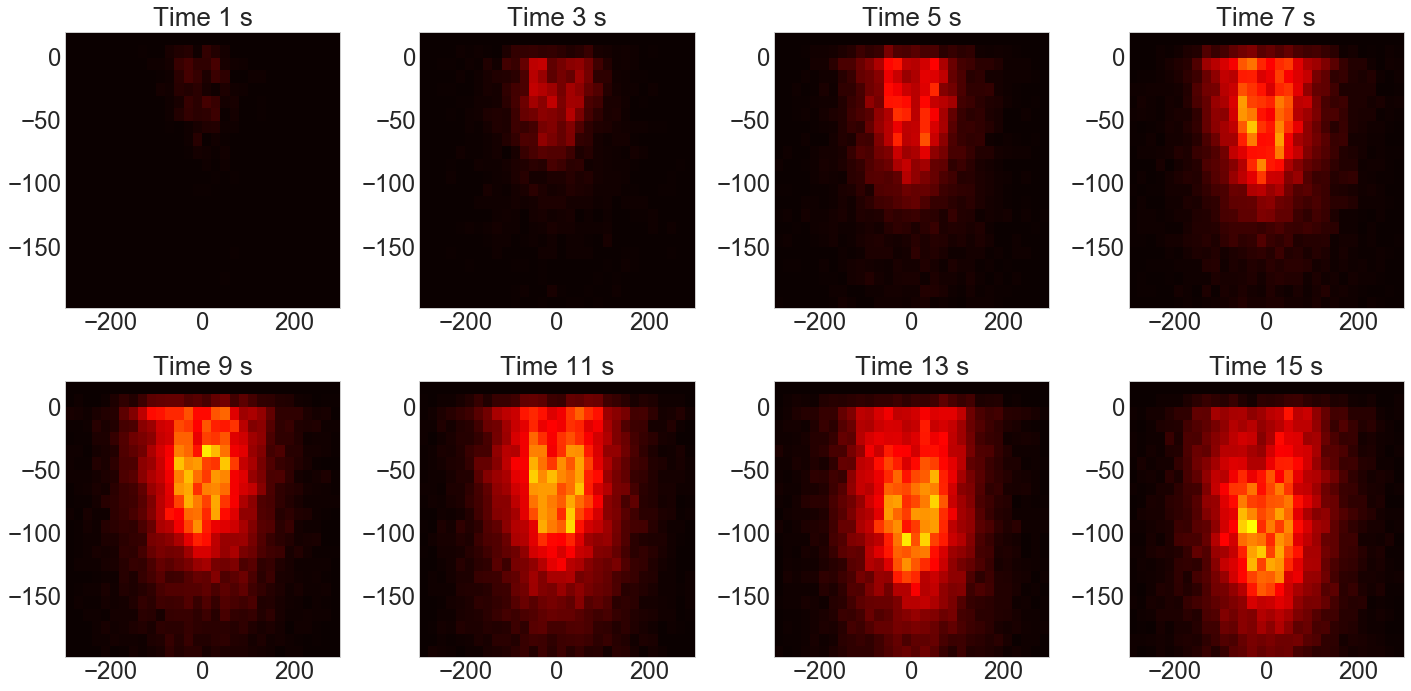

In [23]:
# capped ends

plt.figure(figsize=(20,10))
plt.set_cmap('hot')


# plot one second intervals, show every other time point.

for i, timept in enumerate(range(1,16,2),start=1):
    
#     print(i)
    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
    branched_actin_bound_ends_time=branched_actin_bound_ends.loc[branched_actin_bound_ends['time']>(timept-1)].loc[branched_actin_bound_ends['time']<=(timept)]

#     only growing
    branched_actin_bound_ends_growing_time = branched_actin_bound_ends_time.loc[branched_actin_bound_ends_time['plus_state']==1]
#     only capped
    branched_actin_bound_ends_capped_time = branched_actin_bound_ends_time.loc[branched_actin_bound_ends_time['plus_state']==4]

    
    times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

    # set position

    x_plus_time = branched_actin_bound_ends_capped_time.plus_xpos_recalibrated*1000
    z_plus_time = (branched_actin_bound_ends_capped_time.plus_zpos+0.4)*(-1000)

    # set number of bins (kind of like pixel size) here. 
    
    # x: 600 points, 30 bins is about 20 nm pixel.
    # z: about 10 nm pixel
    
    model_points_plus,xs,ys=np.histogram2d(x_plus_time,z_plus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points_plus=np.flipud(np.rot90(model_points_plus))

#     model_points_minus,xs,ys=np.histogram2d(x_minus_time,z_minus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
#     model_points_minus=np.flipud(np.rot90(model_points_minus))    
    
    # histogram (sum) for one time

    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
    # assuming that nb time points is same for all runs. using one model point = 10 nm and one actin subunit is 2.75 nm.

    model_points_plus=model_points_plus/len(runs)/times_per_timept
#     model_points_minus=model_points_minus/len(runs)/times_per_timept


    plt.subplot(2, 4, i)

    plt.pcolormesh(xs, ys, model_points_plus)


#     cb = plt.colorbar(label = 'capped ends')
    plt.title('Time ' + str(timept) + ' s', fontsize=26)

    # log scale 
    # plt.hist2d(x, y, bins = 40, norm=LogNorm())


    plt.xlim([-300, 300])
    plt.ylim(bottom = -199)

    # max colormap to show
    
    plt.clim([0, 15])
    
#     plt.xlabel('x (nm)')
#     plt.ylabel('Z (nm)')
    
    plt.xticks(size=24)
    plt.yticks(size=24)

    plt.tight_layout()
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_capped_plus_ends_map_XZ_time_subplots.png')
    plt.savefig('../figures/'+pref+'_capped_plus_ends_map_XZ_time_subplots.pdf')

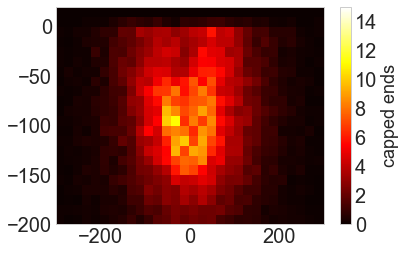

In [24]:
plt.figure()
plt.pcolormesh(xs, ys, model_points_plus)
plt.clim([0, 15])
plt.colorbar(label = 'capped ends')

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_capped_plus_ends_XZ_time_subplots_colorbar.png')

plt.show()



## minus ends

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


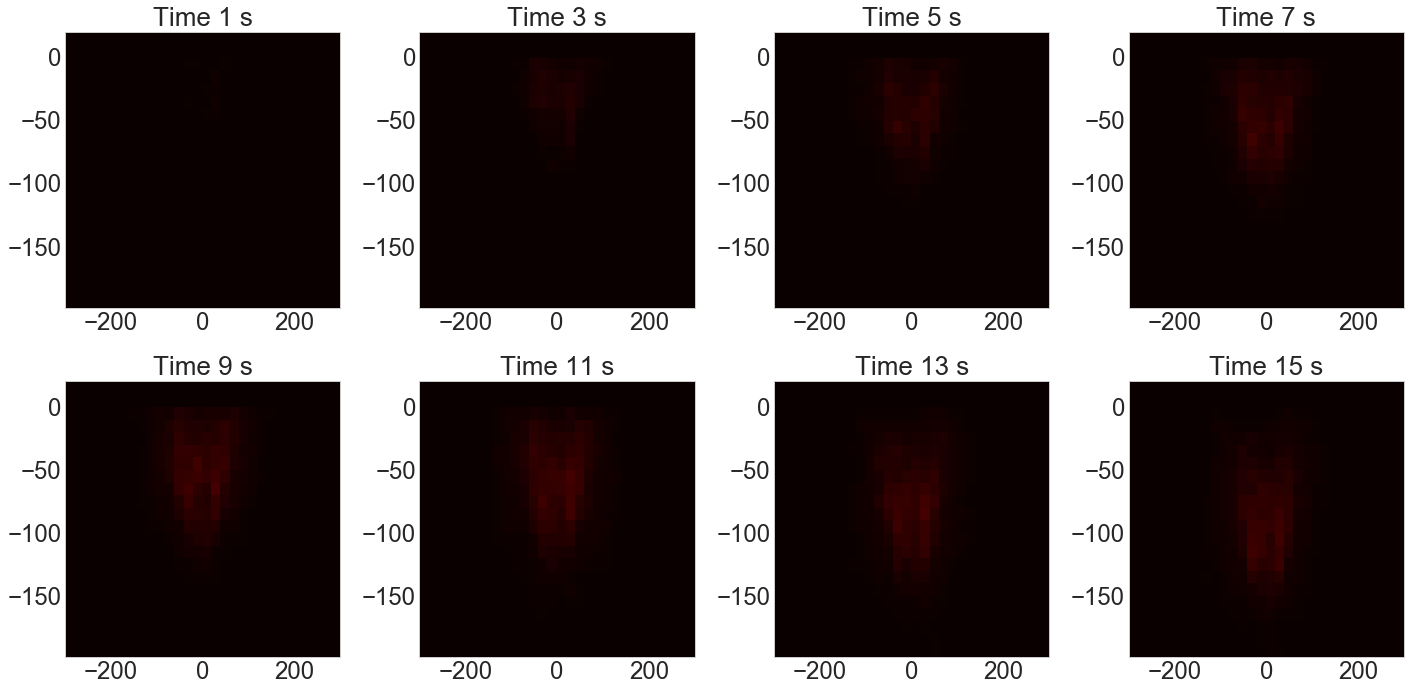

In [29]:
plt.figure(figsize=(20,10))

# plot one second intervals, show every other time point.

for i, timept in enumerate(range(1,16,2),start=1):
    
#     print(i)
    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
    branched_actin_bound_ends_time=branched_actin_bound_ends.loc[branched_actin_bound_ends['time']>(timept-1)].loc[branched_actin_bound_ends['time']<=(timept)]

    times_per_timept=len(sorted(list(set(branched_actin_bound_ends_time.time))))

    # set position

    x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000
    z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)

    x_minus_time = branched_actin_bound_ends_time.minus_xpos_recalibrated*1000
    z_minus_time = (branched_actin_bound_ends_time.minus_zpos+0.4)*(-1000)
    
#     x = new_actin_pos_time['xpos_recalibrated']*1000
#     y = (new_actin_pos_time['zpos']+0.4)*(-1000)

    # set number of bins (kind of like pixel size) here. 
    
    # x: 600 points, 30 bins is about 20 nm pixel.
    # z: about 10 nm pixel
    
    model_points_plus,xs,ys=np.histogram2d(x_plus_time,z_plus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points_plus=np.flipud(np.rot90(model_points_plus))

    model_points_minus,xs,ys=np.histogram2d(x_minus_time,z_minus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points_minus=np.flipud(np.rot90(model_points_minus))    
    
    # histogram (sum) for one time

    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
    # assuming that nb time points is same for all runs. using one model point = 10 nm and one actin subunit is 2.75 nm.

    model_points_plus=model_points_plus/len(runs)/times_per_timept
    model_points_minus=model_points_minus/len(runs)/times_per_timept


    plt.subplot(2, 4, i)

    plt.pcolormesh(xs, ys, model_points_minus)


#     cb = plt.colorbar(label = 'Actin monomers')
    plt.title('Time ' + str(timept) + ' s', fontsize=26)

    # log scale 
    # plt.hist2d(x, y, bins = 40, norm=LogNorm())


    plt.xlim([-300, 300])
    plt.ylim(bottom = -199)

    # max colormap to show
    
    plt.clim([0, 25])
    
#     plt.xlabel('x (nm)')
#     plt.ylabel('Z (nm)')
    
    plt.xticks(size=24)
    plt.yticks(size=24)

    plt.tight_layout()
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_minus_ends_map_XZ_time_subplots.png')
    plt.savefig('../figures/'+pref+'_minus_ends_map_XZ_time_subplots.pdf')

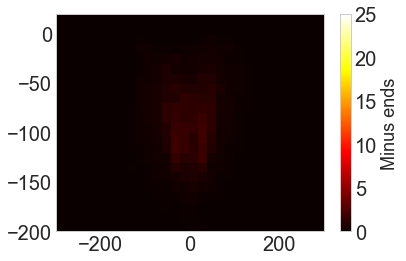

In [30]:
plt.figure()
plt.pcolormesh(xs, ys, model_points_minus)
plt.clim([0, 25])
plt.colorbar(label = 'Minus ends')

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'minus_ends_map_XZ_time_subplots_colorbar.png')

plt.show()

## plus and minus end positions

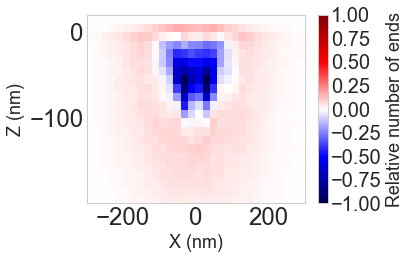

In [312]:
# heat map RZ

plt.cm.get_cmap('seismic')
plt.set_cmap('seismic')


# x = branched_actin_bound_ends.plus_rpos_recalibrated*1000a
# y = (branched_actin_bound_ends.plus_zpos+0.4)*(-1000)

x_plus = branched_actin_bound_ends.plus_xpos_recalibrated*1000
z_plus = (branched_actin_bound_ends.plus_zpos+0.4)*(-1000)

x_minus = branched_actin_bound_ends.minus_xpos_recalibrated*1000
z_minus = (branched_actin_bound_ends.minus_zpos+0.4)*(-1000)

# set number of bins (kind of like pixel size) here. 

# x: 600 points, 30 bins is about 20 nm pixel.
# z: about 10 nm pixel

model_points_plus,xs,ys=np.histogram2d(x_plus,z_plus, bins=[30,22],range=[[-300,300],[-200, 20]])
model_points_plus=np.flipud(np.rot90(model_points_plus))

model_points_minus,xs,ys=np.histogram2d(x_minus,z_minus, bins=[30,22],range=[[-300,300],[-200, 20]])
model_points_minus=np.flipud(np.rot90(model_points_minus))    

# mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
# assuming that nb time points is same for all runs. using one model point = 10 nm and one actin subunit is 2.75 nm.

model_points_plus=model_points_plus/len(runs)/len(times)
model_points_minus=model_points_minus/len(runs)/len(times)

# difference between plus and minus ends. positive is more plus ends.

ends_plus_over_minus = model_points_plus-model_points_minus

plt.pcolormesh(xs, ys, ends_plus_over_minus)

plt.xlim([-300, 300])
plt.ylim(bottom = -199)

# max colormap to show

plt.clim([-1, 1])

plt.colorbar(label = 'Relative number of ends')

plt.xlabel('X (nm)')
plt.ylabel('Z (nm)')

plt.xticks(size=24)
plt.yticks(size=24)

plt.tight_layout()

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_plusminus_ends_map_XZ_seismic.png')
    plt.savefig('../figures/'+pref+'_plusminus_ends_map_XZ_seismic.pdf')

plt.show()

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


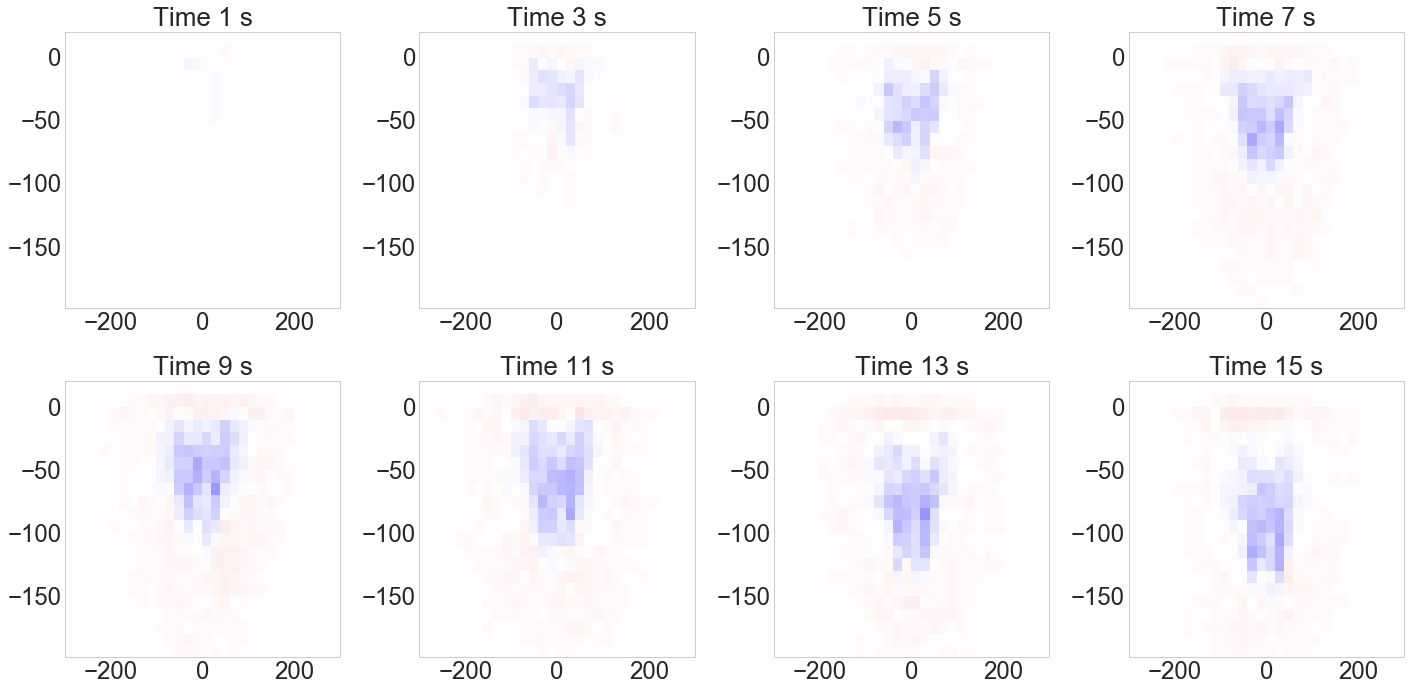

In [31]:
plt.figure(figsize=(20,10))

# plot one second intervals, show every other time point.

plt.cm.get_cmap('seismic')
plt.set_cmap('seismic')


for i, timept in enumerate(range(1,16,2),start=1):
    

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
    branched_actin_bound_ends_time=branched_actin_bound_ends.loc[branched_actin_bound_ends['time']>(timept-1)].loc[branched_actin_bound_ends['time']<=(timept)]

    times_per_timept=len(sorted(list(set(branched_actin_bound_ends_time.time))))

    # set position

    x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000
    z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)

    x_minus_time = branched_actin_bound_ends_time.minus_xpos_recalibrated*1000
    z_minus_time = (branched_actin_bound_ends_time.minus_zpos+0.4)*(-1000)
    
    # set number of bins (kind of like pixel size) here. 
    
    # x: 600 points, 30 bins is about 20 nm pixel.
    # z: about 10 nm pixel
    
    model_points_plus,xs,ys=np.histogram2d(x_plus_time,z_plus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points_plus=np.flipud(np.rot90(model_points_plus))

    model_points_minus,xs,ys=np.histogram2d(x_minus_time,z_minus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points_minus=np.flipud(np.rot90(model_points_minus))    
    
    # histogram (sum) for one time

    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
    # assuming that nb time points is same for all runs. using one model point = 10 nm and one actin subunit is 2.75 nm.

    model_points_plus=model_points_plus/len(runs)/times_per_timept
    model_points_minus=model_points_minus/len(runs)/times_per_timept

    # difference between plus and minus ends. positive is more plus ends.
    
    ends_plus_over_minus = model_points_plus-model_points_minus
    
    
    plt.subplot(2, 4, i)

      
    plt.pcolormesh(xs, ys, ends_plus_over_minus)

#     plt.imshow(model_points_minus)

    
#     plt.set_cmap('Oranges')    
#     plt.pcolormesh(xs, ys, model_points_minus)


    plt.title('Time ' + str(timept) + ' s', fontsize=26)

    # log scale 
    # plt.hist2d(x, y, bins = 40, norm=LogNorm())


    plt.xlim([-300, 300])
    plt.ylim(bottom = -199)

    # max colormap to show
    
    plt.clim([-7, 7])
    
#     plt.xlabel('x (nm)')
#     plt.ylabel('Z (nm)')
    
    plt.xticks(size=24)
    plt.yticks(size=24)

    plt.tight_layout()

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_plusminus_ends_map_XZ_time_subplots_seismic.png')
    plt.savefig('../figures/'+pref+'_plusminus_ends_map_XZ_time_subplots_seismic.pdf')

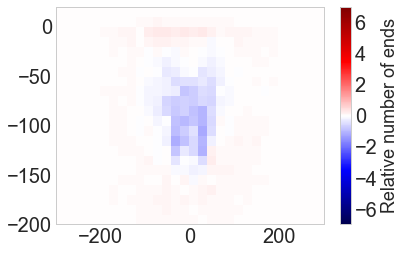

In [32]:
plt.figure()
plt.pcolormesh(xs, ys, ends_plus_over_minus)
plt.clim([-7, 7])
plt.colorbar(label = 'Relative number of ends')

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_plusminus_ends_map_XZ_time_subplots_colorbar.png')

plt.show()

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


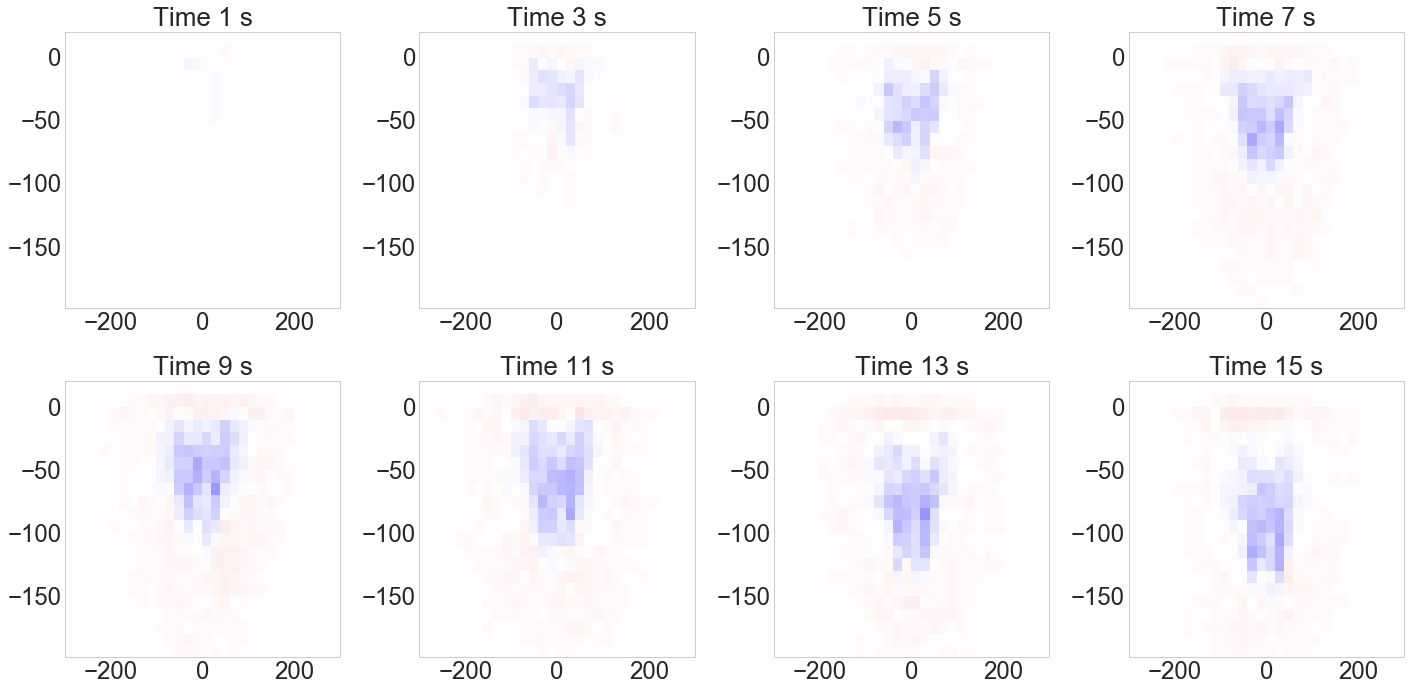

In [34]:
plt.figure(figsize=(20,10))

# plot one second intervals, show every other time point.

plt.cm.get_cmap('seismic')
plt.set_cmap('seismic')


for i, timept in enumerate(range(1,16,2),start=1):
    

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
    branched_actin_bound_ends_time=branched_actin_bound_ends.loc[branched_actin_bound_ends['time']>(timept-1)].loc[branched_actin_bound_ends['time']<=(timept)]

    times_per_timept=len(sorted(list(set(branched_actin_bound_ends_time.time))))

    # set position

    x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000
    z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)

    x_minus_time = branched_actin_bound_ends_time.minus_xpos_recalibrated*1000
    z_minus_time = (branched_actin_bound_ends_time.minus_zpos+0.4)*(-1000)
    
    # set number of bins (kind of like pixel size) here. 
    
    # x: 600 points, 30 bins is about 20 nm pixel.
    # z: about 10 nm pixel
    
    model_points_plus,xs,ys=np.histogram2d(x_plus_time,z_plus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points_plus=np.flipud(np.rot90(model_points_plus))

    model_points_minus,xs,ys=np.histogram2d(x_minus_time,z_minus_time,bins=[30,22],range=[[-300,300],[-200, 20]])
    model_points_minus=np.flipud(np.rot90(model_points_minus))    
    
    # histogram (sum) for one time

    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
    # assuming that nb time points is same for all runs. using one model point = 10 nm and one actin subunit is 2.75 nm.

    model_points_plus=model_points_plus/len(runs)/times_per_timept
    model_points_minus=model_points_minus/len(runs)/times_per_timept

    # difference between plus and minus ends. positive is more plus ends.
    
    ends_plus_over_minus = model_points_plus-model_points_minus
    
    
    plt.subplot(2, 4, i)

      
    plt.pcolormesh(xs, ys, ends_plus_over_minus)

#     plt.imshow(model_points_minus)

    
#     plt.set_cmap('Oranges')    
#     plt.pcolormesh(xs, ys, model_points_minus)


    plt.title('Time ' + str(timept) + ' s', fontsize=26)

    # log scale 
    # plt.hist2d(x, y, bins = 40, norm=LogNorm())


    plt.xlim([-300, 300])
    plt.ylim(bottom = -199)

    # max colormap to show
    
    plt.clim([-7, 7])
    
#     plt.xlabel('x (nm)')
#     plt.ylabel('Z (nm)')
    
    plt.xticks(size=24)
    plt.yticks(size=24)

    plt.tight_layout()

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_plusminus_ends_map_XZ_time_subplots_seismic.png')
    plt.savefig('../figures/'+pref+'_plusminus_ends_map_XZ_time_subplots_seismic.pdf')

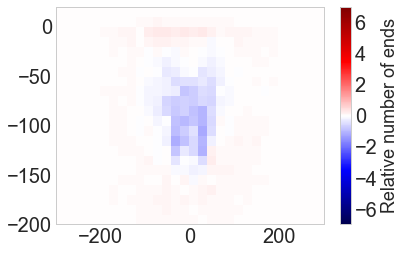

In [35]:
plt.figure()
plt.pcolormesh(xs, ys, ends_plus_over_minus)
plt.clim([-7, 7])
plt.colorbar(label = 'Relative number of ends')

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_plusminus_ends_map_XZ_time_subplots_colorbar.png')

plt.show()

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


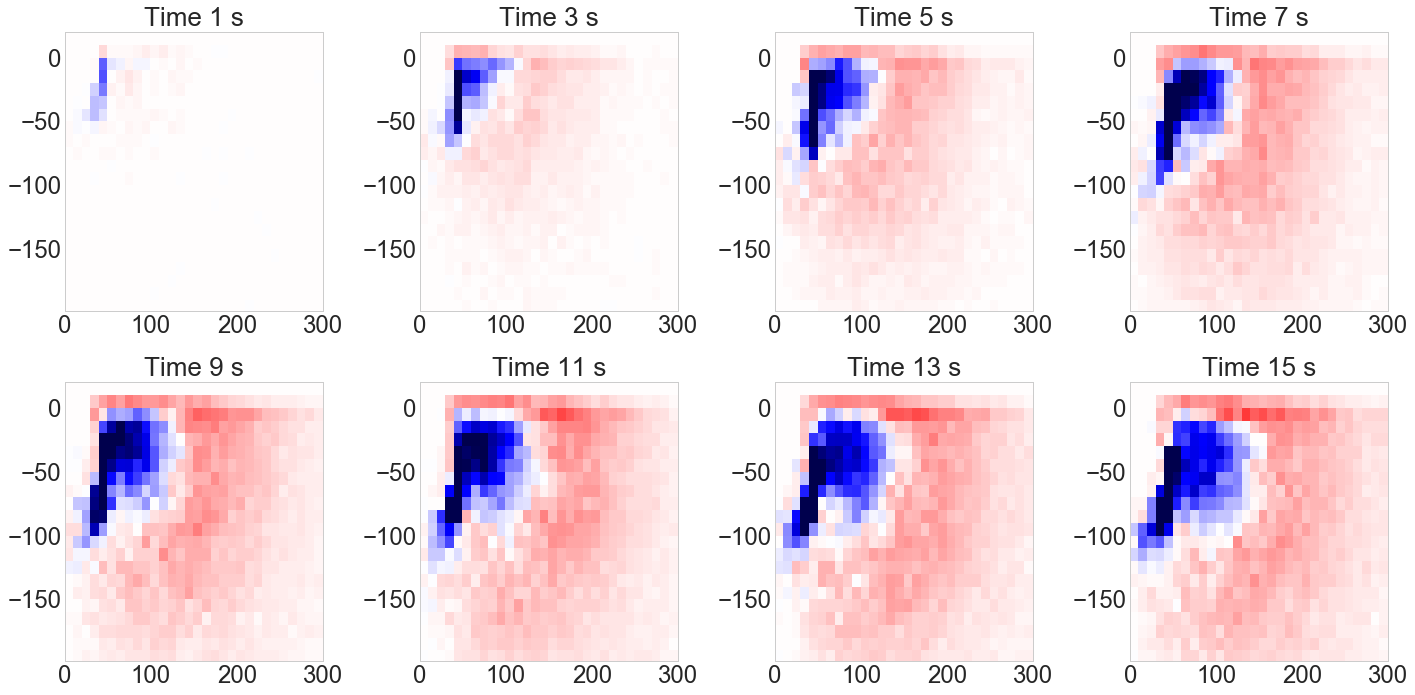

In [52]:
# versus R

plt.figure(figsize=(20,10))

# plot one second intervals, show every other time point.

plt.cm.get_cmap('seismic')
plt.set_cmap('seismic')


for i, timept in enumerate(range(1,16,2),start=1):
    

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
    branched_actin_bound_ends_time=branched_actin_bound_ends.loc[branched_actin_bound_ends['time']>(timept-1)].loc[branched_actin_bound_ends['time']<=(timept)]

    times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

    # set position

    r_plus_time = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000
    z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)

    r_minus_time = branched_actin_bound_ends_time.minus_rpos_recalibrated*1000
    z_minus_time = (branched_actin_bound_ends_time.minus_zpos+0.4)*(-1000)
    
    # set number of bins (kind of like pixel size) here. 
    
    # x: 600 points, 30 bins is about 20 nm pixel.
    # z: about 10 nm pixel
    
    model_points_plus,xs,ys=np.histogram2d(r_plus_time,z_plus_time,bins=[30,22],range=[[0, 300],[-200, 20]])
    model_points_plus=np.flipud(np.rot90(model_points_plus))

    model_points_minus,xs,ys=np.histogram2d(r_minus_time,z_minus_time,bins=[30,22],range=[[0, 300],[-200, 20]])
    model_points_minus=np.flipud(np.rot90(model_points_minus))    
    
    # histogram (sum) for one time

    # mean actin in terms of run and time: just divide by number runs and nb time points in time bin.
    # assuming that nb time points is same for all runs. using one model point = 10 nm and one actin subunit is 2.75 nm.

    model_points_plus=model_points_plus/len(runs)/times_per_timept
    model_points_minus=model_points_minus/len(runs)/times_per_timept

    # difference between plus and minus ends. positive is more plus ends.
    
    ends_plus_over_minus = model_points_plus-model_points_minus
    
    
    plt.subplot(2, 4, i)

      
    plt.pcolormesh(xs, ys, ends_plus_over_minus)

    plt.title('Time ' + str(timept) + ' s', fontsize=26)

    # log scale 
    # plt.hist2d(x, y, bins = 40, norm=LogNorm())


    plt.xlim([0, 300])
    plt.ylim(bottom = -199)

    # max colormap to show
    
    plt.clim([-7, 7])
    
#     plt.xlabel('x (nm)')
#     plt.ylabel('Z (nm)')
    
    plt.xticks(size=24)
    plt.yticks(size=24)

    plt.tight_layout()

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'plusminus_ends_map_RZ_time_subplots_seismic.png')
    plt.savefig('../figures/'+pref+'plusminus_ends_map_RZ_time_subplots_seismic.pdf')


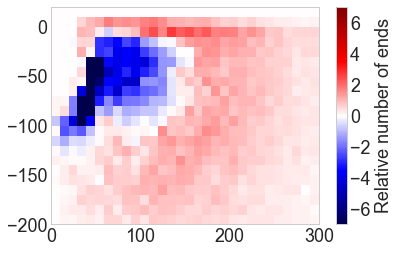

In [50]:
plt.figure()
plt.pcolormesh(xs, ys, ends_plus_over_minus)
plt.clim([-7, 7])
plt.colorbar(label = 'Relative number of ends')

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'plusminus_ends_map_RZ_time_subplots_colorbar.png')

plt.show()

# hist of zpos growing, capped, all plus, minus ends


# amplitude of gap bt peak z pos as metric?

In [36]:
# for when header is misnamed plus_zir
if 'plus_zir' in list(branched_actin_bound_ends):
    branched_actin_bound_ends['plus_zdir']=branched_actin_bound_ends['plus_zir']

In [37]:
## convert to degrees, oriented vertically such that +90 is POSITIVE orientation and -90 is negative orientation


branched_actin_bound_ends['zdir_deg_flip90'] = np.degrees((np.arccos(branched_actin_bound_ends['plus_zdir'])-(np.pi)/2))



In [34]:
# # angle of plus ends in Z

# plt.cm.get_cmap('plasma')
# plt.set_cmap('magma')

# # versus R
# plt.figure(1)
# plt.figure(figsize=(20,10))

# for i, timept in enumerate(range(1,16,2),start=1):
    
# #     print(i)
#     print('time ' + str(timept))
    
#     # bin ± 0.5s as interval
#     branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

#     branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

# #     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

#     # set position

# #     x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000

#     r_plus_time = branched_actin_bound_ends_time.plus_rpos*1000
    
#     z_dir_plus_time = branched_actin_bound_ends_time.plus_zdir

#     z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.plus_zdir))
    
#     z_dir_plus_hist,xs,ys=np.histogram2d(r_plus_time,z_dir_plus_degrees_time,bins=[30,22],range=[[0, 300],[0, 180]])
#     z_dir_plus_hist = np.flipud(np.rot90(z_dir_plus_hist))
#     plt.subplot(2, 4, i)
      
#     plt.pcolormesh(xs, ys, z_dir_plus_hist)
    
#     plt.xlim([0, 250])
    
#     plt.xlabel('R')
#     plt.ylabel('z_dir')
    
# #     cb = plt.colorbar(label = 'ends')
#     plt.title('Time ' + str(timept) + ' s', fontsize=24)
    
#     plt.xticks(size=20)
#     plt.yticks(size=20)

#     plt.tight_layout()
    
    
# # if save_figures == 'yes': 
# #     plt.savefig('../figures/'+pref+'plus_zdir_time_subplots.png')
# #     plt.savefig('../figures/'+pref+'plus_zdir_time_subplots.pdf')
    



In [35]:
# # angle of plus ends in Z

# # as flip90

# # versus R
# plt.figure(1)
# plt.figure(figsize=(20,10))

# for i, timept in enumerate(range(1,16,2),start=1):
    
# #     print(i)
#     print('time ' + str(timept))
    
#     # bin ± 0.5s as interval
#     branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

#     branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

# #     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

#     # set position

# #     x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000

#     r_plus_time = branched_actin_bound_ends_time.plus_rpos*1000
    
#     z_dir_plus_time_flip90 = branched_actin_bound_ends_time.zdir_deg_flip90

# #     z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.zdir))
    
#     z_dir_plus_hist,xs,ys=np.histogram2d(r_plus_time,z_dir_plus_time_flip90,bins=[30,22],range=[[0, 300],[-90, 90]])
#     z_dir_plus_hist = np.flipud(np.rot90(z_dir_plus_hist))
#     plt.subplot(2, 4, i)
      
#     plt.pcolormesh(xs, ys, z_dir_plus_hist)
    
#     plt.xlim([0, 250])
    
#     plt.xlabel('R')
#     plt.ylabel('z_dir')
    
# #     cb = plt.colorbar(label = 'ends')
#     plt.title('Time ' + str(timept) + ' s', fontsize=24)
    
#     plt.yticks([-90, -45, 0, 45, 90])
    
#     plt.xticks(size=20)
#     plt.yticks(size=20)

#     plt.tight_layout()
    
    
# if save_figures == 'yes': 
#     plt.savefig('../figures/'+pref+'plus_zdir_time_flip90_subplots.png')
#     plt.savefig('../figures/'+pref+'plus_zdir_time_flip90_subplots.pdf')
    



time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


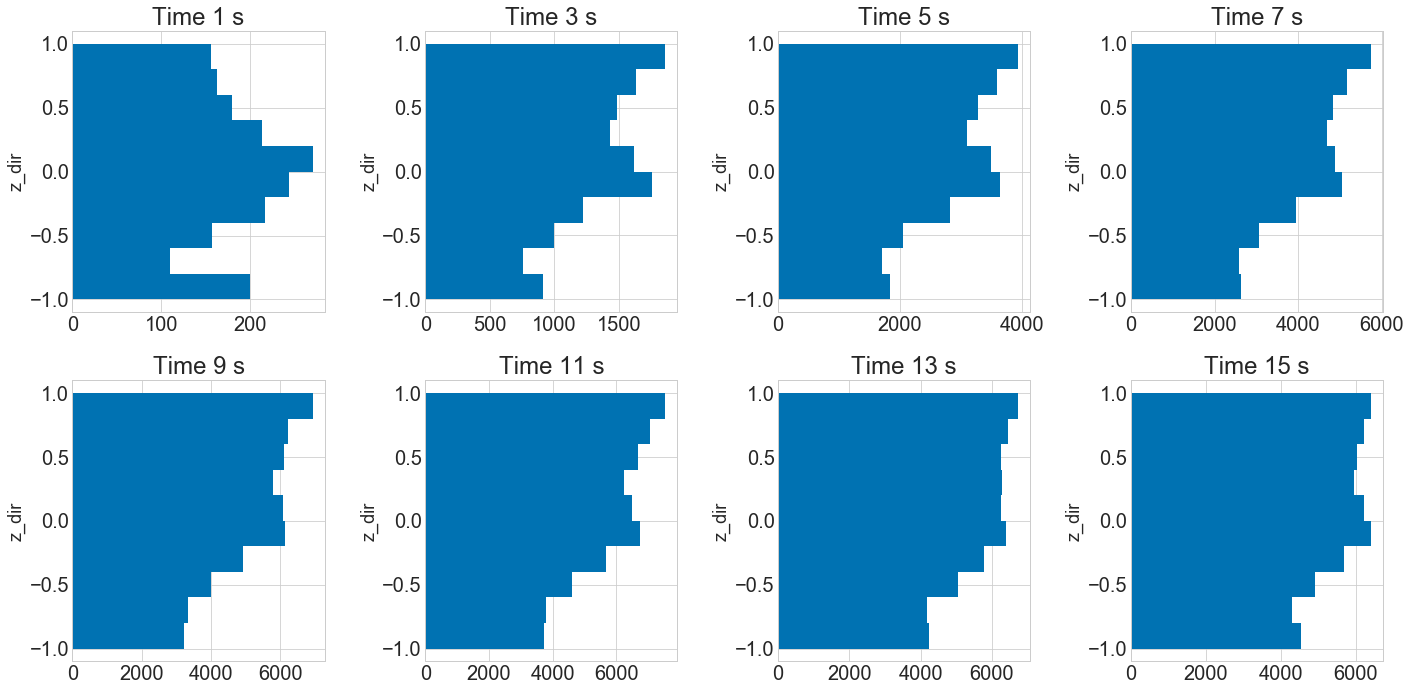

In [38]:
# angle of plus ends in Z

# hist 


plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,2),start=1):
    
#     print(i)
    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

    branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

#     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

    # set position

#     x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000

    r_plus_time = branched_actin_bound_ends_time.plus_rpos*1000
    
    z_dir_plus_time = branched_actin_bound_ends_time.plus_zdir

    z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.plus_zdir))
    
    z_dir_plus_hist,xs,ys=np.histogram2d(r_plus_time,z_dir_plus_degrees_time,bins=[30,22],range=[[0, 300],[0, 180]])
    z_dir_plus_hist = np.flipud(np.rot90(z_dir_plus_hist))
    plt.subplot(2, 4, i)
      
#     plt.pcolormesh(xs, ys, z_dir_plus_hist)
    plt.hist(z_dir_plus_time, orientation = 'horizontal')
#     plt.ylim([0, 180])
    
#     plt.xlabel('R')
    plt.ylabel('z_dir')
    
#     cb = plt.colorbar(label = 'ends')
    plt.title('Time ' + str(timept) + ' s', fontsize=24)
    
    plt.xticks(size=20)
    plt.yticks(size=20)

    plt.tight_layout()
    
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'plus_zdir_time_hist_subplots.png')
    plt.savefig('../figures/'+pref+'plus_zdir_time_hist_subplots.pdf')
    



time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


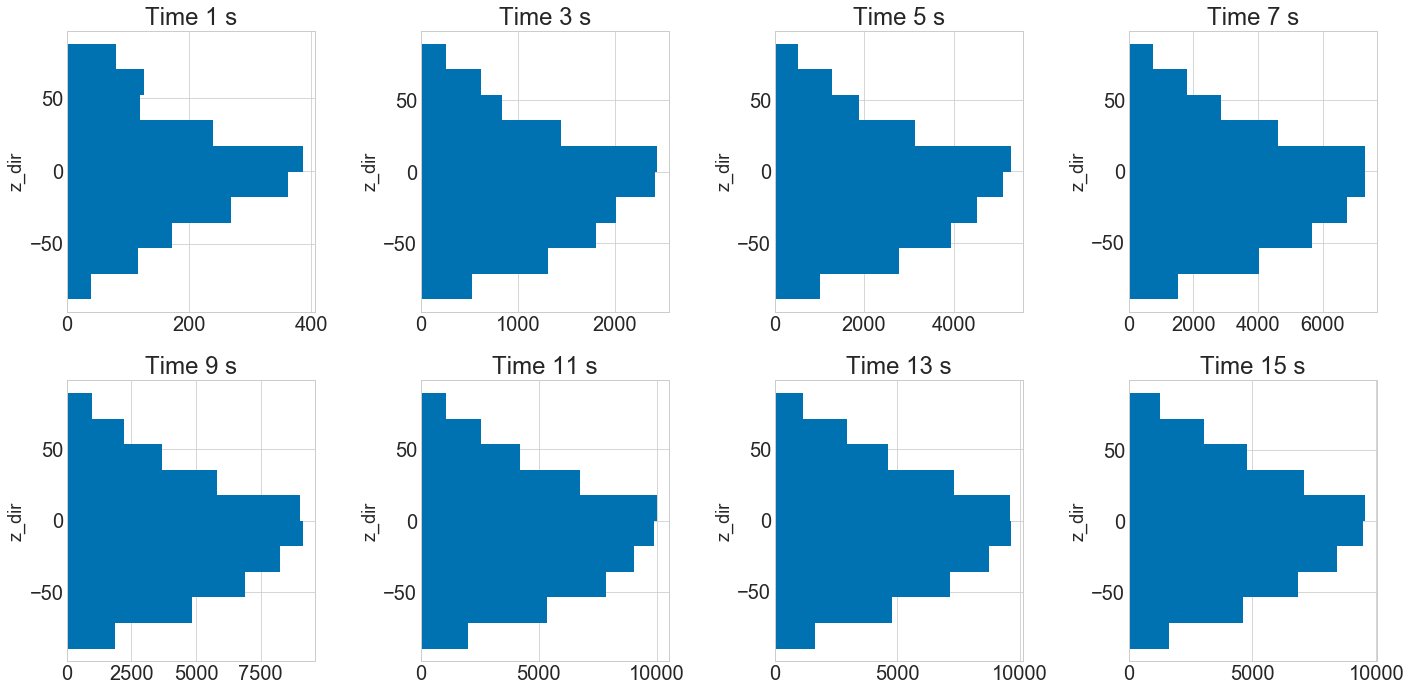

In [39]:
# angle of plus ends in Z

# hist or rose plot


plt.figure(figsize=(20,10))




for i, timept in enumerate(range(1,16,2),start=1):
    
#     print(i)
    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

    nb_runs = len(sorted(list(set(branched_actin_bound_ends_no_index.run))))
    
#     group by time, average run, to get histogram with right magnitude
    
    branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

    times_per_timept=len(sorted(list(set(branched_actin_bound_ends_time.time))))

    # set position

#     x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000

    r_plus_time = branched_actin_bound_ends_time.plus_rpos*1000
    
    z_dir_plus_time = branched_actin_bound_ends_time.plus_zdir
    
#   convert to per time point

#     z_dir_plus_time = z_dir_plus_time/len(runs)/len(times)

    z_dir_plus_rad_time = np.arccos(z_dir_plus_time)
    z_dir_plus_rad_flip90 = (z_dir_plus_rad_time-(np.pi)/2)
    
    z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.plus_zdir))
    
#     set 0 = horizontal, +90 is toward base and -90 toward tip
    
    z_dir_plus_degrees_time_flip90 = (z_dir_plus_degrees_time-90)
    
    z_dir_plus_hist,xs,ys=np.histogram2d(r_plus_time,z_dir_plus_degrees_time,bins=[30,22],range=[[0, 300],[0, 180]])
    z_dir_plus_hist = np.flipud(np.rot90(z_dir_plus_hist))
    
    z_dir_plus_hist = z_dir_plus_hist/nb_runs/times_per_timept
    
    plt.subplot(2, 4, i)
      
#     plt.pcolormesh(xs, ys, z_dir_plus_hist)
    plt.hist(z_dir_plus_degrees_time_flip90, orientation = 'horizontal')
#     plt.ylim([0, 180])
    
#     plt.xlabel('R')
    plt.ylabel('z_dir')
    
#     cb = plt.colorbar(label = 'ends')
    plt.title('Time ' + str(timept) + ' s', fontsize=24)
    
    plt.xticks(size=20)
    plt.yticks(size=20)

    plt.tight_layout()
    
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'plus_zdir_time_hist_degrees_flip90_subplots.png')
    plt.savefig('../figures/'+pref+'plus_zdir_time_hist_degrees_flip90_subplots.pdf')
    



time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


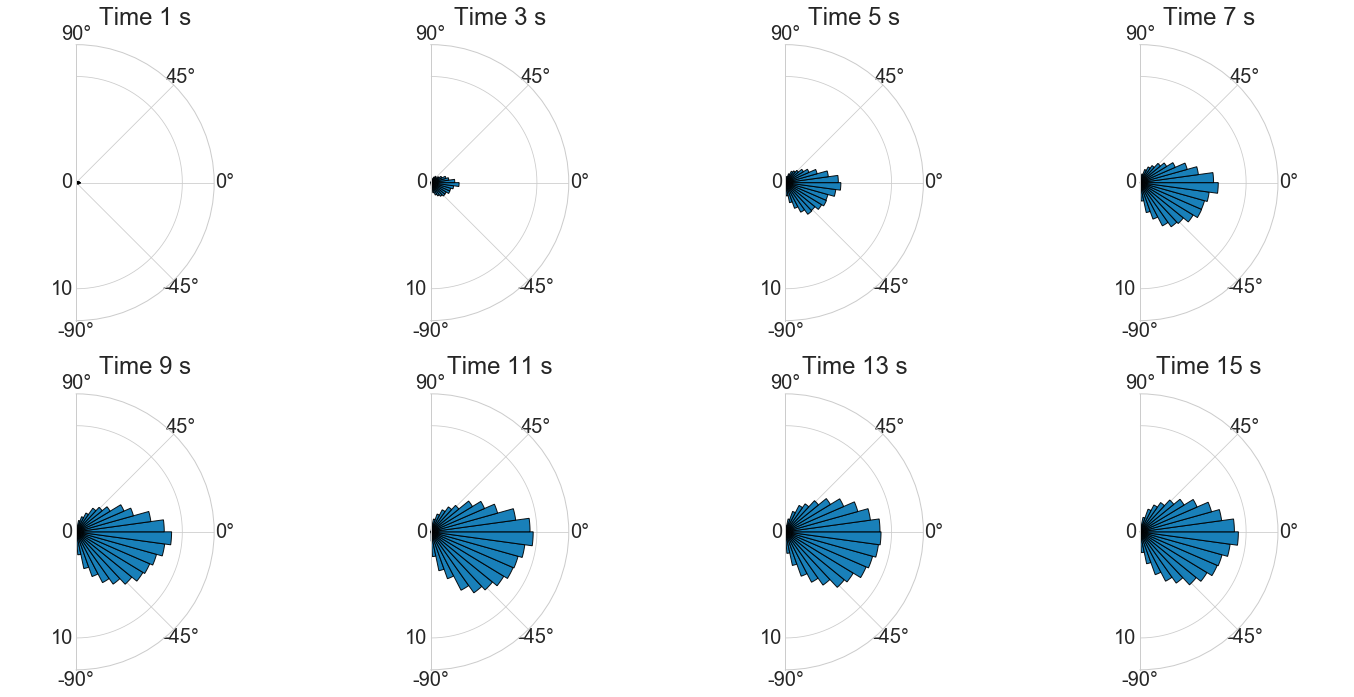

In [40]:
# rose plot


plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,2),start=1):
    
#     print(i)
    print('time ' + str(timept))
    
    # bin 1s interval [time-1:time]
    branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

    branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

#     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))
    nb_runs = len(sorted(list(set(branched_actin_bound_ends_no_index.run))))
    
    times_per_timept=len(sorted(list(set(branched_actin_bound_ends_time.time))))


    # set position

#     x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000

    z_dir_plus_time = branched_actin_bound_ends_time.plus_zdir

#     print(len(z_dir_plus_time))
    z_dir_plus_rad_time = np.arccos(z_dir_plus_time)
    z_dir_plus_rad_flip90 = (z_dir_plus_rad_time-(np.pi)/2)
    
    z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.plus_zdir))
    
#     set 0 = horizontal, +90 is toward base and -90 toward tip
    
    z_dir_plus_degrees_time_flip90 = (z_dir_plus_degrees_time-90)
    
#     z_dir_plus_hist,xs,ys=np.histogram2d(r_plus_time,z_dir_plus_degrees_time,bins=[30,22],range=[[0, 300],[0, 180]])
#     z_dir_plus_hist = np.flipud(np.rot90(z_dir_plus_hist))
    ax = plt.subplot(2, 4, i, polar=True)
    
    
    # http://qingkaikong.blogspot.com/2016/04/plot-histogram-on-clock.html

#     arr = z_dir_plus_rad_flip90
    N = 23
    bottom = 0

    # make the histogram that bin
    radii, tick = np.histogram(z_dir_plus_rad_flip90, bins = 23)

#     scle to one tie point
    radii = radii/nb_runs/times_per_timept
    
    # create theta for tick
    theta = np.linspace(-np.pi/2, np.pi/2, N, endpoint=False)

    # width of each bin on the plot
    width = (np.pi) / N

    # make a polar plot
#     aplt.figure(figsize = (12, 8))
#     ax = plt.subplot(111, polar=True)
    bars = ax.bar(theta, radii, width=width, bottom=bottom, edgecolor='black', alpha=0.9)
    
    plt.xlim([-np.pi/2, np.pi/2])


#     plt.pcolormesh(xs, ys, z_dir_plus_hist)
#     plt.hist(z_dir_plus_degrees_time_flip90, orientation = 'horizontal')
#     plt.ylim([0, 180])
    
#     plt.xlabel('R')
#     plt.ylabel('z_dir')
    
#     cb = plt.colorbar(label = 'ends')
    plt.title('Time ' + str(timept) + ' s', fontsize=24)
    
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.yticks([0, 10])

    plt.xticks([-np.pi/2,-np.pi/4,0,np.pi/4,np.pi/2])
    plt.ylim([0, 13])
    
plt.tight_layout()
    
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'plus_zdir_time_rose_flip90_subplots_abs.png')
    plt.savefig('../figures/'+pref+'plus_zdir_time_rose_flip90_subplots_abs.pdf')
    
plt.show()


In [ ]:
# # http://qingkaikong.blogspot.com/2016/04/plot-histogram-on-clock.html

# arr = z_dir_plus_rad_flip90
# N = 23
# bottom = 2

# # make the histogram that bin
# radii, tick = np.histogram(z_dir_plus_rad_flip90, bins = 23)

# # create theta for tick
# theta = np.linspace(-np.pi/2, np.pi/2, N, endpoint=False)

# # width of each bin on the plot
# width = (np.pi) / N

# # make a polar plot
# plt.figure(figsize = (12, 8))
# ax = plt.subplot(111, polar=True)
# bars = ax.bar(theta, radii, width=width, bottom=bottom)

# plt.xlim([-np.pi/2, np.pi/2])

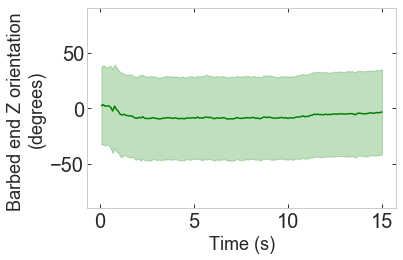

In [41]:
# mean dir over time and std
means = branched_actin_bound_ends.groupby('time').zdir_deg_flip90.mean()
stds = branched_actin_bound_ends.groupby('time').zdir_deg_flip90.std()

plt.figure(figsize=(6,4))
plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

color='green'

plt.plot(means.index,means, c=color)
times_cur = means.index
yminus=means-stds
yplus=means+stds

plt.fill_between(times_cur, np.array(yminus), np.array(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 



# branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

# # zdirs = branched_actin_bound_ends['plus_zdir']
# # zdirs_rad = np.arccos(zdirs)
# # zdirs_rad_flip90 = -(zdirs_rad-(np.pi)/2)

# # zdirs_deg_flip90 = np.degrees(zdirs_rad_flip90)

# branched_actin_bound_ends['zdir_deg_flip90'] = np.degrees(-(np.arccos(branched_actin_bound_ends['plus_zdir'])-(np.pi)/2))

# zdir_deg_flip90 = branched_actin_bound_ends['zdir_deg_flip90']
# times_cur = branched_actin_bound_ends.reset_index()['time']

# zdirs = branched_actin_bound_ends.loc[branched_actin_bound_ends['zdir_deg_flip90']].groupby('time').mean 


# # z_dirs = branched_actin_bound_ends.groupby(level=['run', 'time']).z()

# zdirs_by_time_mean = pd.DataFrame(zdirs_deg_flip90).groupby('time').mean()
# zdirs_by_time_std = pd.DataFrame(zdirs_deg_flip90).groupby('time').std()

# plt.figure(figsize=(6,4))
# plt.rc('font', size=20) 
# plt.rc('xtick', labelsize=20) 
# plt.rc('ytick', labelsize=20) 

# color='green'

# plt.plot(zdirs_by_time_mean.index,zdirs_by_time_mean, c=color)
# yminus=zdirs_by_time_mean.plus_zdir-zdirs_by_time_std.plus_zdir
# yplus=zdirs_by_time_mean.plus_zdir+zdirs_by_time_std.plus_zdir

# plt.fill_between(zdirs_by_time_mean.index, np.array(yminus), np.array(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 


plt.xlabel('Time (s)')
plt.ylabel('Barbed end Z orientation \n(degrees)')

# z

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)

plt.ylim([-90, 90])
plt.tight_layout()

plt.savefig('../figures/'+pref+'zdir_vs_time.png')
plt.savefig('../figures/'+pref+'zdir_vs_time.pdf')

plt.show()

## anisotropy of Z dir relative to randomly oriented filaments



## absolute versus relative to XYZ > 5 nm from bud

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


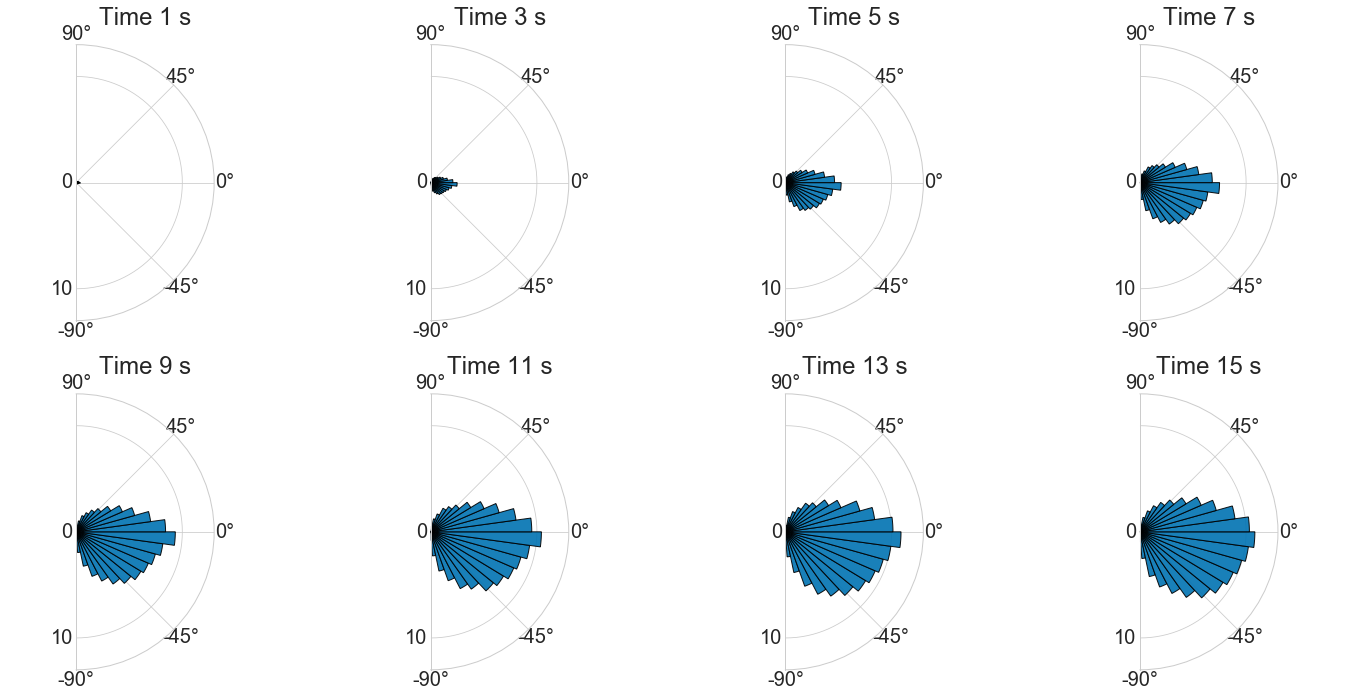

In [66]:
# rose plot


plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,2),start=1):
    
#     print(i)
    print('time ' + str(timept))


    # bin 1s interval [time-1:time]
    branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

    branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]
    branched_actin_bound_ends_time_outside_bud = branched_actin_bound_ends_time.loc[branched_actin_bound_ends_time['plus_rpos_recalibrated']>0.035]

#     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))
    nb_runs = len(sorted(list(set(branched_actin_bound_ends_no_index.run))))
    
    times_per_timept=len(sorted(list(set(branched_actin_bound_ends_time.time))))


    # set position

#     x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000

    z_dir_plus_time = branched_actin_bound_ends_time_outside_bud.plus_zdir

#     print(len(z_dir_plus_time))
    z_dir_plus_rad_time = np.arccos(z_dir_plus_time)
    z_dir_plus_rad_flip90 = (z_dir_plus_rad_time-(np.pi)/2)
    
    z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.plus_zdir))
    
#     set 0 = horizontal, +90 is toward base and -90 toward tip
    
    z_dir_plus_degrees_time_flip90 = (z_dir_plus_degrees_time-90)
    

    ax = plt.subplot(2, 4, i, polar=True)
    
    
    # http://qingkaikong.blogspot.com/2016/04/plot-histogram-on-clock.html

#     arr = z_dir_plus_rad_flip90
    N = 23
    bottom = 0

    # make the histogram that bin
    radii, tick = np.histogram(z_dir_plus_rad_flip90, bins = 23)

#     scle to one time point
    radii = radii/nb_runs/times_per_timept
    
    # create theta for tick
    theta = np.linspace(-np.pi/2, np.pi/2, N, endpoint=False)

    # width of each bin on the plot
    width = (np.pi) / N

    # make a polar plot

    bars = ax.bar(theta, radii, width=width, bottom=bottom, edgecolor='black', alpha=0.9)
    
    plt.xlim([-np.pi/2, np.pi/2])



    plt.title('Time ' + str(timept) + ' s', fontsize=24)
    
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.yticks([0, 10])

    plt.xticks([-np.pi/2,-np.pi/4,0,np.pi/4,np.pi/2])
    plt.ylim([0, 13])
    
plt.tight_layout()
    
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'plus_zdir_time_rose_flip90_subplots_abs_outside_bud.png')
    plt.savefig('../figures/'+pref+'plus_zdir_time_rose_flip90_subplots_abs_outside_bud.pdf')
    
plt.show()

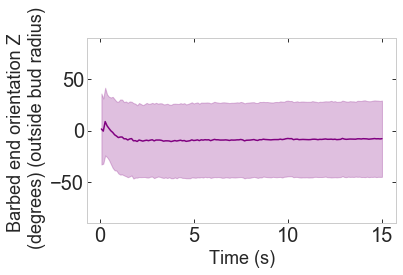

In [218]:
# mean dir over time and std
# means = branched_actin_bound_ends.groupby('time').radial_orientation.mean()
# stds = branched_actin_bound_ends.groupby('time').radial_orientation.std()

means = branched_actin_bound_ends.loc[branched_actin_bound_ends['plus_rpos_recalibrated']>0.045].groupby('time').zdir_deg_flip90.mean()
stds = branched_actin_bound_ends.loc[branched_actin_bound_ends['plus_rpos_recalibrated']>0.045].groupby('time').zdir_deg_flip90.std()


plt.figure(figsize=(6,4))
plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

color='purple'

plt.plot(means.index,means, c=color)
times_cur = means.index
yminus=means-stds
yplus=means+stds

plt.fill_between(times_cur, np.array(yminus), np.array(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 



# branched_actin_bound_ends
# branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

# # only ends > 35 nm from bud, in recalibrated axes
# zdirs = branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['plus_rpos_recalibrated']>0.035]['plus_zdir']
# zdirs_rad = np.arccos(zdirs)
# zdirs_rad_flip90 = -(zdirs_rad-(np.pi)/2)

# zdirs_deg_flip90 = np.degrees(zdirs_rad_flip90)
# plt.hist(zdirs_deg_flip90)

# pd.d

# # z_dirs = branched_actin_bound_ends.groupby(level=['run', 'time']).z()

# zdirs_by_time_mean = pd.DataFrame(zdirs_deg_flip90).groupby('time').mean()
# zdirs_by_time_std = pd.DataFrame(zdirs_deg_flip90).groupby('time').std()

# plt.figure(figsize=(6,4))
# plt.rc('font', size=20) 
# plt.rc('xtick', labelsize=20) 
# plt.rc('ytick', labelsize=20) 

# color='green'

# plt.plot(zdirs_by_time_mean.index,zdirs_by_time_mean, c=color)
# yminus=zdirs_by_time_mean.plus_zdir-zdirs_by_time_std.plus_zdir
# yplus=zdirs_by_time_mean.plus_zdir+zdirs_by_time_std.plus_zdir

# plt.fill_between(zdirs_by_time_mean.index, np.array(yminus), np.array(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 


plt.xlabel('Time (s)')
plt.ylabel('Barbed end orientation Z \n (degrees) (outside bud radius)')

# z

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)

plt.ylim([-90, 90])
plt.tight_layout()

plt.savefig('../figures/'+pref+'zdir_outside_bud_vs_time.png')
plt.savefig('../figures/'+pref+'zdir_outside_bud_vs_time.pdf')

plt.show()

## zdir versus Z position

In [37]:
# # angle of plus ends in Z

# # as flip90

# # versus R
# plt.figure(1)
# plt.figure(figsize=(20,10))

# for i, timept in enumerate(range(1,16,2),start=1):
    
# #     print(i)
#     print('time ' + str(timept))
    
#     # bin ± 0.5s as interval
#     branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

#     branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

# #     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

#     # set position

# #     x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000

#     z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)
    
#     z_dir_plus_time_flip90 = branched_actin_bound_ends_time.zdir_deg_flip90

# #     z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.zdir))
    
#     z_dir_plus_hist,xs,ys=np.histogram2d(z_plus_time,z_dir_plus_time_flip90,bins=[30,22],range=[[-200, 20],[-90, 90]])
# #     z_dir_plus_hist,xs,ys=np.histogram2d(z_dir_plus_time_flip90,z_plus_time,bins=[30,22],range=[[-90, 90],[-200, 20]])


#     z_dir_plus_hist = np.flipud(np.rot90(z_dir_plus_hist))
#     plt.subplot(2, 4, i)
      
#     plt.pcolormesh(xs, ys, z_dir_plus_hist)
    
# #     plt.xlim([0, 250])
    
#     plt.xlabel('Z')
#     plt.ylabel('z_dir')
    
# #     cb = plt.colorbar(label = 'ends')
#     plt.title('Time ' + str(timept) + ' s', fontsize=24)
    
#     plt.yticks([-90, -45, 0, 45, 90])
    
#     plt.xticks(size=20)
#     plt.yticks(size=20)

#     plt.tight_layout()
    
    
# if save_figures == 'yes': 
#     plt.savefig('../figures/'+pref+'plus_zdir_time_flip90_vs_z_subplots.png')
#     plt.savefig('../figures/'+pref+'plus_zdir_time_flip90_vs_z_subplots.pdf')
    



In [43]:
# hsv 75% colormap
# https://stackoverflow.com/questions/18926031/how-to-extract-a-subset-of-a-colormap-as-a-new-colormap-in-matplotlib
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

# arr = np.linspace(0, 50, 100).reshape((10, 10))
# fig, ax = plt.subplots(ncols=2)

cmap = plt.get_cmap('hsv')
new_cmap = truncate_colormap(cmap, 0, 0.75)

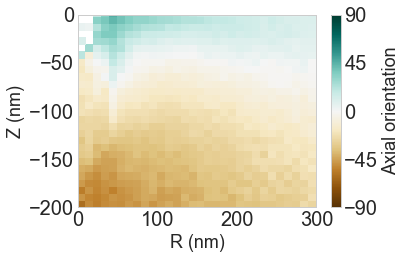

In [43]:
# zdir heat map RZ

plt.cm.get_cmap('PiYG')
# plt.set_cmap('PiYG')
plt.set_cmap('BrBG')

# plt.set_cmap('hsv')



x = branched_actin_bound_ends.plus_rpos_recalibrated*1000
    
y = (branched_actin_bound_ends.plus_zpos+0.4)*(-1000)

color = branched_actin_bound_ends.zdir_deg_flip90
# x = hip1r_bound_ends_attachment['bending_energy']

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='mean', range = [[0,300],[-200,20]])
bin_means = np.flipud(np.rot90(bin_means))

# bin_means = bin_means/len(runs)/len(times)

# color map 

plt.pcolormesh(xedges, yedges, bin_means)

# color map hsv[0, 75%]

# plt.pcolormesh(xedges, yedges, bin_means, cmap=new_cmap)

cbar = plt.colorbar(label = 'Axial orientation')
plt.clim([-90,90])
cbar.set_ticks([-90, -45, 0, 45, 90])
# plt.caxis([-90, 90])
plt.xlabel('R (nm)')
plt.ylabel('Z (nm)')
plt.ylim([-200,0])

plt.tight_layout()

if(save_figures=='yes'):

    plt.savefig('../figures/'+pref+'_axial_orientation_RZ.pdf')
    plt.savefig('../figures/'+pref+'_axial_orientation_RZ.png')
    
plt.show()

In [ ]:
# same color code as cytosim snapshot, 75% of hsv

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


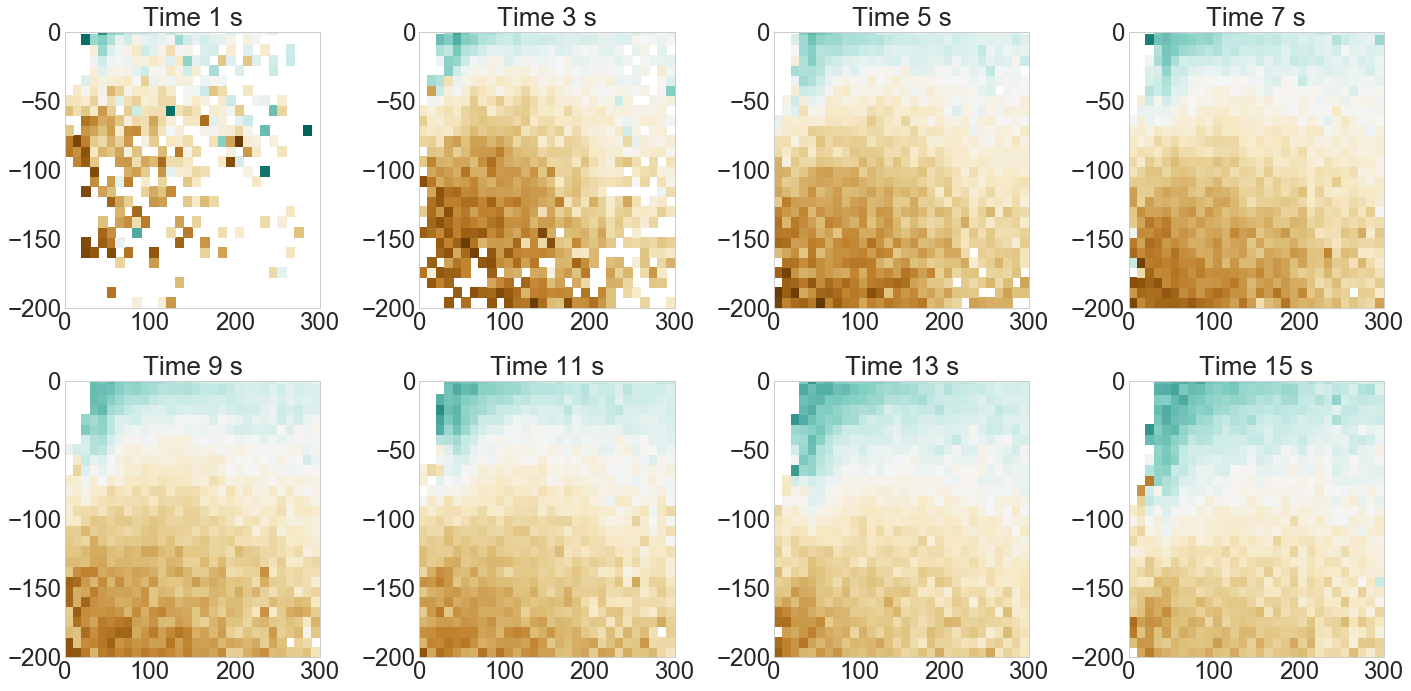

In [44]:
# zdir over time in subplots
# versus R and Z

plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,2),start=1):

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

    branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]
   
    x = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000

    y = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)
    
    color = branched_actin_bound_ends_time.zdir_deg_flip90

    bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
      bins=30, statistic='mean', range = [[0,300],[-200,20]])
    bin_means = np.flipud(np.rot90(bin_means))   
    plt.subplot(2, 4, i)
    plt.pcolormesh(xedges, yedges, bin_means)  
    plt.title('Time ' + str(timept) + ' s', fontsize=26)    
    plt.xticks(size=24)
    plt.yticks(size=24)
    plt.clim([-90,90])
    plt.ylim([-200,0])
    plt.tight_layout()
    
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_axial_orientation_time_RZ_subplots.png')
    plt.savefig('../figures/'+pref+'_axial_orientation_time_RZ_subplots.pdf')
    


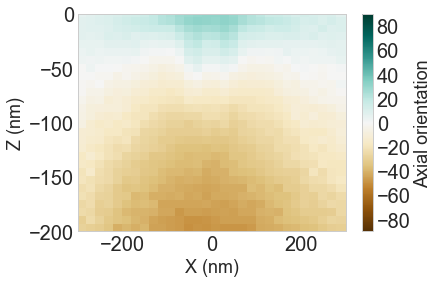

In [132]:
# zdir heat map XZ

plt.cm.get_cmap('PiYG')
# plt.set_cmap('PiYG')
plt.set_cmap('BrBG')



x = branched_actin_bound_ends.plus_xpos_recalibrated*1000
    
y = (branched_actin_bound_ends.plus_zpos+0.4)*(-1000)

color = branched_actin_bound_ends.zdir_deg_flip90
# x = hip1r_bound_ends_attachment['bending_energy']

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='mean', range = [[-300,300],[-200,20]])
bin_means = np.flipud(np.rot90(bin_means))

# bin_means = bin_means/len(runs)/len(times)

plt.pcolormesh(xedges, yedges, bin_means)

plt.colorbar(label = 'Axial orientation')
plt.clim([-90,90])
plt.xlabel('X (nm)')
plt.ylabel('Z (nm)')
plt.ylim([-200,0])

if('save_figures'=='yes'):

    plt.savefig('../figures/'+pref+'axial_orientation_XZ.pdf')
    plt.savefig('../figures/'+pref+'axial_orientation_XZ.png')

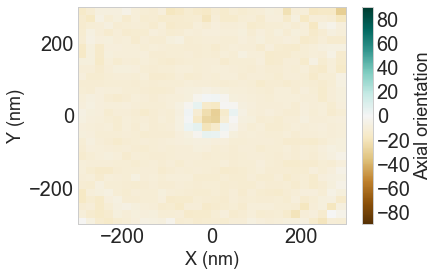

In [321]:
# zdir heat map XZ

plt.cm.get_cmap('PiYG')
# plt.set_cmap('PiYG')
plt.set_cmap('BrBG')



x = branched_actin_bound_ends.plus_xpos_recalibrated*1000
    
y = (branched_actin_bound_ends.plus_ypos_recalibrated)*(1000)

color = branched_actin_bound_ends.zdir_deg_flip90
# x = hip1r_bound_ends_attachment['bending_energy']

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='mean', range = [[-300,300],[-300,300]])
bin_means = np.flipud(np.rot90(bin_means))

# bin_means = bin_means/len(runs)/len(times)

plt.pcolormesh(xedges, yedges, bin_means)

plt.colorbar(label = 'Axial orientation')
plt.clim([-90,90])
plt.xlabel('X (nm)')
plt.ylabel('Y (nm)')
# plt.ylim([-200,0])

if(save_figures=='yes'):

    plt.savefig('../figures/'+pref+'axial_orientation_XY.pdf')
    plt.savefig('../figures/'+pref+'axial_orientation_XY.png')

In [ ]:

# as a graph

# metric for anisotropy or base-oriented organization. can wait on this til i get graphs of x y dir below.


In [45]:
# get unit vector by dividing by mgnitude of x y position

# note that these are not recalibrated to bud position, so very close to the bud the directions could be opposite. but will be consistent with dir values.

cur_x = np.array(branched_actin_bound_ends['plus_xpos'])
cur_y = np.array(branched_actin_bound_ends['plus_ypos'])

cur_x_dir = np.array(branched_actin_bound_ends['plus_xdir'])
cur_y_dir = np.array(branched_actin_bound_ends['plus_ydir'])

cur_mag = np.sqrt((cur_x*cur_x)+(cur_y*cur_y))

unit_x = np.divide(cur_x,cur_mag)
unit_y = np.divide(cur_y,cur_mag)

# radial orientatoin defined as unit vector * cos(direction).
# I think it should be one if the pos is aligned with the direction from the origin. and -1 if opposite.

# get a pos and neg control on this.

radial_orientation_x = unit_x*cur_x_dir
radial_orientation_y = unit_y*cur_y_dir

# define radial orientation as SUM radial orientation in x and y. 
# need to check this 

radial_orientation = np.sum([radial_orientation_x, radial_orientation_y], axis = 0)

branched_actin_bound_ends['radial_orientation'] = radial_orientation

# I had really better sure this comes out to random for a randomly oridented filemant. but is promising.

# with neg control

if import_random_filaments =='yes':
    random_filament_ends
    cur_x = np.array(random_filament_ends['plus_xpos'])
    cur_y = np.array(random_filament_ends['plus_ypos'])

    cur_x_dir = np.array(random_filament_ends['plus_xdir'])
    cur_y_dir = np.array(random_filament_ends['plus_ydir'])

    cur_mag = np.sqrt((cur_x*cur_x)+(cur_y*cur_y))

    unit_x = np.divide(cur_x,cur_mag)
    unit_y = np.divide(cur_y,cur_mag)

    # radial orientatoin defined as unit vector * cos(direction).
    # I think it should be one if the pos is aligned with the direction from the origin. and -1 if opposite.

    # get a pos and neg control on this.

    radial_orientation_x = unit_x*cur_x_dir
    radial_orientation_y = unit_y*cur_y_dir

    # define radial orientation as SUM radial orientation in x and y. 
    # need to check this 

    radial_orientation = np.sum([radial_orientation_x, radial_orientation_y], axis = 0)

    random_filament_ends['radial_orientation'] = radial_orientation
    print('calculated for negative control: radial orientation')


plt.hist(radial_orientation)
plt.show()
# print('radial orientation: ' + str(np.mean(radial_orientation))+ + '+-' + str(np.std(radial_orientation)))

      

NameError: name 'import_random_filaments' is not defined

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


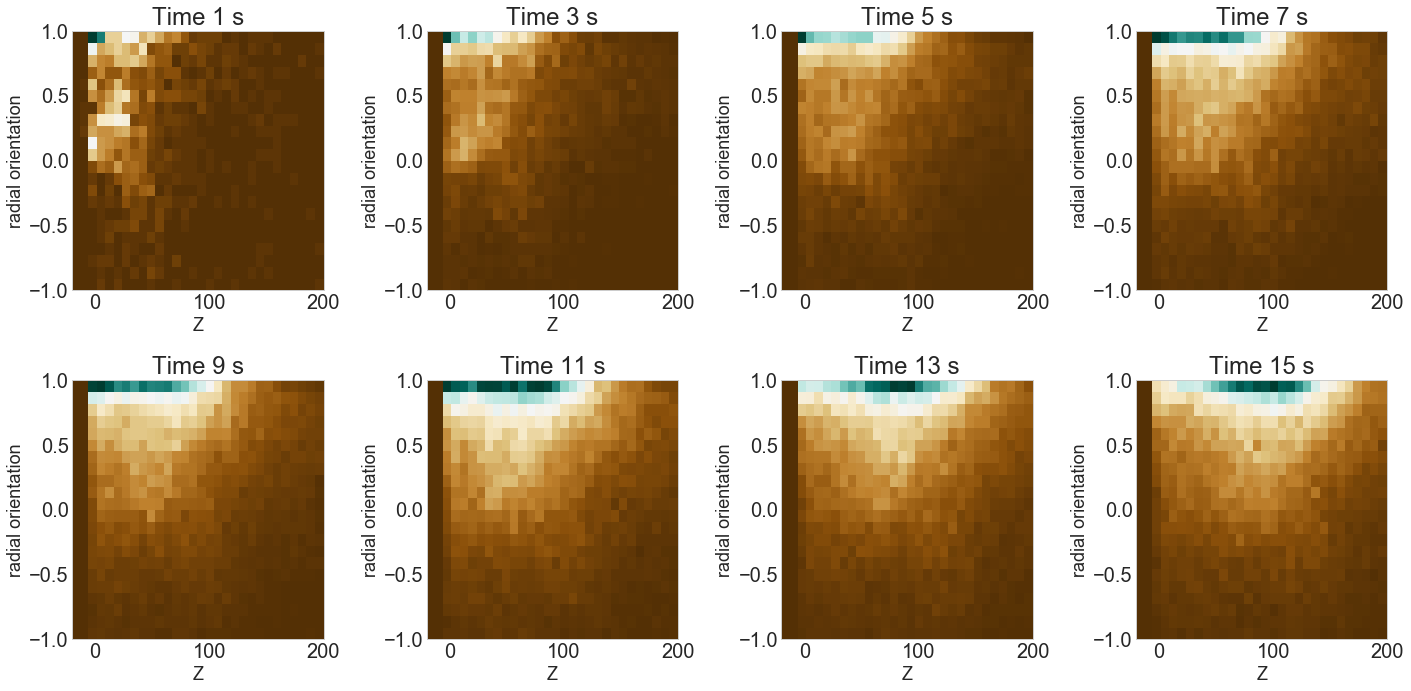

In [46]:
# radial orientation

# versus R or and Z

plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,2),start=1):

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

    branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

#     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

    # set position

    x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000
    
    r_plus_time = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000

    z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)
    
    radial_orientation_time = branched_actin_bound_ends_time.radial_orientation

#     z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.zdir))
    
    z_dir_plus_hist,xs,ys=np.histogram2d(-z_plus_time,radial_orientation_time,bins=[30,22],range=[[-20, 200],[-1, 1]])
#     z_dir_plus_hist,xs,ys=np.histogram2d(z_dir_plus_time_flip90,z_plus_time,bins=[30,22],range=[[-90, 90],[-200, 20]])


    z_dir_plus_hist = np.flipud(np.rot90(z_dir_plus_hist))
    plt.subplot(2, 4, i)
      
    plt.pcolormesh(xs, ys, z_dir_plus_hist)
    
#     plt.xlim([0, 250])
    
    plt.xlabel('Z')
    plt.ylabel('radial orientation')
    
#     cb = plt.colorbar(label = 'ends')
    plt.title('Time ' + str(timept) + ' s', fontsize=24)
    
#     plt.yticks([-90, -45, 0, 45, 90])
    
    plt.xticks(size=20)
    plt.yticks(size=20)

    plt.tight_layout()
    
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'radial_orientation_time_vs_z_subplots.png')
    plt.savefig('../figures/'+pref+'radial_orientation_time_vs_z_subplots.pdf')
    





time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


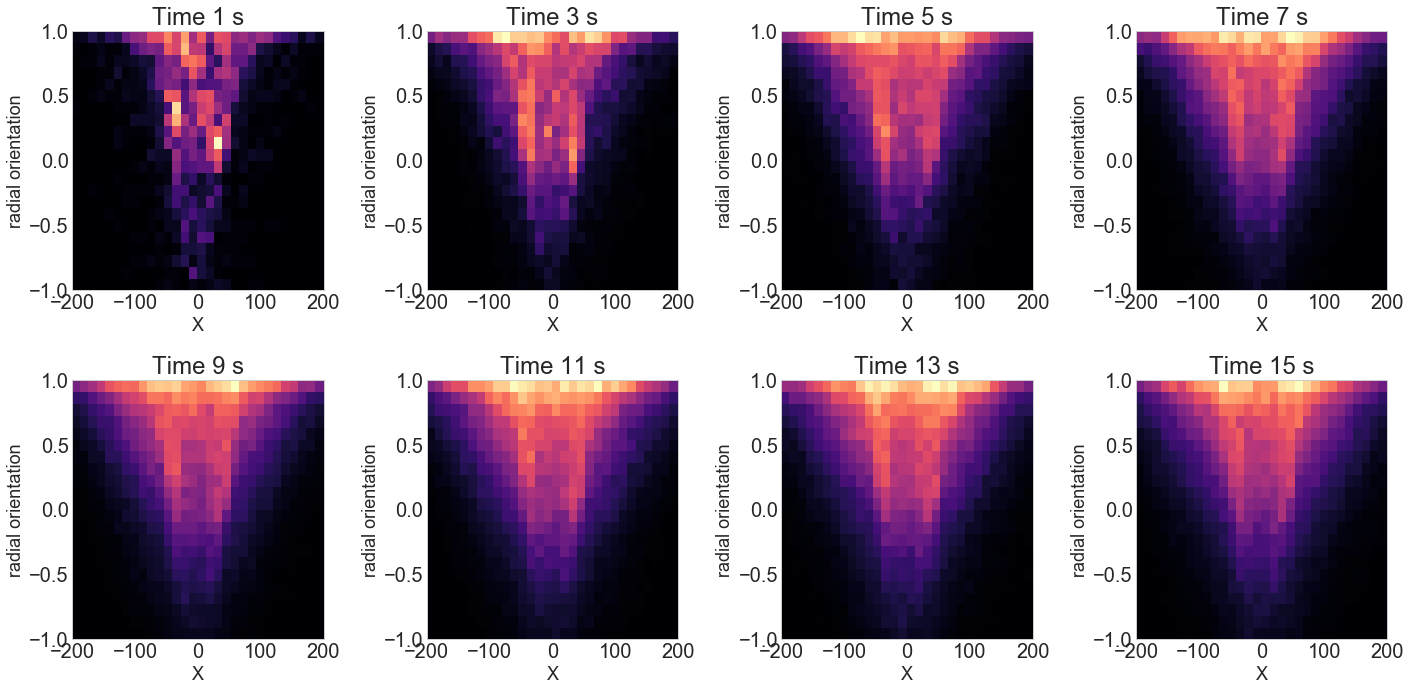

In [71]:
# radial orientation

# versus X and Z

plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,2),start=1):

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

    branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

#     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

    # set position

    x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000
    
    r_plus_time = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000

    z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)
    
    radial_orientation_time = branched_actin_bound_ends_time.radial_orientation

#     z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.zdir))
    
    z_dir_plus_hist,xs,ys=np.histogram2d(x_plus_time,radial_orientation_time,bins=[30,22],range=[[-200, 200],[-1, 1]])
#     z_dir_plus_hist,xs,ys=np.histogram2d(z_dir_plus_time_flip90,z_plus_time,bins=[30,22],range=[[-90, 90],[-200, 20]])


    z_dir_plus_hist = np.flipud(np.rot90(z_dir_plus_hist))
    plt.subplot(2, 4, i)
      
    plt.pcolormesh(xs, ys, z_dir_plus_hist)
    
#     plt.xlim([0, 250])
    
    plt.xlabel('X')
    plt.ylabel('radial orientation')
    
#     cb = plt.colorbar(label = 'ends')
    plt.title('Time ' + str(timept) + ' s', fontsize=24)
    
#     plt.yticks([-90, -45, 0, 45, 90])
    
    plt.xticks(size=20)
    plt.yticks(size=20)

    plt.tight_layout()
    
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'radial_orientation_time_vs_x_subplots.png')
    plt.savefig('../figures/'+pref+'radial_orientation_time_vs_x_subplots.pdf')
    





time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


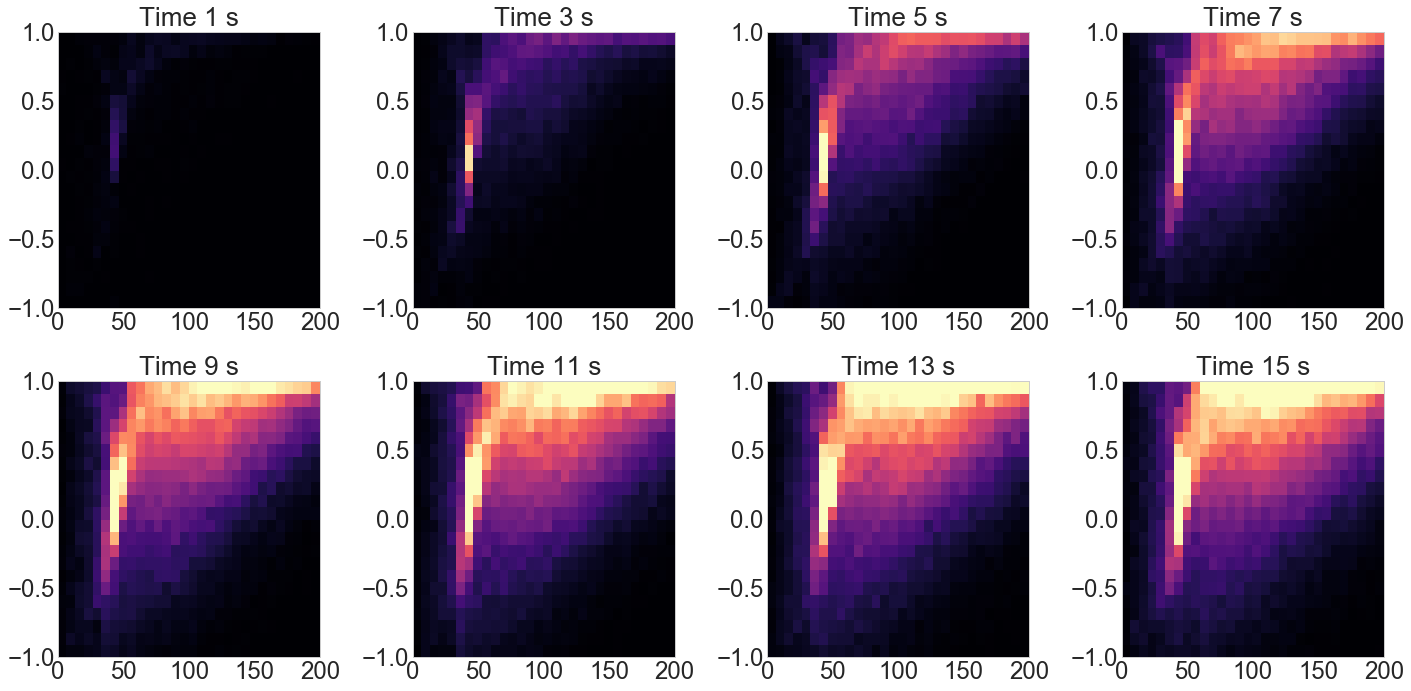

In [78]:
# radial orientation

# versus R and Z

plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,2),start=1):

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

    branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

#     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

    # set position

    x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000
    
    r_plus_time = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000

    z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)
    
    radial_orientation_time = branched_actin_bound_ends_time.radial_orientation

#     z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.zdir))
    
    r_dir_plus_hist,xs,ys=np.histogram2d(r_plus_time,radial_orientation_time,bins=[30,22],range=[[0, 200],[-1, 1]])
#     z_dir_plus_hist,xs,ys=np.histogram2d(z_dir_plus_time_flip90,z_plus_time,bins=[30,22],range=[[-90, 90],[-200, 20]])


    r_dir_plus_hist = np.flipud(np.rot90(r_dir_plus_hist))
    
#     scale by nb runs and time in time bind
    r_dir_plus_hist = r_dir_plus_hist/len(runs)/times_per_timept
    
    plt.subplot(2, 4, i)
      
    plt.pcolormesh(xs, ys, r_dir_plus_hist)
    
#     plt.xlim([0, 250])
    
#     plt.xlabel('R')
#     plt.ylabel('radial orientation')
    plt.clim([0, 0.6])
    
#     cb = plt.colorbar(label = 'ends')
    plt.title('Time ' + str(timept) + ' s', fontsize=26)
    
#     plt.yticks([-90, -45, 0, 45, 90])
    
    plt.xticks(size=24)
    plt.yticks(size=24)

    plt.tight_layout()
    
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'radial_orientation_time_vs_r_subplots_abs.png')
    plt.savefig('../figures/'+pref+'radial_orientation_time_vs_r_subplots_abs.pdf')
    


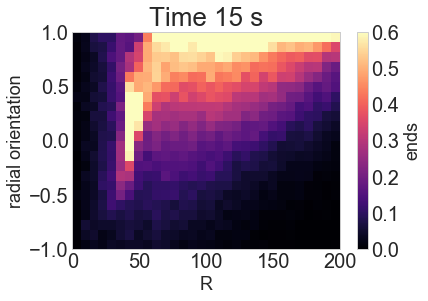

In [77]:
plt.pcolormesh(xs, ys, r_dir_plus_hist)
plt.xlabel('R')
plt.ylabel('radial orientation')
plt.clim([0, 0.6])

cb = plt.colorbar(label = 'ends')
plt.title('Time ' + str(timept) + ' s', fontsize=26)

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'radial_orientation_time_vs_r_subplots_abs_colorbar.png')

In [69]:
# # radial orientation, relative scale histogram

# # versus R and Z

# plt.figure(figsize=(20,10))

# for i, timept in enumerate(range(1,16,2),start=1):

#     print('time ' + str(timept))
    
#     # bin ± 0.5s as interval
#     branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

#     branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

# #     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

#     # set position

#     x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000
    
#     r_plus_time = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000

#     z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)
    
#     radial_orientation_time = branched_actin_bound_ends_time.radial_orientation

# #     z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.zdir))
    
#     r_dir_plus_hist,xs,ys=np.histogram2d(r_plus_time,radial_orientation_time,bins=[30,22],range=[[0, 200],[-1, 1]])
# #     z_dir_plus_hist,xs,ys=np.histogram2d(z_dir_plus_time_flip90,z_plus_time,bins=[30,22],range=[[-90, 90],[-200, 20]])


#     r_dir_plus_hist = np.flipud(np.rot90(r_dir_plus_hist))
    
# #     scale by nb runs and time in time bind
#     r_dir_plus_hist = r_dir_plus_hist/len(runs)/times_per_timept
    
#     plt.subplot(2, 4, i)
      
#     plt.pcolormesh(xs, ys, r_dir_plus_hist)
    
# #     plt.xlim([0, 250])
    
# #     plt.xlabel('R')
# #     plt.ylabel('radial orientation')
# #     plt.clim([0, 0.6])
    
# #     cb = plt.colorbar(label = 'ends')
#     plt.title('Time ' + str(timept) + ' s', fontsize=26)
    
# #     plt.yticks([-90, -45, 0, 45, 90])
    
#     plt.xticks(size=24)
#     plt.yticks(size=24)

#     plt.tight_layout()
    
    
# if save_figures == 'yes': 
#     plt.savefig('../figures/'+pref+'radial_orientation_time_vs_r_subplots_relative_colorbar.png')
#     plt.savefig('../figures/'+pref+'radial_orientation_time_vs_r_subplots_relative_colorbar.pdf')
    


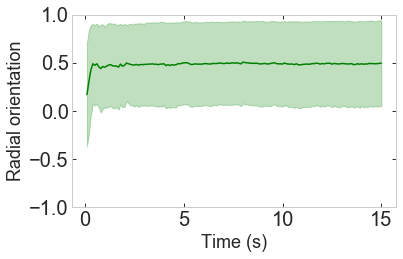

In [50]:
#### radial orientation mean std over time
means = branched_actin_bound_ends.groupby('time').radial_orientation.mean()
stds = branched_actin_bound_ends.groupby('time').radial_orientation.std()

if import_random_filaments=='yes':
    means_rf = random_filament_ends.groupby('time').radial_orientation.mean()
    stds_rf = random_filament_ends.groupby('time').radial_orientation.std()
    

plt.figure(figsize=(6,4))
plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

# random orientation control

if import_random_filaments=='yes':
    

    color='black'

    plt.plot(means_rf.index,means_rf, c=color, alpha =0.5)
    times_cur = means_rf.index
    yminus=means_rf-stds_rf
    yplus=means_rf+stds_rf

    plt.fill_between(times_cur, np.array(yminus), np.array(yplus), alpha=0.15,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 



color='green'

plt.plot(means.index,means, c=color)
times_cur = means.index
yminus=means-stds
yplus=means+stds

plt.fill_between(times_cur, np.array(yminus), np.array(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 

plt.xlabel('Time (s)')
plt.ylabel('Radial orientation')


# z

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)

plt.ylim([-1, 1])
plt.tight_layout()

if(save_figures=='yes'):
    plt.savefig('../figures/'+pref+'_radial_orientation_vs_time.png')
    plt.savefig('../figures/'+pref+'_radial_orientation_vs_time.pdf')

plt.show()

# branched_actin_bound_ends.radial_orientation

In [70]:
# # radial orientation hist

# plt.figure(figsize=(20,10))

# for i, timept in enumerate(range(1,16,2),start=1):

#     print('time ' + str(timept))
    
#     # bin ± 0.5s as interval
#     branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

#     branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

# #     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

#     # set position

# #     x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000
    
# #     r_plus_time = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000

# #     z_plus_time = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)
    
#     radial_orientation_time = branched_actin_bound_ends_time.radial_orientation

# #     z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.zdir))
    
# #     z_dir_plus_hist,xs,ys=np.histogram2d(r_plus_time,radial_orientation_time,bins=[30,22],range=[[0, 200],[-1, 1]])
# # #     z_dir_plus_hist,xs,ys=np.histogram2d(z_dir_plus_time_flip90,z_plus_time,bins=[30,22],range=[[-90, 90],[-200, 20]])


# #     z_dir_plus_hist = np.flipud(np.rot90(z_dir_plus_hist))
#     plt.subplot(2, 4, i)
      
#     plt.hist(radial_orientation_time)
    
# #     plt.xlim([0, 250])
    
# #     plt.xlabel('R')
#     plt.xlabel('radial orientation')
    
# #     cb = plt.colorbar(label = 'ends')
#     plt.title('Time ' + str(timept) + ' s', fontsize=24)
    
# #     plt.yticks([-90, -45, 0, 45, 90])
    
#     plt.xticks(size=20)
#     plt.yticks(size=20)

#     plt.tight_layout()
    
    
# if save_figures == 'yes': 
#     plt.savefig('../figures/'+pref+'radial_orientation_time_hist_subplots.png')
#     plt.savefig('../figures/'+pref+'radial_orientation_time_hist_subplots.pdf')
    





In [ ]:
# radial orientation versus x and z heat map

# bin x and z values into pixels, and then plot against those.

# make mean radial orientation per binned value, using groupby. see titanic example. but make sure it's 2d.

# radial orientation versus r and z heat map

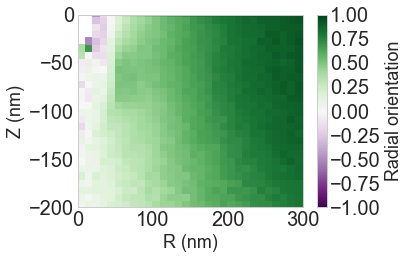

In [297]:

plt.cm.get_cmap('PiYG')
# plt.set_cmap('PiYG')
plt.set_cmap('PRGn')



x = branched_actin_bound_ends.plus_rpos_recalibrated*1000
    
y = (branched_actin_bound_ends.plus_zpos+0.4)*(-1000)

color = branched_actin_bound_ends['radial_orientation']
# x = hip1r_bound_ends_attachment['bending_energy']

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='mean', range = [[0,300],[-200,20]])
bin_means = np.flipud(np.rot90(bin_means))

# bin_means = bin_means/len(runs)/len(times)

plt.pcolormesh(xedges, yedges, bin_means)

plt.colorbar(label = 'Radial orientation')
plt.clim([-1,1])
plt.xlabel('R (nm)')
plt.ylabel('Z (nm)')
plt.ylim([-200,0])

plt.tight_layout()

if(save_figures=='yes'):

    plt.savefig('../figures/'+pref+'_radial_orientation_RZ.pdf')
    plt.savefig('../figures/'+pref+'_radial_orientation_RZ.png')

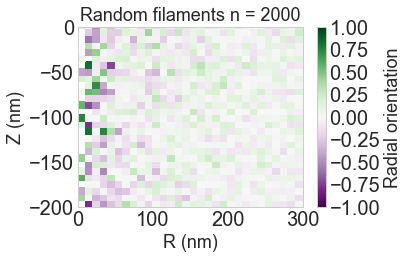

In [342]:

plt.cm.get_cmap('PiYG')
# plt.set_cmap('PiYG')
plt.set_cmap('PRGn')

if import_random_filaments =='yes':

    x = random_filament_ends.plus_rpos*1000

    y = (random_filament_ends.plus_zpos+0.4)*(-1000)

    color = random_filament_ends['radial_orientation']
    # x = hip1r_bound_ends_attachment['bending_energy']

    bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
      bins=30, statistic='mean', range = [[0,300],[-200,20]])
    bin_means = np.flipud(np.rot90(bin_means))

    # bin_means = bin_means/len(runs)/len(times)

    plt.title('Random filaments n = 2000')
    
    plt.pcolormesh(xedges, yedges, bin_means)

    plt.colorbar(label = 'Radial orientation')
    plt.clim([-1,1])
    plt.xlabel('R (nm)')
    plt.ylabel('Z (nm)')
    plt.ylim([-200,0])

    plt.tight_layout()

    if(save_figures=='yes'):

        plt.savefig('../figures/'+pref+'_random_filaments_radial_orientation_RZ.pdf')
        plt.savefig('../figures/'+pref+'_random_filaments_radial_orientation_RZ.png')

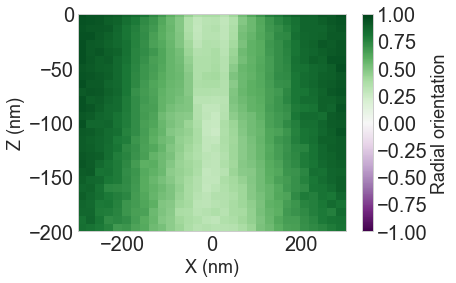

In [295]:
# XZ
plt.cm.get_cmap('PiYG')
# plt.set_cmap('PiYG')
plt.set_cmap('PRGn')



x = branched_actin_bound_ends.plus_xpos_recalibrated*1000
    
y = (branched_actin_bound_ends.plus_zpos+0.4)*(-1000)

color = branched_actin_bound_ends['radial_orientation']
# x = hip1r_bound_ends_attachment['bending_energy']

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='mean', range = [[-300,300],[-200,20]])
bin_means = np.flipud(np.rot90(bin_means))

# bin_means = bin_means/len(runs)/len(times)

plt.pcolormesh(xedges, yedges, bin_means)

plt.colorbar(label = 'Radial orientation')
plt.clim([-1,1])
plt.xlabel('X (nm)')
plt.ylabel('Z (nm)')
plt.ylim([-200,0])

if('save_figures'=='yes'):

    plt.savefig('../figures/'+pref+'_radial_orientation_XZ.pdf')
    plt.savefig('../figures/'+pref+'_radial_orientation_XZ.png')

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


<Figure size 432x288 with 0 Axes>

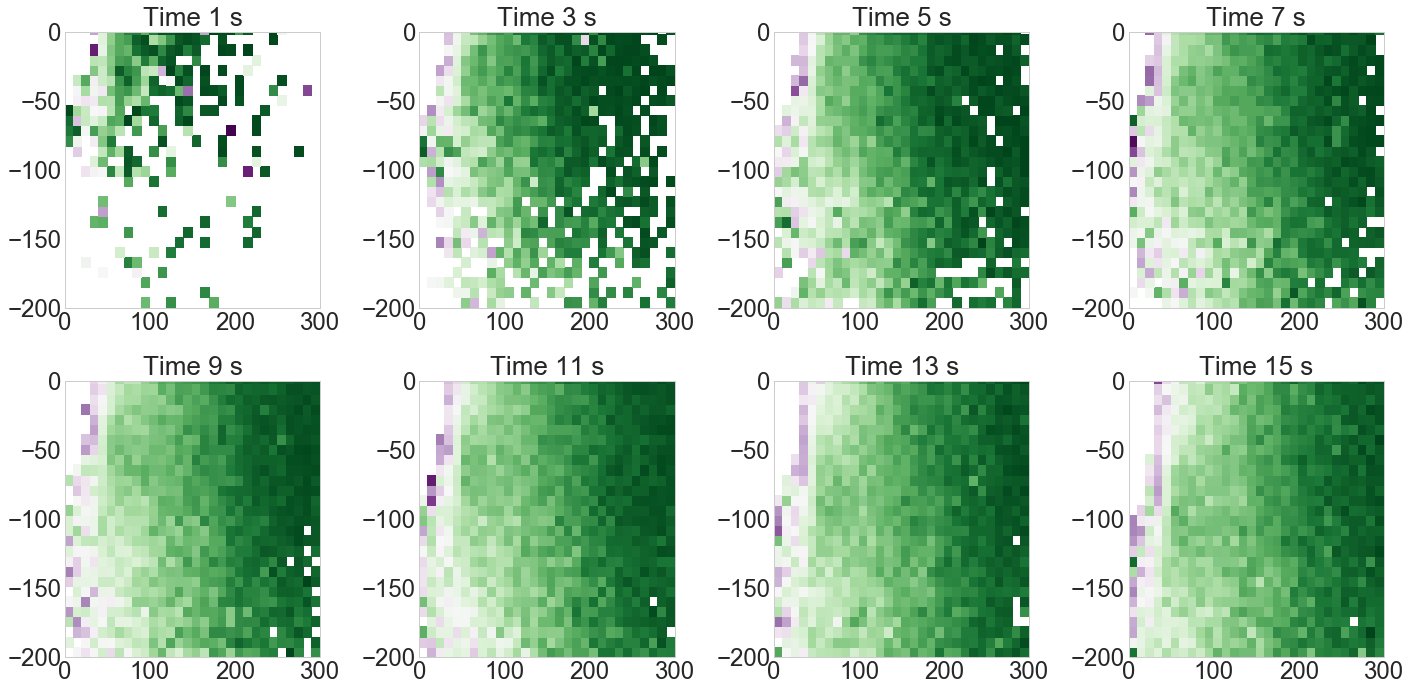

In [37]:
# over time in subplots
# versus R and Z
plt.set_cmap('PRGn')
plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,2),start=1):

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    branched_actin_bound_ends_no_index=branched_actin_bound_ends.reset_index()

    branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

#     times_per_timept=len(sorted(list(set(new_actin_pos_time.Test_time))))

    # set position

#     x_plus_time = branched_actin_bound_ends_time.plus_xpos_recalibrated*1000
    
    x = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000

    y = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)
    
    color = branched_actin_bound_ends_time.radial_orientation

#     z_dir_plus_degrees_time = np.degrees(np.arccos(branched_actin_bound_ends_time.zdir))
    bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
      bins=30, statistic='mean', range = [[0,300],[-200,20]])
    bin_means = np.flipud(np.rot90(bin_means))

    # bin_means = bin_means/len(runs)/len(times)

#     plt.pcolormesh(xedges, yedges, bin_means)
#     r_dir_plus_hist,xs,ys=np.histogram2d(r_plus_time,radial_orientation_time,bins=[30,22],range=[[0, 200],[-1, 1]])
#     z_dir_plus_hist,xs,ys=np.histogram2d(z_dir_plus_time_flip90,z_plus_time,bins=[30,22],range=[[-90, 90],[-200, 20]])


#     r_dir_plus_hist = np.flipud(np.rot90(r_dir_plus_hist))
    
#     scale by nb runs and time in time bind
#     r_dir_plus_hist = r_dir_plus_hist/len(runs)/times_per_timept
    
    plt.subplot(2, 4, i)
    plt.pcolormesh(xedges, yedges, bin_means)  
#     plt.pcolormesh(xs, ys, r_dir_plus_hist)
    
#     plt.xlim([0, 250])
    
#     plt.xlabel('R')
#     plt.ylabel('radial orientation')
#     plt.clim([0, 0.6])
    
#     cb = plt.colorbar(label = 'ends')
    plt.title('Time ' + str(timept) + ' s', fontsize=26)
    
#     plt.yticks([-90, -45, 0, 45, 90])
    
    plt.xticks(size=24)
    plt.yticks(size=24)
    plt.clim([-1,1])
    plt.ylim([-200,0])
    plt.tight_layout()
    
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_radial_orientation_time_RZ_subplots.png')
    plt.savefig('../figures/'+pref+'_radial_orientation_time_RZ_subplots.pdf')
    


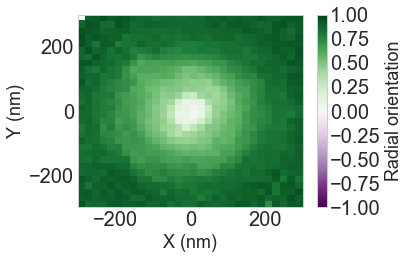

In [51]:
# radial orientation vs XY

plt.cm.get_cmap('PiYG')
# plt.set_cmap('PiYG')
plt.set_cmap('PRGn')



x = branched_actin_bound_ends.plus_xpos_recalibrated*1000
    
y = (branched_actin_bound_ends.plus_ypos_recalibrated)*(1000)

color = branched_actin_bound_ends['radial_orientation']
# x = hip1r_bound_ends_attachment['bending_energy']

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='mean', range = [[-300,300],[-300,300]])
bin_means = np.flipud(np.rot90(bin_means))

# bin_means = bin_means/len(runs)/len(times)

plt.pcolormesh(xedges, yedges, bin_means)

plt.colorbar(label = 'Radial orientation')
plt.clim([-1,1])
plt.xlabel('X (nm)')
plt.ylabel('Y (nm)')
# plt.ylim([-200,0])
plt.tight_layout()
if(save_figures=='yes'):

    plt.savefig('../figures/'+pref+'_radial_orientation_XY.pdf')
    plt.savefig('../figures/'+pref+'_radial_orientation_XY.png')

In [ ]:
# radial orientation  xy over time

## position of barbed end w.r.t to neck versus membrane

In [ ]:
# bud is 45 nm in radius, with neck 30 nm radius.

# hip1r ends 9 nm above the center of the sphere. 

# reasonable demarcation between bud and neck is 10 nm above sphere (recalibrated bud z position).

# the neck is 30 nm radius, so a point <35 nm from r=0 and >10 nm above z=0 (both recalibrated) is near the neck

# z ≤ 5 nm is near the base of pit.

# e.g. within 5 nm

# identify location of bud, neck using recalibrated and absolute value.


# add plus ends base neck True/False boolean colun as in parameter sweep analysis

In [52]:
# metric for how close to neck or base, in micron

close_metric = 0.0075

plus_ends_base = branched_actin_bound_ends.loc[branched_actin_bound_ends['plus_zpos']+0.4<close_metric]
plus_ends_neck = branched_actin_bound_ends.loc[branched_actin_bound_ends['plus_rpos_recalibrated']<(0.03+close_metric)].loc[branched_actin_bound_ends['plus_zpos_recalibrated']<0.010]

growing_ends_base = branched_actin_bound_ends.loc[branched_actin_bound_ends['plus_state']==1].loc[branched_actin_bound_ends['plus_zpos']+0.4<close_metric]
growing_ends_neck = branched_actin_bound_ends.loc[branched_actin_bound_ends['plus_state']==1].loc[branched_actin_bound_ends['plus_rpos_recalibrated']<(0.03+close_metric)].loc[branched_actin_bound_ends['plus_zpos_recalibrated']<0.010]

def get_mean_count_time(data_frame):
# merge with solid to get remaing timepoints (which will count as 0)

    merged = pd.merge(solid_positions, data_frame, on=['run','time'], how = 'outer')

    # use pivot table to identify number of columns in the ends dataframe. other runs, timepoints will be 0

    data_frame_time_count = merged.pivot_table(index=['run', 'time'], values='plus_rpos', fill_value=0, dropna = False, aggfunc='count')

    # mean std grouped by time

    mean_nb_vs_time=data_frame_time_count.groupby('time').mean().iloc[:,0]
    std_nb_vs_time=data_frame_time_count.groupby('time').std().iloc[:,0]
    
    return [mean_nb_vs_time, std_nb_vs_time]

# def get_mean_count_time(data_frame):

#     # get size of dataframe; i.e. number of ends that satisfy above criteria

#     data_frame_time_count = data_frame.groupby(['run', 'time']).size()

#     # mean std grouped by time

#     mean_nb_vs_time=pd.DataFrame(data_frame_time_count).groupby('time').mean().iloc[:,0]
#     std_nb_vs_time=pd.DataFrame(data_frame_time_count).groupby('time').std().iloc[:,0]
    
#     return [mean_nb_vs_time, std_nb_vs_time]
    

[plus_ends_base_time_mean, plus_ends_base_time_std] = get_mean_count_time(plus_ends_base)
[plus_ends_neck_time_mean, plus_ends_neck_time_std] = get_mean_count_time(plus_ends_neck)

[growing_ends_base_time_mean, growing_ends_base_time_std] = get_mean_count_time(growing_ends_base)
[growing_ends_neck_time_mean, growing_ends_neck_time_std] = get_mean_count_time(growing_ends_neck)



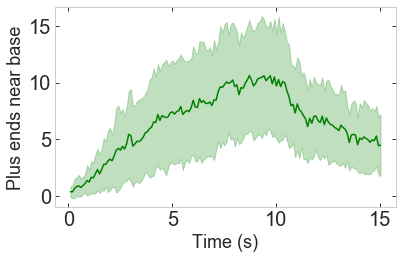

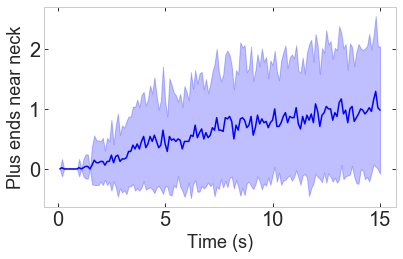

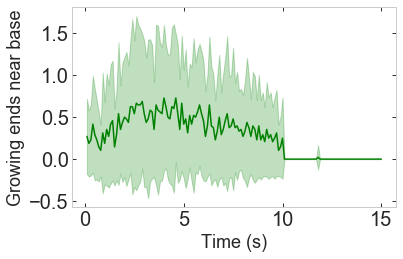

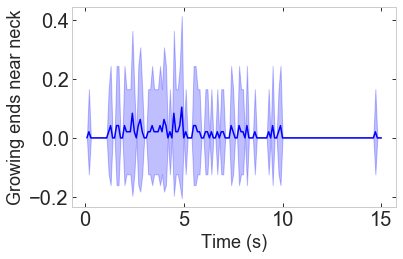

In [53]:
# means_time = mean_nb_ends_time.iloc[:,0]
# stds_time  = std_nb_ends_time.iloc[:,0]



    
plot_errorbar(plus_ends_base_time_mean, plus_ends_base_time_std, 'green', 'Plus ends near base')   
plot_errorbar(plus_ends_neck_time_mean, plus_ends_neck_time_std, 'blue', 'Plus ends near neck')

plot_errorbar(growing_ends_base_time_mean, growing_ends_base_time_std, 'green', 'Growing ends near base')   
plot_errorbar(growing_ends_neck_time_mean, growing_ends_neck_time_std, 'blue', 'Growing ends near neck')



if('save_figures'=='yes'):
    plt.savefig('../figures/'+pref+'_ends_near_base_neck_vs_time.png')
    plt.savefig('../figures/'+pref+'_ends_near_base_neck_vs_time.pdf')

plt.show()

In [9]:
# save barbed end number over time

# plus_ends_base_time_mean.to_pickle('barbed_ends_time_mean.pkl')
# plus_ends_base_time_std.to_pickle('barbed_ends_time_std.pkl')



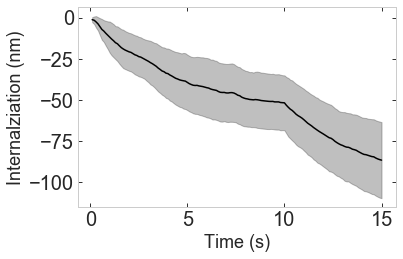

In [54]:
mean_intern = (solid_positions['internalization'].groupby('time').mean()*1000)
std_intern = (solid_positions['internalization'].groupby('time').std()*1000)

plot_errorbar(-mean_intern, std_intern, 'Black', 'Internalziation (nm)')
plt.savefig('../figures/'+pref+'_internalization_time.pdf')
plt.savefig('../figures/'+pref+'_internalization_time.png')

# mean_intern.to_pickle('internalization_time_mean.pkl')
# std_intern.to_pickle('internalization_time_std.pkl')



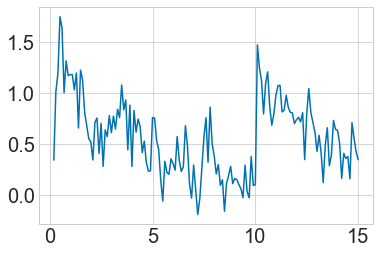

In [36]:
plt.plot(mean_intern.diff())

Text(0.5,0,'Time (s)')

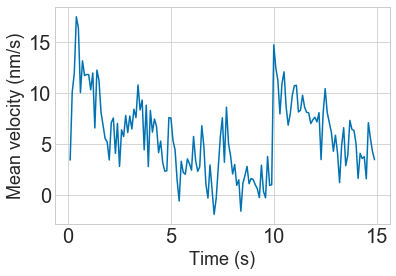

In [113]:
timestep = 0.1 # s
diffs = np.diff(mean_intern,n=1)/timestep
times = np.arange(0.1,15,0.1)
plt.plot(times,diffs)

plt.ylabel('Mean velocity (nm/s)')
plt.xlabel('Time (s)')


In [ ]:
# why errorbars large? maybe because almost always zero? Or is it averaging too many?


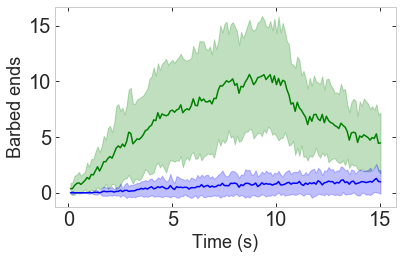

In [56]:
plt.figure(figsize=(6,4))
plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

means1 = plus_ends_base_time_mean
stds1  = plus_ends_base_time_std   

means2 = plus_ends_neck_time_mean
stds2  = plus_ends_neck_time_std

color='green'

plt.plot(means1.index,means1, c=color)
times_cur = means1.index
yminus=means1-stds1
yplus=means1+stds1

plt.fill_between(times_cur, np.asarray(yminus), np.asarray(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 

color='blue'

plt.plot(means2.index,means2, c=color)
times_cur = means2.index
yminus=means2-stds2
yplus=means2+stds2

plt.fill_between(times_cur, np.asarray(yminus), np.asarray(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 



plt.xlabel('Time (s)')
plt.ylabel('Barbed ends')

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)

plt.tight_layout()


if(save_figures =='yes'):
    plt.savefig('../figures/'+pref+'_ends_near_base_neck_vs_time_7pt5nm.png')
    plt.savefig('../figures/'+pref+'_ends_near_base_neck_vs_time_7pt5nm.pdf')

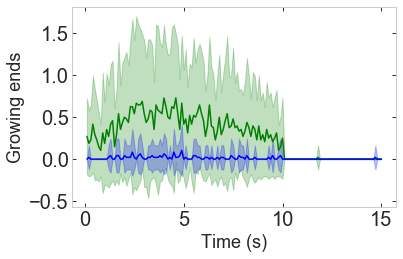

In [57]:
# growing ends

plt.figure(figsize=(6,4))
plt.rc('font', size=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

means1 = growing_ends_base_time_mean
stds1  = growing_ends_base_time_std   

means2 = growing_ends_neck_time_mean
stds2  = growing_ends_neck_time_std

color='green'

plt.plot(means1.index,means1, c=color)
times_cur = means1.index
yminus=means1-stds1
yplus=means1+stds1

plt.fill_between(times_cur, np.asarray(yminus), np.asarray(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 

color='blue'

plt.plot(means2.index,means2, c=color)
times_cur = means2.index
yminus=means2-stds2
yplus=means2+stds2

plt.fill_between(times_cur, np.asarray(yminus), np.asarray(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 



plt.xlabel('Time (s)')
plt.ylabel('Growing ends')

plt.tick_params(reset=True, color='black', direction='in', length=4)
plt.grid(False)

plt.tight_layout()


if(save_figures =='yes'):
    plt.savefig('../figures/'+pref+'_growing_ends_near_base_neck_vs_time_7pt5nm.png')
    plt.savefig('../figures/'+pref+'_growing_ends_near_base_neck_vs_time_7pt5nm.pdf')

In [ ]:
# position of actin model point w.r.t neck versus membrane

# total actin coverage near neck.



## calculate and plot bending angles.

In [58]:
# direct bound filaments only

# merging with "how = inner" will remove the indirect bound filaments because thier fiber ids are not represeted in final_hip1r_bound

hip1r_bound_ends_attachment = pd.merge(branched_actin_bound_ends,final_bound_hip1r, how='inner', on = ['run', 'time', 'fiber_id'])

hip1r_bound_ends_attachment = hip1r_bound_ends_attachment.drop(columns = ['bud_xpos_x',
                                                                                   'bud_ypos_x', 'bud_zpos_x', 'bud_internalization_x'])

hip1r_bound_ends_attachment = hip1r_bound_ends_attachment.rename(
    index=str, columns={'bud_xpos_y':'bud_xpos','bud_ypos_y':'bud_ypos',
                        'bud_zpos_y':'bud_zpos',
                        'bud_internalization_y':'bud_internalization'})
hip1r_bound_ends_attachment.head()

run  time  fiber_id   length  minus_state  minus_xpos  minus_ypos  \
0  run0000_0022   0.3        23  0.08606            0     0.03616     0.02024   
1  run0000_0022   0.3        24  0.09324            0     0.03482     0.05937   
2  run0000_0022   0.4        23  0.11410            0     0.03181     0.01409   
3  run0000_0022   0.4        24  0.14312            0     0.03745     0.04078   
4  run0000_0022   0.5        23  0.11410            0     0.03390     0.01777   

   minus_zpos  minus_xdir  minus_ydir           ...             \
0    -0.37866     0.22044    -0.84229           ...              
1    -0.40098    -0.91457    -0.32519           ...              
2    -0.37308     0.45689    -0.58080           ...              
3    -0.38023    -0.98691     0.05791           ...              
4    -0.38462     0.20836    -0.94605           ...              

   attachment_zdir  hip1r_force_magnitude  hip1r_rpos  bud_xpos  bud_ypos  \
0        -0.173684             306.849524    0.041352 -0.002737  0.002325   
1         0.293016             234.945506    0.044052 -0.002737  0.002325   
2         0.305404             717.742601    0.042432 -0.003827 -0.000567   
3        -0.221535            1118.240992    0.045405 -0.003827 -0.000567   
4        -0.061403            1308.634042    0.043334 -0.005189 -0.001322   

   bud_zpos  bud_internalization  hip1r_xpos_recalibrated  \
0 -0.400167            -0.000167                 0.035673   
1 -0.400167            -0.000167                -0.021861   
2 -0.397162             0.002838                 0.027379   
3 -0.397162             0.002838                -0.037498   
4 -0.397204             0.002796                 0.022773   

   hip1r_ypos_recalibrated  hip1r_zpos_recalibrated  
0                -0.027329                 0.002360  
1                 0.034220                 0.019392  
2                -0.034729                 0.008322  
3                 0.019378                 0.015601  
4                -0.038284                 0.006384  

[5 rows x 51 columns]

In [ ]:
# implement dot product for 3 component vector with long list using np.dot()

In [172]:
# slow way to do it
# dots = [np.dot([x_dir_plus[i],y_dir_plus[i],z_dir_plus[i]] , [x_dir_final_attachment[i],y_dir_final_attachment[i],z_dir_final_attachment[i]]) for i, vec in enumerate(x_dir_plus)]
# dots

In [59]:

# orientation plus end
x_dir_plus = hip1r_bound_ends_attachment.plus_xdir
y_dir_plus = hip1r_bound_ends_attachment.plus_ydir
z_dir_plus = hip1r_bound_ends_attachment.plus_zdir

xyz_dir_plus = np.array([[x_dir_plus], [y_dir_plus], [z_dir_plus]])


z_dir_plus_rad = np.arccos(z_dir_plus)
z_dir_plus_rad_flip90 = -(z_dir_plus_rad-(np.pi)/2)

# length filament

filament_length = np.array(hip1r_bound_ends_attachment.length)

# x_dir_plus_time = branched_actin_bound_ends_time_outside_bud.plus_xdir
# y_dir_plus_time = branched_actin_bound_ends_time_outside_bud.plus_ydir
# z_dir_plus_time = branched_actin_bound_ends_time_outside_bud.plus_zdir


# from hip1r-last-attachment
# final_bound_hip1r

# orientation last attachment

x_dir_final_attachment = hip1r_bound_ends_attachment.attachment_xdir
y_dir_final_attachment = hip1r_bound_ends_attachment.attachment_ydir
z_dir_final_attachment = hip1r_bound_ends_attachment.attachment_zdir

xyz_dir_final_attachment = np.array([[x_dir_final_attachment], [y_dir_final_attachment], [z_dir_final_attachment]])

# abscissa last attachment


abscissa = np.array(hip1r_bound_ends_attachment.abscissa)

# plt.hist(filament_length)

length_to_plus_end = filament_length-abscissa

# plt.hist(length_to_plus_end)

hip1r_bound_ends_attachment['length_to_plus_end'] = length_to_plus_end

# formula is:

# length to plus end is length minus abscissa(hip1r-last-point), right?
# dot product orientation attachment and plus end

# dot_product_attachment_plus_end = np.dot(xyz_dir_final_attachment, xyz_dir_plus)

# slow way to do it
dot_product_attachment_plus_end = [np.dot([x_dir_plus[i],y_dir_plus[i],z_dir_plus[i]] , [x_dir_final_attachment[i],y_dir_final_attachment[i],z_dir_final_attachment[i]]) for i, vec in enumerate(x_dir_plus)]

# fast way, matrix type dot product?

# dot_product_attachment_plus_end = np.multiply(x_dir_final_attachment, x_dir_plus) + np.multiply(y_dir_final_attachment,y_dir_plus) + np.multiply(z_dir_final_attachment, z_dir_plus)



# round dot product to 3 decimals to avoid rounding errors and values a tiny bit >1

bending_angle_radian = np.arccos(np.around(dot_product_attachment_plus_end,3))

bending_angle_degrees = np.degrees(np.arccos(np.around(dot_product_attachment_plus_end,3)))

hip1r_bound_ends_attachment['bending_angle_degrees'] = bending_angle_degrees

# hip1r_bound_ends_attachment

# plt.scatter(hip1r_bound_ends_attachment.length_to_plus_end, hip1r_bound_ends_attachment.bending_angle_degrees)

kT = 0.00414 #pN um
Lp = 10 # um, calculate this from properties when it varies.

# calculate bending energy:
# Lp.*thetas.*thetas*kT/(2*s)
# convert to pN nm rather than pN um

bending_energy=kT*Lp*pow(bending_angle_radian,2)/(2*length_to_plus_end)*1000

hip1r_bound_ends_attachment['bending_energy'] = bending_energy
hip1r_bound_ends_attachment.head()
# all of these filaments,


run  time  fiber_id   length  minus_state  minus_xpos  minus_ypos  \
0  run0000_0022   0.3        23  0.08606            0     0.03616     0.02024   
1  run0000_0022   0.3        24  0.09324            0     0.03482     0.05937   
2  run0000_0022   0.4        23  0.11410            0     0.03181     0.01409   
3  run0000_0022   0.4        24  0.14312            0     0.03745     0.04078   
4  run0000_0022   0.5        23  0.11410            0     0.03390     0.01777   

   minus_zpos  minus_xdir  minus_ydir       ...        bud_xpos  bud_ypos  \
0    -0.37866     0.22044    -0.84229       ...       -0.002737  0.002325   
1    -0.40098    -0.91457    -0.32519       ...       -0.002737  0.002325   
2    -0.37308     0.45689    -0.58080       ...       -0.003827 -0.000567   
3    -0.38023    -0.98691     0.05791       ...       -0.003827 -0.000567   
4    -0.38462     0.20836    -0.94605       ...       -0.005189 -0.001322   

   bud_zpos  bud_internalization  hip1r_xpos_recalibrated  \
0 -0.400167            -0.000167                 0.035673   
1 -0.400167            -0.000167                -0.021861   
2 -0.397162             0.002838                 0.027379   
3 -0.397162             0.002838                -0.037498   
4 -0.397204             0.002796                 0.022773   

   hip1r_ypos_recalibrated  hip1r_zpos_recalibrated  length_to_plus_end  \
0                -0.027329                 0.002360            0.034851   
1                 0.034220                 0.019392            0.026602   
2                -0.034729                 0.008322            0.051267   
3                 0.019378                 0.015601            0.056699   
4                -0.038284                 0.006384            0.045902   

   bending_angle_degrees  bending_energy  
0               8.109614       11.898960  
1               2.562559        1.556563  
2               2.562559        0.807665  
3               0.000000        0.000000  
4               3.624307        1.804433  

[5 rows x 54 columns]

time 1
time 2
time 3
time 4
time 5
time 6
time 7
time 8
time 9
time 10
time 11
time 12
time 13
time 14
time 15


<Figure size 432x288 with 0 Axes>

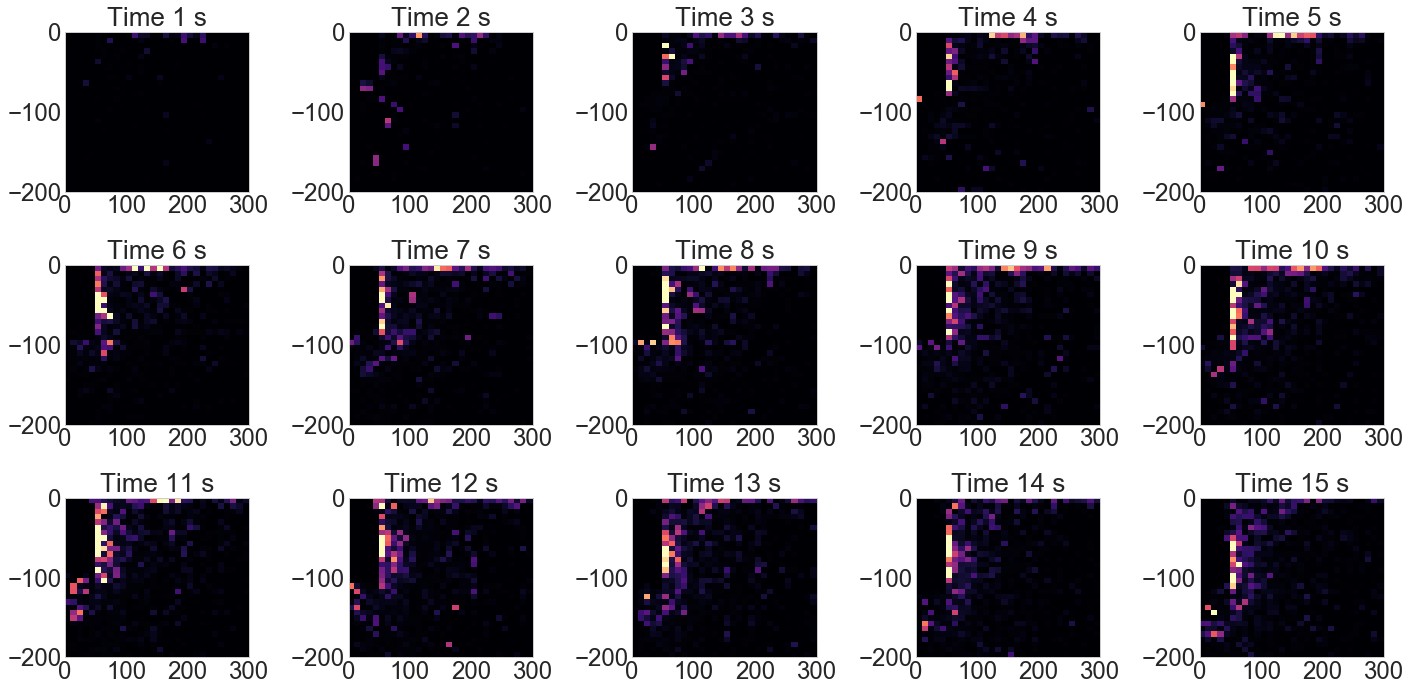

In [64]:
# over time

# versus R and Z
plt.set_cmap('magma')
# filter by length of free filament

free_length_threshold = 0.00

outside_bud = 'yes'

plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,1),start=1):

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
    ends_time = hip1r_bound_ends_attachment.loc[hip1r_bound_ends_attachment['length_to_plus_end']>free_length_threshold]
    
    ends_time = ends_time.reset_index()
    if outside_bud=='yes':
        in_bud_idx =ends_time.loc[ends_time['plus_rpos_recalibrated']<0.05].loc[ends_time['plus_zpos_recalibrated']>-0.05].loc[ends_time['plus_zpos_recalibrated']<0.05].index
        ends_time = ends_time.drop(in_bud_idx)
#         ends_time = ends_time.loc[in_bud_idx]


    branched_actin_bound_ends_no_index=ends_time.reset_index()

    branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

  # set position
    
    x = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000

    y = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)
    
    color = branched_actin_bound_ends_time['bending_energy']

    bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, bins=30, statistic='sum', range = [[0,300],[-200,0]])
    bin_means = np.flipud(np.rot90(bin_means))

    bin_means = bin_means/len(runs)/len(times)
    
    plt.subplot(3, 5, i)
    plt.pcolormesh(xedges, yedges, bin_means)


    
#     cb = plt.colorbar(label = 'Bending energy (pN nm)')
    plt.title('Time ' + str(timept) + ' s', fontsize=26)
    plt.clim([0, 0.2])
#     plt.yticks([-90, -45, 0, 45, 90])
    
    plt.xticks(size=24)
    plt.yticks(size=24)
    
#     plt.xlim([0,100])
#     plt.ylim([-120, 0])

    plt.tight_layout()
    
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_bending_energy_direct_RZ.png')
    plt.savefig('../figures/'+pref+'_bending_energy_direct_RZr.pdf')
    


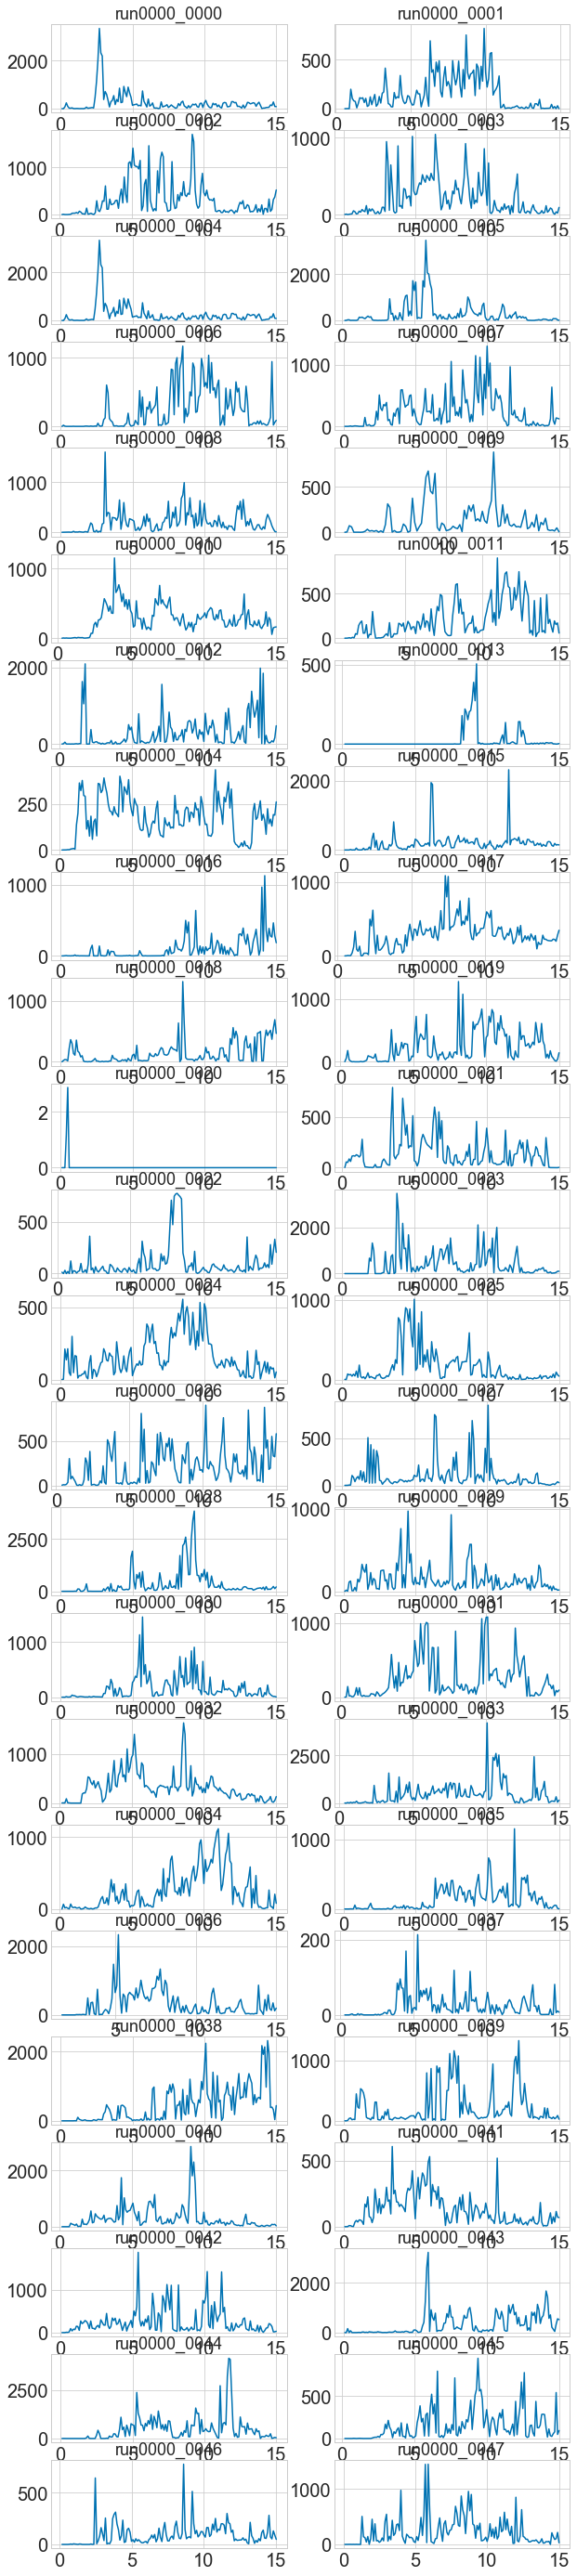

In [63]:
# just the filaments near the base

base_filaments = hip1r_bound_ends_attachment.loc[(hip1r_bound_ends_attachment['plus_zpos']+0.4)<0.075]

# sum_bending_energy_run_time = base_filaments.pivot_table(index=['run', 'time'], values='bending_energy', fill_value=0, dropna = False, aggfunc='sum')
# mean std grouped by time
plt.figure(figsize=(10,50))
# show it come s out same
base_filaments = base_filaments.set_index(['run','time'])
for i, r in enumerate(runs):
    filaments_run = base_filaments.loc[r]
    mf = filaments_run.groupby('time').sum().bending_energy
    plt.subplot(24,2,i+1)
    plt.plot(mf)
    plt.title(str(r))

# mean_bending_energy_vs_time=sum_bending_energy_run_time.groupby('time').mean().iloc[:,0]
# std_bending_energy_vs_time=sum_bending_energy_run_time.groupby('time').std().iloc[:,0]

# plot_errorbar(mean_bending_energy_vs_time, std_bending_energy_vs_time, 'black', 'Bending energy (pN nm)')   

# plt.plot(mean_bending_energy_vs_time)

if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_bending_energy_all_plots_direct_near_base.png')
    plt.savefig('../figures/'+pref+'_bending_energy_all_plots_direct_near_base.pdf')
                                                 
                                                 

In [44]:
# calculate internalization energy 1/2 kx^2 in pN nm

spring_constant = 0.15 #pN/ nm
solid_positions['internalization_energy'] = 0.5*spring_constant*solid_positions['internalization']*solid_positions['internalization']*1e6
solid_positions.tail()

xpos      ypos      zpos  internalization  \
run          time id                                                  
run0000_0004 14.6 1   0.017155 -0.002826 -0.315328         0.084672   
             14.7 1   0.016349 -0.002537 -0.315903         0.084097   
             14.8 1   0.015354 -0.003032 -0.317181         0.082819   
             14.9 1   0.015673 -0.003960 -0.316657         0.083343   
             15.0 1   0.014814 -0.002745 -0.316774         0.083226   

                      internalization_energy  
run          time id                          
run0000_0004 14.6 1               537.701069  
             14.7 1               530.422906  
             14.8 1               514.424007  
             14.9 1               520.954174  
             15.0 1               519.492531

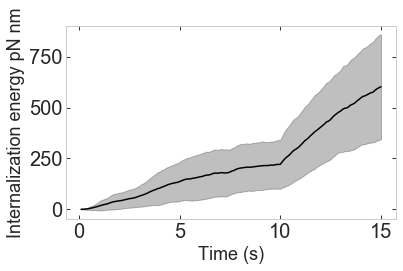

In [45]:
# sum_bending_energy_run_time.groupby('time').mean().iloc[:,0]

# this is only valid fi the spring constant doesn't change durig the simulation.

mean_intern_energy = solid_positions.groupby(level=['time']).mean().internalization_energy
std_intern_energy =  solid_positions.groupby(level=['time']).std().internalization_energy

plot_errorbar(mean_intern_energy, std_intern_energy, 'black', 'Internalization energy pN nm')

In [ ]:
# plot of polymerization energy over time

In [65]:


sum_bending_energy_run_time = hip1r_bound_ends_attachment.pivot_table(index=['run', 'time'], values='bending_energy', fill_value=0, dropna = False, aggfunc='sum')
# mean std grouped by time

mean_bending_energy_vs_time=sum_bending_energy_run_time.groupby('time').mean().iloc[:,0]
std_bending_energy_vs_time=sum_bending_energy_run_time.groupby('time').std().iloc[:,0]

mean_bending_energy_vs_time

time
0.1       0.099903
0.2       1.622619
0.3      16.624000
0.4      24.646123
0.5      29.405538
0.6      13.305370
0.7      23.604947
0.8      32.391175
0.9      37.978140
1.0      36.431675
1.1      43.846572
1.2      62.699029
1.3      64.433173
1.4      55.524611
1.5      60.171794
1.6      97.327822
1.7      85.385447
1.8     124.262505
1.9      72.136977
2.0     108.632531
2.1     116.133324
2.2     134.360855
2.3      83.679205
2.4     110.409377
2.5     142.664555
2.6     167.955175
2.7     230.689183
2.8     174.681680
2.9     194.829908
3.0     165.417854
           ...    
12.1    420.522178
12.2    439.062504
12.3    404.021222
12.4    424.055538
12.5    424.497231
12.6    379.833865
12.7    418.883472
12.8    465.863035
12.9    346.994291
13.0    376.451693
13.1    414.338175
13.2    331.456619
13.3    395.870088
13.4    342.477251
13.5    400.256370
13.6    458.480133
13.7    443.047881
13.8    398.185031
13.9    418.597287
14.0    352.219498
14.1    363.304513
14.2   

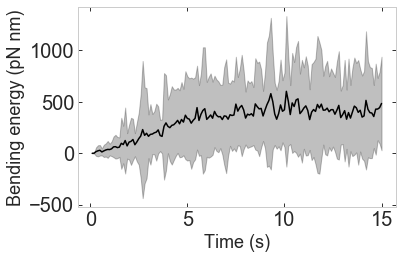

In [66]:
# plot
plot_errorbar(mean_bending_energy_vs_time, std_bending_energy_vs_time, 'black', 'Bending energy (pN nm)')   

if('save_figures'=='yes'):
    plt.savefig('../figures/'+pref+'_bending_energy_vs_time.png')
    plt.savefig('../figures/'+pref+'_bending_energy_vs_time.pdf')
    
plt.show()

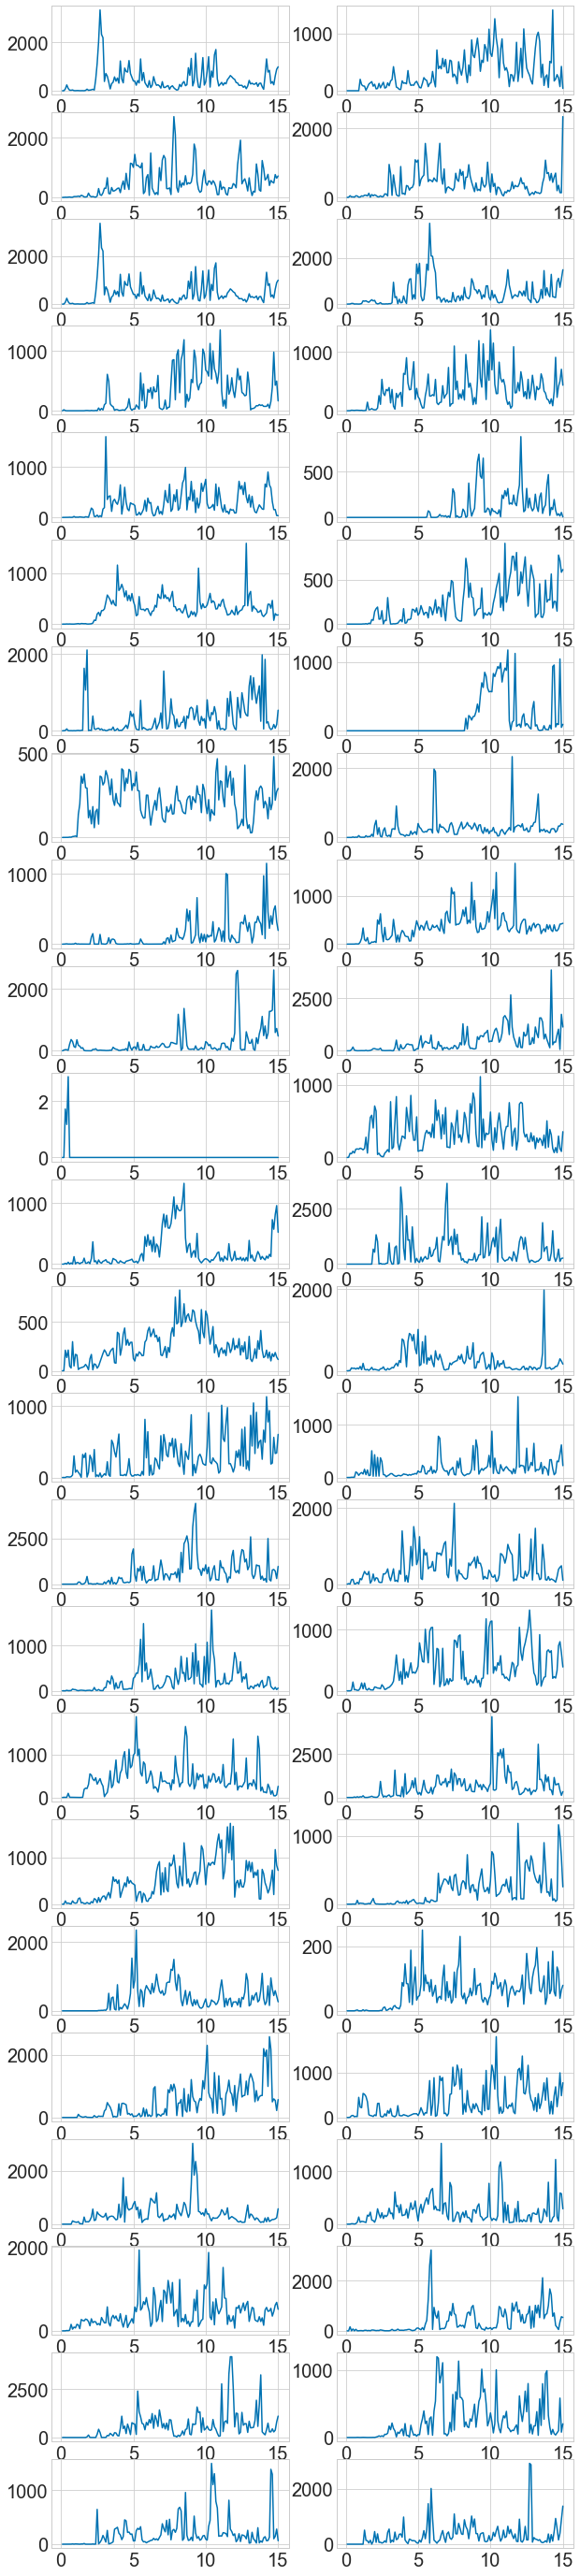

In [68]:
plt.figure(figsize=(10,50))
for i, runn in enumerate(runs):
    sum_bending_energy_time_one_run = sum_bending_energy_run_time.loc[runn]
    plt.subplot(24,2,i+1)
    plt.plot(sum_bending_energy_time_one_run.bending_energy)
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_bending_energy_all_plots_direct.png')
    plt.savefig('../figures/'+pref+'_bending_energy_all_plots_direct.pdf')
     
# plt.ylim(0, 300)

In [ ]:
# # code from max:
# x = all_fiber_forces.loc[run]['rpos']*1000
# y = (all_fiber_forces.loc[run]['zpos']+0.4)*-1000
# color = all_fiber_forces.loc[run].reset_index()['time']

# x = df['plus_rpos']*1000
# y = (df['plus_zpos']+0.4)*-1000
# color = df['growth']*10000

# denominator, xedges, yedges = np.histogram2d(x,y,bins=[200, 100])

# bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
#   bins=30, statistic='mean', range = [[0,500],[-500,0]])
# bin_means = np.flipud(np.rot90(bin_means))

# plt.pcolormesh(xedges, yedges, bin_means)

# hip1r_bound_ends_attachment['bending_energy']

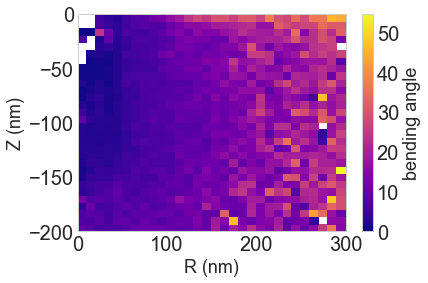

In [69]:
plt.set_cmap('plasma')

# versus R: sum bending energy in heat map
from scipy.stats import binned_statistic_2d

x = hip1r_bound_ends_attachment['plus_rpos_recalibrated']*1000
y = (hip1r_bound_ends_attachment['plus_zpos']+0.4)*(-1000)

color = hip1r_bound_ends_attachment['bending_angle_degrees']
# x = hip1r_bound_ends_attachment['bending_energy']

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='mean', range = [[0,300],[-200,0]])
bin_means = np.flipud(np.rot90(bin_means))

plt.pcolormesh(xedges, yedges, bin_means)

plt.colorbar(label='bending angle')
plt.xlabel('R (nm)')
plt.ylabel('Z (nm)')

plt.ylim([-200, 0])


plt.savefig('../figures/'+pref+'bending_angle_vs_RZ.pdf')

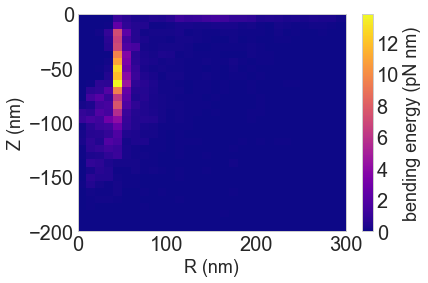

In [70]:
# versus R: sum bending energy in heat map
from scipy.stats import binned_statistic_2d

x = hip1r_bound_ends_attachment['plus_rpos_recalibrated']*1000
y = (hip1r_bound_ends_attachment['plus_zpos']+0.4)*(-1000)

color = hip1r_bound_ends_attachment['bending_energy']
# x = hip1r_bound_ends_attachment['bending_energy']

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='sum', range = [[0,300],[-200,0]])
bin_means = np.flipud(np.rot90(bin_means))

bin_means = bin_means/len(runs)/len(times)

plt.pcolormesh(xedges, yedges, bin_means)

plt.colorbar(label='bending energy (pN nm)')
plt.xlabel('R (nm)')
plt.ylabel('Z (nm)')

plt.ylim([-200,0])


plt.savefig('../figures/'+pref+'bending_energy_vs_RZ.pdf')

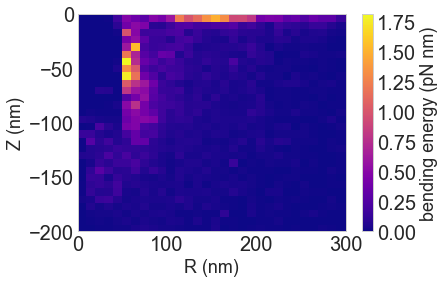

In [71]:
# versus R: sum bending energy in heat map
from scipy.stats import binned_statistic_2d

# choose plus ends not embedded in bud

outside_bud = 'yes'

ends_no_index = hip1r_bound_ends_attachment.reset_index()
if outside_bud=='yes':
#         ends_time = ends_time.loc[ends_time['plus_rpos_recalibrated'>0.03]].loc[(ends_time['plus_zpos_recalibrated']+0.04)]
    in_bud_idx =ends_no_index.loc[ends_no_index['plus_rpos_recalibrated']<0.055].loc[ends_no_index['plus_zpos_recalibrated']>-0.055].loc[ends_no_index['plus_zpos_recalibrated']<0.055].index
    ends_no_index = ends_no_index.drop(in_bud_idx)

x = ends_no_index['plus_rpos_recalibrated']*1000
y = (ends_no_index['plus_zpos']+0.4)*(-1000)

color = ends_no_index['bending_energy']
# x = hip1r_bound_ends_attachment['bending_energy']

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='sum', range = [[0,300],[-200,0]])
bin_means = np.flipud(np.rot90(bin_means))

bin_means = bin_means/len(runs)/len(times)

plt.pcolormesh(xedges, yedges, bin_means)

plt.colorbar(label='bending energy (pN nm)')
plt.xlabel('R (nm)')
plt.ylabel('Z (nm)')

plt.ylim([-200,0])


plt.savefig('../figures/'+pref+'bending_energy_vs_RZ_outside_bud_only.pdf')

In [ ]:
# only filaments with plus end outside bud (rel z and r>bud dimensions)

In [ ]:
# only filaments with lengh>5 subunits (13.75)

In [ ]:
# of capped filaments versus growing filaments.

In [72]:
# merge ends and final_hip1r, include indirect 

branched_actin_bound_ends_attachment = pd.merge(branched_actin_bound_ends,final_bound_hip1r, how='outer', on = ['run', 'time', 'fiber_id'])

branched_actin_bound_ends_attachment = branched_actin_bound_ends_attachment.drop(columns = ['bud_xpos_x',
                                                                                   'bud_ypos_x', 'bud_zpos_x', 'bud_internalization_x'])

branched_actin_bound_ends_attachment = branched_actin_bound_ends_attachment.rename(
    index=str, columns={'bud_xpos_y':'bud_xpos','bud_ypos_y':'bud_ypos',
                        'bud_zpos_y':'bud_zpos',
                        'bud_internalization_y':'bud_internalization'})

# filter ONLY the indirect bound filaments, which do not have hip1r info 

indirect_bound_ends_attachment = branched_actin_bound_ends_attachment.loc[branched_actin_bound_ends_attachment['attachment_zdir'].isna()]

# orientation plus end
x_dir_plus = indirect_bound_ends_attachment.plus_xdir
y_dir_plus = indirect_bound_ends_attachment.plus_ydir
z_dir_plus = indirect_bound_ends_attachment.plus_zdir

# length filament

filament_length = indirect_bound_ends_attachment.length

indirect_bound_ends_attachment['length_to_plus_end'] = filament_length 

# orientation MINUS END

x_dir_minus = indirect_bound_ends_attachment.minus_xdir
y_dir_minus = indirect_bound_ends_attachment.minus_ydir
z_dir_minus = indirect_bound_ends_attachment.minus_zdir


# formula is:

# length to plus end 
# dot product orientation attachment and plus end

# dot_product_minus_plus_end = np.multiply(x_dir_minus, x_dir_plus) + np.multiply(y_dir_minus,y_dir_plus) + np.multiply(z_dir_minus, z_dir_plus)

dot_product_minus_plus_end = [np.dot([x_dir_minus[i],y_dir_minus[i],z_dir_minus[i]] , [x_dir_plus[i],y_dir_plus[i],z_dir_plus[i]]) for i, vec in enumerate(x_dir_plus)]



# round dot product to 3 decimals to avoid rounding errors and values a tiny bit >1

bending_angle_radian = np.arccos(np.around(dot_product_minus_plus_end,3))

bending_angle_degrees = np.degrees(np.arccos(np.around(dot_product_minus_plus_end,3)))

indirect_bound_ends_attachment['bending_angle_degrees'] = bending_angle_degrees

kT = 0.00414 #pN um
Lp = 10 # um, calculate this from properties when it varies.

# calculate bending energy:
# Lp.*thetas.*thetas*kT/(2*s)
# convert to pN nm rather than pN um

bending_energy=kT*Lp*pow(bending_angle_radian,2)/(2*filament_length)*1000

indirect_bound_ends_attachment['bending_energy'] = bending_energy
indirect_bound_ends_attachment.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

run  time  fiber_id   length  minus_state  minus_xpos  \
6   run0000_0022   0.5        33  0.03661            0     0.01370   
7   run0000_0022   0.5        34  0.01225            0     0.01701   
11  run0000_0022   0.6        34  0.01225            0     0.01437   
16  run0000_0022   0.7        34  0.01225            0     0.01335   
23  run0000_0022   0.8        36  0.05469            0     0.02430   

    minus_ypos  minus_zpos  minus_xdir  minus_ydir       ...        bud_xpos  \
6     -0.04257    -0.39061    -0.07754    -0.25954       ...             NaN   
7      0.03981    -0.38400    -0.18696    -0.50363       ...             NaN   
11     0.03268    -0.37789    -0.18124     0.16377       ...             NaN   
16     0.03417    -0.37993     0.09600     0.83205       ...             NaN   
23     0.02729    -0.37729    -0.40492     0.12915       ...             NaN   

    bud_ypos  bud_zpos  bud_internalization  hip1r_xpos_recalibrated  \
6        NaN       NaN                  NaN                      NaN   
7        NaN       NaN                  NaN                      NaN   
11       NaN       NaN                  NaN                      NaN   
16       NaN       NaN                  NaN                      NaN   
23       NaN       NaN                  NaN                      NaN   

    hip1r_ypos_recalibrated  hip1r_zpos_recalibrated  length_to_plus_end  \
6                       NaN                      NaN             0.03661   
7                       NaN                      NaN             0.01225   
11                      NaN                      NaN             0.01225   
16                      NaN                      NaN             0.01225   
23                      NaN                      NaN             0.05469   

    bending_angle_degrees  bending_energy  
6                     0.0             0.0  
7                     0.0             0.0  
11                    0.0             0.0  
16                    0.0             0.0  
23                    0.0             0.0  

[5 rows x 54 columns]

In [73]:
# plot indirect bending energy

sum_bending_energy_run_time = indirect_bound_ends_attachment.pivot_table(index=['run', 'time'], values='bending_energy', fill_value=0, dropna = False, aggfunc='sum')
# mean std grouped by time

mean_bending_energy_vs_time=sum_bending_energy_run_time.groupby('time').mean().iloc[:,0]
std_bending_energy_vs_time=sum_bending_energy_run_time.groupby('time').std().iloc[:,0]

mean_bending_energy_vs_time

time
0.1       0.191668
0.2       0.371386
0.3       0.427856
0.4       0.332244
0.5       0.590016
0.6       0.828491
0.7       1.068241
0.8       2.268004
0.9       1.688143
1.0       3.032743
1.1       3.801981
1.2       4.635981
1.3       5.686868
1.4       7.064040
1.5       8.374869
1.6       8.980478
1.7      10.765489
1.8       8.999581
1.9      10.504798
2.0      14.973319
2.1      17.065263
2.2      22.081217
2.3      22.445880
2.4      23.459269
2.5      25.269582
2.6      25.270049
2.7      33.089505
2.8      33.013253
2.9      32.336352
3.0      39.209499
           ...    
12.1    142.057913
12.2    144.995968
12.3    140.477333
12.4    150.087877
12.5    140.972931
12.6    140.974592
12.7    147.222455
12.8    153.439269
12.9    146.530877
13.0    147.608222
13.1    162.144310
13.2    156.519954
13.3    171.502942
13.4    169.089419
13.5    147.514382
13.6    152.731258
13.7    156.735028
13.8    163.216717
13.9    163.304462
14.0    153.285414
14.1    158.948360
14.2   

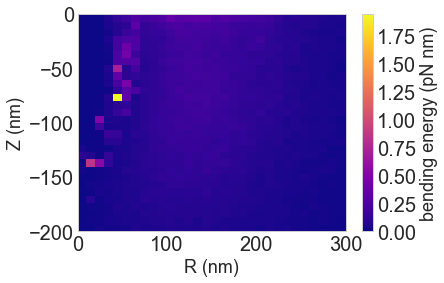

In [74]:
# versus R: sum bending energy in heat map
from scipy.stats import binned_statistic_2d

x = indirect_bound_ends_attachment['plus_rpos_recalibrated']*1000
y = (indirect_bound_ends_attachment['plus_zpos']+0.4)*(-1000)

color = indirect_bound_ends_attachment['bending_energy']
# x = hip1r_bound_ends_attachment['bending_energy']

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='sum', range = [[0,300],[-200,0]])
bin_means = np.flipud(np.rot90(bin_means))

bin_means = bin_means/len(runs)/len(times)

plt.pcolormesh(xedges, yedges, bin_means)

plt.colorbar(label='bending energy (pN nm)')
plt.xlabel('R (nm)')
plt.ylabel('Z (nm)')

plt.ylim([-200,0])


plt.savefig('../figures/'+pref+'bending_energy_indirect_vs_RZ.pdf')

time 1
time 2
time 3
time 4
time 5
time 6
time 7
time 8
time 9
time 10
time 11
time 12
time 13
time 14
time 15


<Figure size 432x288 with 0 Axes>

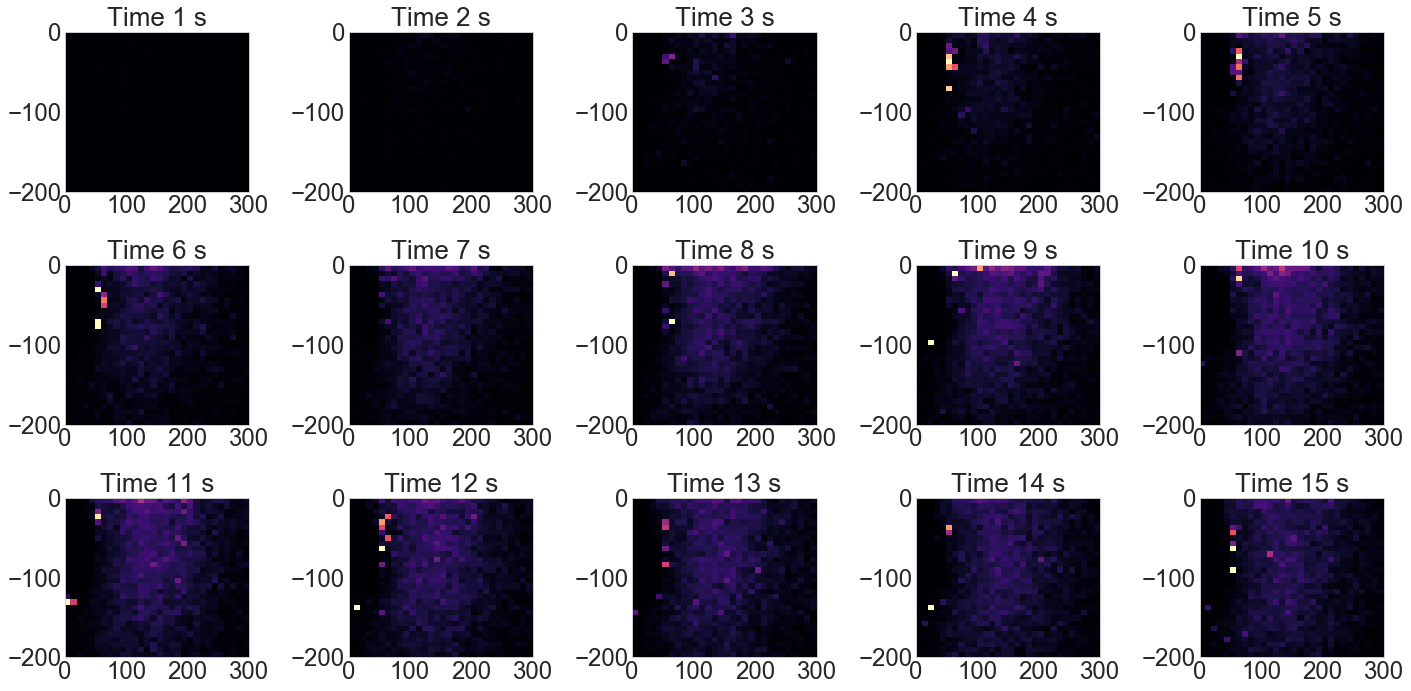

In [75]:
# over time

# versus R and Z
plt.set_cmap('magma')
# filter by length of free filament

free_length_threshold = 0.0

outside_bud = 'yes'

plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,1),start=1):

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
    ends_time = indirect_bound_ends_attachment.loc[indirect_bound_ends_attachment['length_to_plus_end']>free_length_threshold]
    
    ends_time = ends_time.reset_index()
    if outside_bud=='yes':
        in_bud_idx =ends_time.loc[ends_time['plus_rpos_recalibrated']<0.05].loc[ends_time['plus_zpos_recalibrated']>-0.05].loc[ends_time['plus_zpos_recalibrated']<0.05].index
        ends_time = ends_time.drop(in_bud_idx)
    branched_actin_bound_ends_no_index=ends_time.reset_index()

    branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

  # set position
    
    x = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000

    y = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)
    
    color = branched_actin_bound_ends_time['bending_energy']

    bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, bins=30, statistic='sum', range = [[0,300],[-200,0]])
    bin_means = np.flipud(np.rot90(bin_means))

    bin_means = bin_means/len(runs)/len(times)
    
    plt.subplot(3, 5, i)
    plt.pcolormesh(xedges, yedges, bin_means)


    
#     cb = plt.colorbar(label = 'Bending energy (pN nm)')
    plt.title('Time ' + str(timept) + ' s', fontsize=26)
    plt.clim([0, 0.1])
#     plt.yticks([-90, -45, 0, 45, 90])
    
    plt.xticks(size=24)
    plt.yticks(size=24)
    
#     plt.xlim([0,80])
#     plt.ylim([-80, 0])

    plt.tight_layout()
    
    
# if save_figures == 'yes': 
#     plt.savefig('../figures/'+pref+'radial_orientation_time_vs_r_subplots_relative_colorbar.png')
#     plt.savefig('../figures/'+pref+'radial_orientation_time_vs_r_subplots_relative_colorbar.pdf')
    


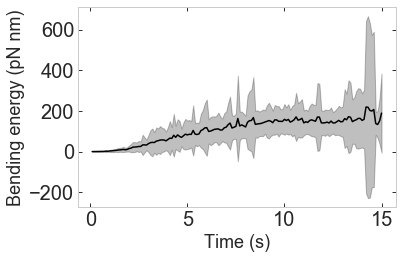

In [76]:
# plot indirect bending energy

sum_bending_energy_run_time = indirect_bound_ends_attachment.pivot_table(index=['run', 'time'], values='bending_energy', fill_value=0, dropna = False, aggfunc='sum')
# mean std grouped by time

mean_bending_energy_vs_time=sum_bending_energy_run_time.groupby('time').mean().iloc[:,0]
std_bending_energy_vs_time=sum_bending_energy_run_time.groupby('time').std().iloc[:,0]

plot_errorbar(mean_bending_energy_vs_time, std_bending_energy_vs_time, 'black', 'Bending energy (pN nm)')   



In [77]:
# combine direct and indirect filaments: sort by run and time and then set those as heirarchical index

branched_actin_bound_ends_bending = hip1r_bound_ends_attachment.append(indirect_bound_ends_attachment,ignore_index=True).sort_values(by=['run', 'time']).set_index(['run','time'])


branched_actin_bound_ends_bending.head()

fiber_id   length  minus_state  minus_xpos  minus_ypos  \
run          time                                                           
run0000_0000 0.1         19  0.01732            0     0.04914     0.01102   
             0.2         19  0.02592            0     0.04602     0.00846   
             0.3          5  0.10824            0     0.01505    -0.03792   
             0.3         18  0.08309            0     0.01357     0.02132   
             0.3         19  0.02592            0     0.04541     0.00864   

                   minus_zpos  minus_xdir  minus_ydir  minus_zdir  plus_state  \
run          time                                                               
run0000_0000 0.1     -0.40043    -0.70979     0.69946     0.08338           1   
             0.2     -0.40118    -0.30863     0.91192     0.27047           4   
             0.3     -0.34159    -0.71232     0.61783    -0.33299           4   
             0.3     -0.35393    -0.27757     0.63072    -0.72467           4   
             0.3     -0.40062    -0.31319     0.91315     0.26088           4   

                        ...        bud_xpos  bud_ypos  bud_zpos  \
run          time       ...                                       
run0000_0000 0.1        ...       -0.000494  0.000794 -0.399885   
             0.2        ...        0.001235  0.001104 -0.398323   
             0.3        ...        0.000638  0.001173 -0.397734   
             0.3        ...        0.000638  0.001173 -0.397734   
             0.3        ...        0.000638  0.001173 -0.397734   

                   bud_internalization  hip1r_xpos_recalibrated  \
run          time                                                 
run0000_0000 0.1              0.000115                 0.040858   
             0.2              0.001677                 0.038373   
             0.3              0.002266                -0.038655   
             0.3              0.002266                 0.005027   
             0.3              0.002266                 0.038373   

                   hip1r_ypos_recalibrated  hip1r_zpos_recalibrated  \
run          time                                                     
run0000_0000 0.1                  0.018851                 0.000477   
             0.2                  0.023505                -0.000198   
             0.3                  0.016035                 0.016543   
             0.3                  0.038749                 0.022322   
             0.3                  0.023505                -0.000198   

                   length_to_plus_end  bending_angle_degrees  bending_energy  
run          time                                                             
run0000_0000 0.1             0.004998               0.000000         0.00000  
             0.2             0.008549               0.000000         0.00000  
             0.3             0.021398               0.000000         0.00000  
             0.3             0.053963              25.176717        74.06769  
             0.3             0.008549               0.000000         0.00000  

[5 rows x 52 columns]

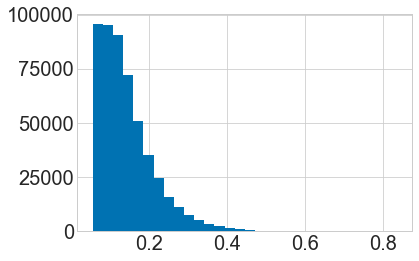

In [92]:
branched_actin_bound_ends_bending['plus_r_recalibrated_3D']=np.sqrt(pow(branched_actin_bound_ends_bending['plus_xpos_recalibrated'],2) +
                                                                   pow(branched_actin_bound_ends_bending['plus_ypos_recalibrated'],2) +
                                                                   pow(branched_actin_bound_ends_bending['plus_zpos_recalibrated'],2))

dists_3d = branched_actin_bound_ends_bending['plus_r_recalibrated_3D'].loc[branched_actin_bound_ends_bending['plus_r_recalibrated_3D']>0.055]

plt.hist(dists_3d,30)
plt.show()

In [78]:
# plot direct + indirect bending energy

sum_bending_energy_run_time = branched_actin_bound_ends_bending.pivot_table(index=['run', 'time'], values='bending_energy', fill_value=0, dropna = False, aggfunc='sum')
# mean std grouped by time

mean_bending_energy_vs_time=sum_bending_energy_run_time.groupby('time').mean().iloc[:,0]
std_bending_energy_vs_time=sum_bending_energy_run_time.groupby('time').std().iloc[:,0]

mean_bending_energy_vs_time

time
0.1       0.287578
0.2       1.986268
0.3      17.042942
0.4      24.971446
0.5      29.983262
0.6      14.116601
0.7      24.650933
0.8      34.611930
0.9      39.631113
1.0      39.401235
1.1      47.569345
1.2      67.238427
1.3      70.001565
1.4      62.441483
1.5      68.372187
1.6     106.121207
1.7      95.926655
1.8     133.074594
1.9      82.422925
2.0     123.293905
2.1     132.843060
2.2     155.982046
2.3     105.657462
2.4     133.379912
2.5     167.407688
2.6     192.698765
2.7     263.089323
2.8     207.007157
2.9     226.492586
3.0     203.810489
           ...    
12.1    559.620551
12.2    581.037722
12.3    541.571945
12.4    571.016584
12.5    562.533226
12.6    517.871486
12.7    563.038792
12.8    616.105653
12.9    490.472442
13.0    520.984743
13.1    573.104478
13.2    484.715741
13.3    563.800052
13.4    508.043974
13.5    544.697536
13.6    608.029490
13.7    596.517596
13.8    558.001400
13.9    578.499573
14.0    502.311467
14.1    518.941449
14.2   

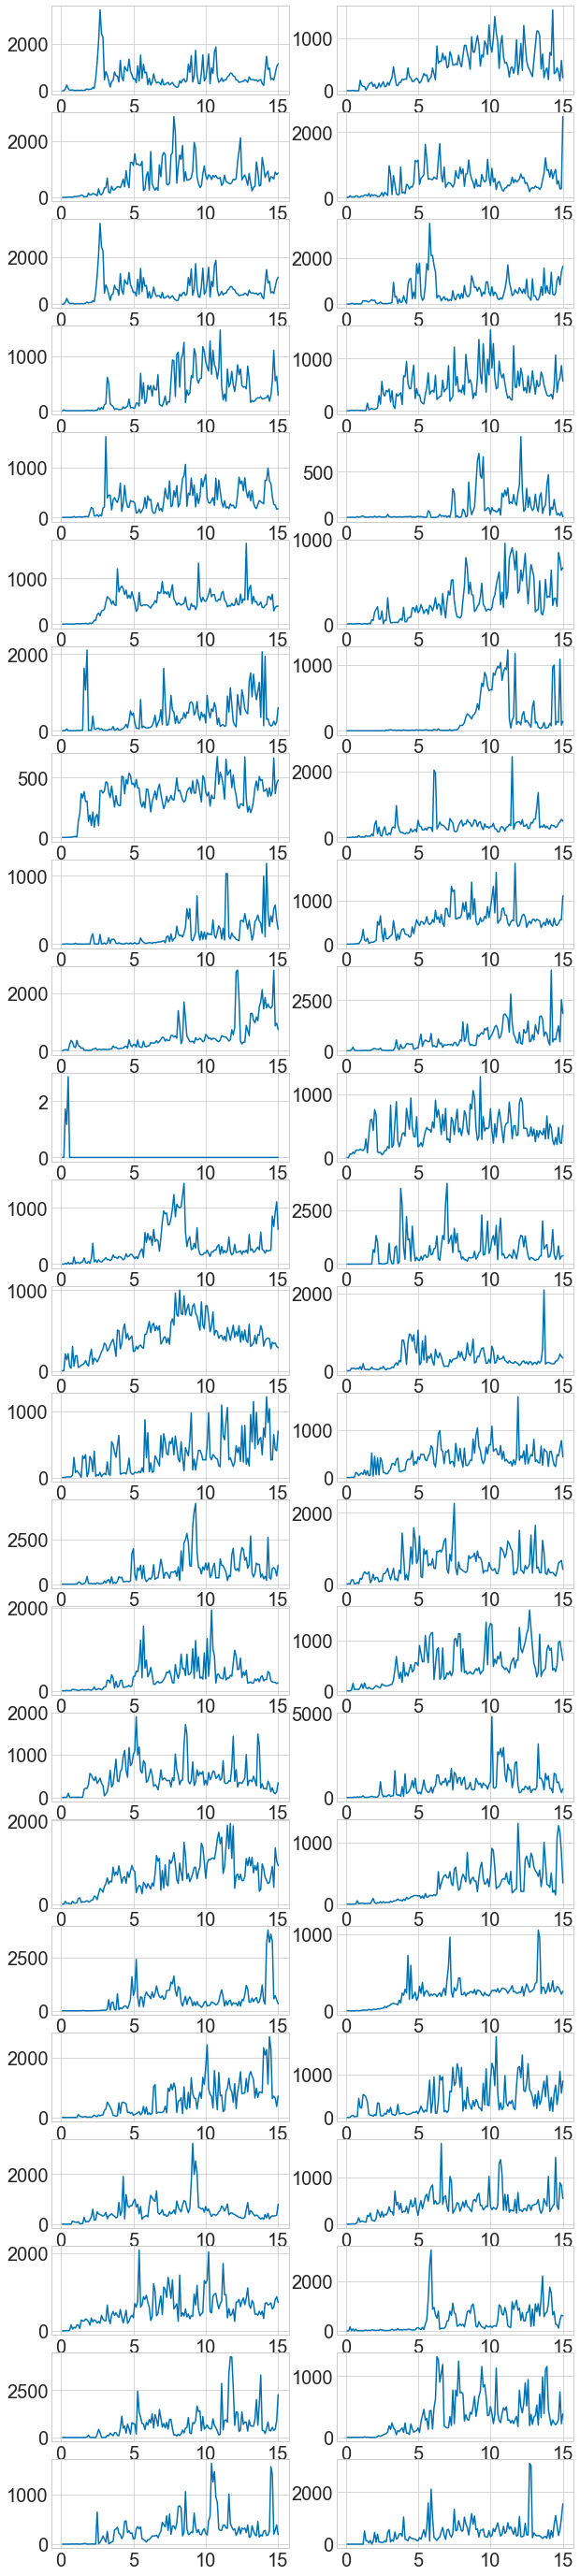

In [80]:
plt.figure(figsize=(10,50))
for i, runn in enumerate(runs):
    sum_bending_energy_time_one_run = sum_bending_energy_run_time.loc[runn]
    plt.subplot(24,2,i+1)
    plt.plot(sum_bending_energy_time_one_run.bending_energy)
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_bending_energy_all_plots_clusters.png')
    plt.savefig('../figures/'+pref+'_bending_energy_all_plots_clusters.pdf')
     
# plt.ylim(0, 300)

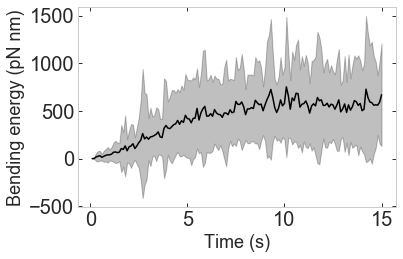

In [81]:
# plot
plot_errorbar(mean_bending_energy_vs_time, std_bending_energy_vs_time, 'black', 'Bending energy (pN nm)')   

if('save_figures'=='yes'):
    plt.savefig('../figures/'+pref+'_bending_energy_direct_indirect_vs_time.png')
    plt.savefig('../figures/'+pref+'_bending_energy_direct_indirect_vs_time.pdf')

In [82]:
# for filaments near base

# number of barbed ends at base versus neck: add to dataframe as True if within criteria

close_metric = 0.0075

near_base = branched_actin_bound_ends_bending['plus_zpos']+0.4<close_metric
branched_actin_bound_ends_bending['near_base'] = near_base

# # near_neck = (hip1r_clusters_ends_recalibrated['plus_rpos_recalibrated']<(0.03+close_metric) and hip1r_clusters_ends_recalibrated['plus_zpos_recalibrated']<0.010)
# nn1 = hip1r_clusters_ends_recalibrated['plus_rpos_recalibrated']<(0.03+close_metric)
# nn2 = hip1r_clusters_ends_recalibrated['plus_zpos_recalibrated']<0.010
# near_neck = nn1 & nn2

# # near_neck = [(all(x['plus_rpos_recalibrated']<(0.03+close_metric),x['plus_zpos_recalibrated']<0.010) for x in hip1r_clusters_ends_recalibrated)]
# hip1r_clusters_ends_recalibrated['near_neck'] = near_neck
branched_actin_bound_ends_bending.head()


fiber_id   length  minus_state  minus_xpos  minus_ypos  \
run          time                                                           
run0000_0000 0.1         19  0.01732            0     0.04914     0.01102   
             0.2         19  0.02592            0     0.04602     0.00846   
             0.3          5  0.10824            0     0.01505    -0.03792   
             0.3         18  0.08309            0     0.01357     0.02132   
             0.3         19  0.02592            0     0.04541     0.00864   

                   minus_zpos  minus_xdir  minus_ydir  minus_zdir  plus_state  \
run          time                                                               
run0000_0000 0.1     -0.40043    -0.70979     0.69946     0.08338           1   
             0.2     -0.40118    -0.30863     0.91192     0.27047           4   
             0.3     -0.34159    -0.71232     0.61783    -0.33299           4   
             0.3     -0.35393    -0.27757     0.63072    -0.72467           4   
             0.3     -0.40062    -0.31319     0.91315     0.26088           4   

                     ...      bud_ypos  bud_zpos  bud_internalization  \
run          time    ...                                                
run0000_0000 0.1     ...      0.000794 -0.399885             0.000115   
             0.2     ...      0.001104 -0.398323             0.001677   
             0.3     ...      0.001173 -0.397734             0.002266   
             0.3     ...      0.001173 -0.397734             0.002266   
             0.3     ...      0.001173 -0.397734             0.002266   

                   hip1r_xpos_recalibrated  hip1r_ypos_recalibrated  \
run          time                                                     
run0000_0000 0.1                  0.040858                 0.018851   
             0.2                  0.038373                 0.023505   
             0.3                 -0.038655                 0.016035   
             0.3                  0.005027                 0.038749   
             0.3                  0.038373                 0.023505   

                   hip1r_zpos_recalibrated  length_to_plus_end  \
run          time                                                
run0000_0000 0.1                  0.000477            0.004998   
             0.2                 -0.000198            0.008549   
             0.3                  0.016543            0.021398   
             0.3                  0.022322            0.053963   
             0.3                 -0.000198            0.008549   

                   bending_angle_degrees  bending_energy  near_base  
run          time                                                    
run0000_0000 0.1                0.000000         0.00000       True  
             0.2                0.000000         0.00000       True  
             0.3                0.000000         0.00000       True  
             0.3               25.176717        74.06769       True  
             0.3                0.000000         0.00000       True  

[5 rows x 53 columns]

In [125]:
filaments_near_base = branched_actin_bound_ends_bending.loc[branched_actin_bound_ends_bending['near_base']]

# filaments_near_base_sum_bending = filaments_near_base.pivot_table(index=['run', 'time'], values='bending_energy', fill_value=0, dropna = False, aggfunc='sum')
filaments_near_base_agg= filaments_near_base.pivot_table(index=['run', 'time'], fill_value=0, dropna = False, aggfunc={'bending_energy':'sum', 'bending_angle_degrees':'mean', 'length_to_plus_end':'mean'})


# mean std grouped by time
# filaments_near_base.groupby(['run', 'time']).
filaments_near_base_agg_time = filaments_near_base_agg.groupby('time')
filaments_near_base_agg_time.mean()


bending_angle_degrees  bending_energy  length_to_plus_end
time                                                           
0.1                0.053387        0.020379            0.007248
0.2                0.829984        1.229586            0.007869
0.3                3.022018       14.519200            0.014907
0.4                6.494048       22.238825            0.031054
0.5                5.231821       22.186466            0.025333
0.6                4.609115       11.064932            0.027810
0.7                5.118846       13.921254            0.041304
0.8                7.037011       22.728183            0.044349
0.9                7.653328       28.784769            0.041353
1.0                8.695718       25.689541            0.044846
1.1                7.692064       35.547190            0.045794
1.2                8.117987       42.777611            0.043073
1.3                8.154911       50.047288            0.048668
1.4                5.575269       31.428047            0.046610
1.5                8.475061       39.263781            0.045076
1.6                5.653193       33.444593            0.047250
1.7                5.118451       28.418354            0.042947
1.8                6.254463       41.035151            0.054762
1.9                6.127453       24.409352            0.050357
2.0                6.357578       31.050889            0.050055
2.1                6.096259       26.725510            0.055921
2.2               10.040115       65.563761            0.058230
2.3                5.837473       37.813067            0.050937
2.4                5.560884       60.353724            0.050522
2.5                7.062994       47.955957            0.058004
2.6                6.116903       52.172942            0.055823
2.7                7.578007       57.211930            0.069121
2.8                5.775397       49.642480            0.061764
2.9                5.707102       59.999835            0.059925
3.0                6.111905       65.678332            0.062422
...                     ...             ...                 ...
12.1               9.228405       82.945685            0.104919
12.2               8.473672       95.198800            0.093859
12.3               8.574297       72.943957            0.098879
12.4               9.101305       82.322846            0.098916
12.5              10.259926       76.481082            0.099528
12.6               8.309979       71.261819            0.089633
12.7               9.711255       74.354670            0.097463
12.8               8.960558       60.426823            0.103440
12.9               8.842049       54.588798            0.104112
13.0               9.083547       54.433741            0.102932
13.1               8.528840       56.716750            0.103075
13.2               8.051760       49.741955            0.094047
13.3               7.663600       40.350944            0.106513
13.4               8.893331       47.952416            0.101679
13.5               8.939387       44.248429            0.101197
13.6               7.479583       45.222932            0.095623
13.7               7.268310       41.295926            0.097578
13.8               7.815531       39.734781            0.102943
13.9               8.534115       37.432692            0.105092
14.0               9.959591       42.649065            0.106667
14.1               7.608521       38.370959            0.099801
14.2               7.087319       32.165547            0.095246
14.3               7.418841       37.170846            0.100404
14.4               7.516837       45.055424            0.093846
14.5               6.951240       36.207557            0.098542
14.6               6.889807       34.980359            0.094697
14.7               7.296838       29.739571            0.107178
14.8               7.668508       34.328359            0.102996
14.9               6.936382       33.156588            0.098625
15.0               8.060630       37.8

Text(0,0.5,'Free filament length (µm)')

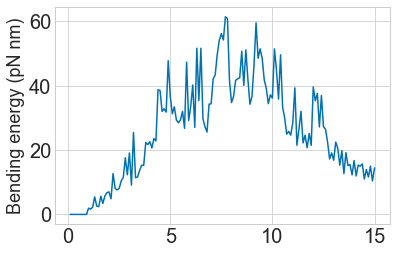

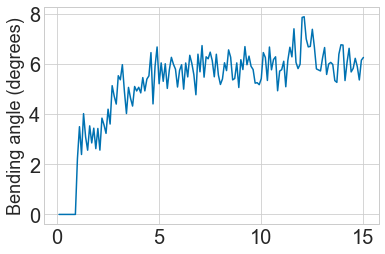

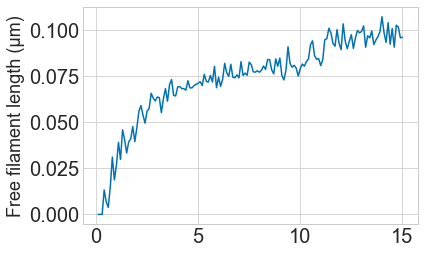

In [128]:
plt.plot(filaments_near_base_agg_time['bending_energy'].median())
plt.ylabel('Bending energy (pN nm)')
plt.figure()

plt.plot(filaments_near_base_agg_time['bending_angle_degrees'].median())
plt.ylabel('Bending angle (degrees)')

plt.figure()
plt.plot(filaments_near_base_agg_time['length_to_plus_end'].median())
plt.ylabel('Free filament length (µm)')



In [ ]:
plt.plot(filaments_near_base_agg_time['bending_energy'].mean())
plt.ylabel('Bending energy (pN nm)')

In [84]:
#  to plot multiple 

def plot_multiple_errorbars(means, stds, c, label):

    # You can call this multiple time to make several plot son top of each other. 


#     plt.figure(figsize=(6,4))
    plt.rc('font', size=20) 
    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20) 

    color=c

    plt.plot(means.index,means, c=color)
    times_cur = means.index
    yminus=means-stds
    yplus=means+stds

    plt.fill_between(times_cur, np.asarray(yminus), np.asarray(yplus), alpha=0.25,edgecolor=color, facecolor=color, linewidth=1, antialiased=True) 

    plt.xlabel('Time (s)')
    plt.ylabel(label)

    plt.tick_params(reset=True, color='black', direction='in', length=4)
    plt.grid(False)

    plt.tight_layout()

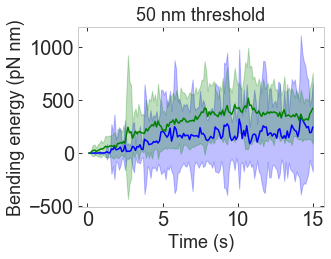

In [114]:
# within bud versus outside bud
# threshold (=threshold is defnied as inside bud)

inside_bud_threshold = 0.05

inside_bud_filaments = branched_actin_bound_ends_bending.loc[branched_actin_bound_ends_bending['plus_r_recalibrated_3D']<=inside_bud_threshold ]

outside_bud_filaments = branched_actin_bound_ends_bending.loc[branched_actin_bound_ends_bending['plus_r_recalibrated_3D']>inside_bud_threshold ]

sum_bending_energy_run_time_inside_bud  = inside_bud_filaments.pivot_table(index=['run', 'time'], values='bending_energy', fill_value=0, dropna = False, aggfunc='sum')
sum_bending_energy_run_time_outside_bud = outside_bud_filaments.pivot_table(index=['run', 'time'], values='bending_energy', fill_value=0, dropna = False, aggfunc='sum')


# mean std grouped by time

mean_bending_energy_vs_time_inside_bud=sum_bending_energy_run_time_inside_bud.groupby('time').mean().iloc[:,0]
std_bending_energy_vs_time_inside_bud=sum_bending_energy_run_time_inside_bud.groupby('time').std().iloc[:,0]

mean_bending_energy_vs_time_outside_bud=sum_bending_energy_run_time_outside_bud.groupby('time').mean().iloc[:,0]
std_bending_energy_vs_time_outside_bud =sum_bending_energy_run_time_outside_bud.groupby('time').std().iloc[:,0]


plt.figure(figsize=(5,4))

plot_multiple_errorbars(mean_bending_energy_vs_time_inside_bud, std_bending_energy_vs_time_inside_bud, 'blue', 'Bending energy (pN nm)')   

plot_multiple_errorbars(mean_bending_energy_vs_time_outside_bud, std_bending_energy_vs_time_outside_bud, 'green', 'Bending energy (pN nm)')   

plt.title(str(int(inside_bud_threshold*1000))+' nm threshold')

plt.tight_layout()


if(save_figures =='yes'):
    plt.savefig('../figures/'+pref+'_bending_energy_inside_outside_bud_'+str(int(inside_bud_threshold*1000))+'nm.png')
    plt.savefig('../figures/'+pref+'_bending_energy_inside_outside_bud_'+str(int(inside_bud_threshold*1000))+'nm.pdf')
    




# plot bending angle, number, and average or sum bending energy (maybe force from end in Z) 
# for the filaments with ends close to base

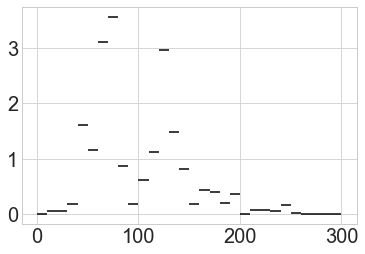

In [330]:
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:])


In [ ]:
bin_centers = bin_edges[1:] - bin_width/2

time 1
time 2
time 3
time 4
time 5
time 6
time 7
time 8
time 9
time 10
time 11
time 12
time 13
time 14
time 15


<Figure size 432x288 with 0 Axes>

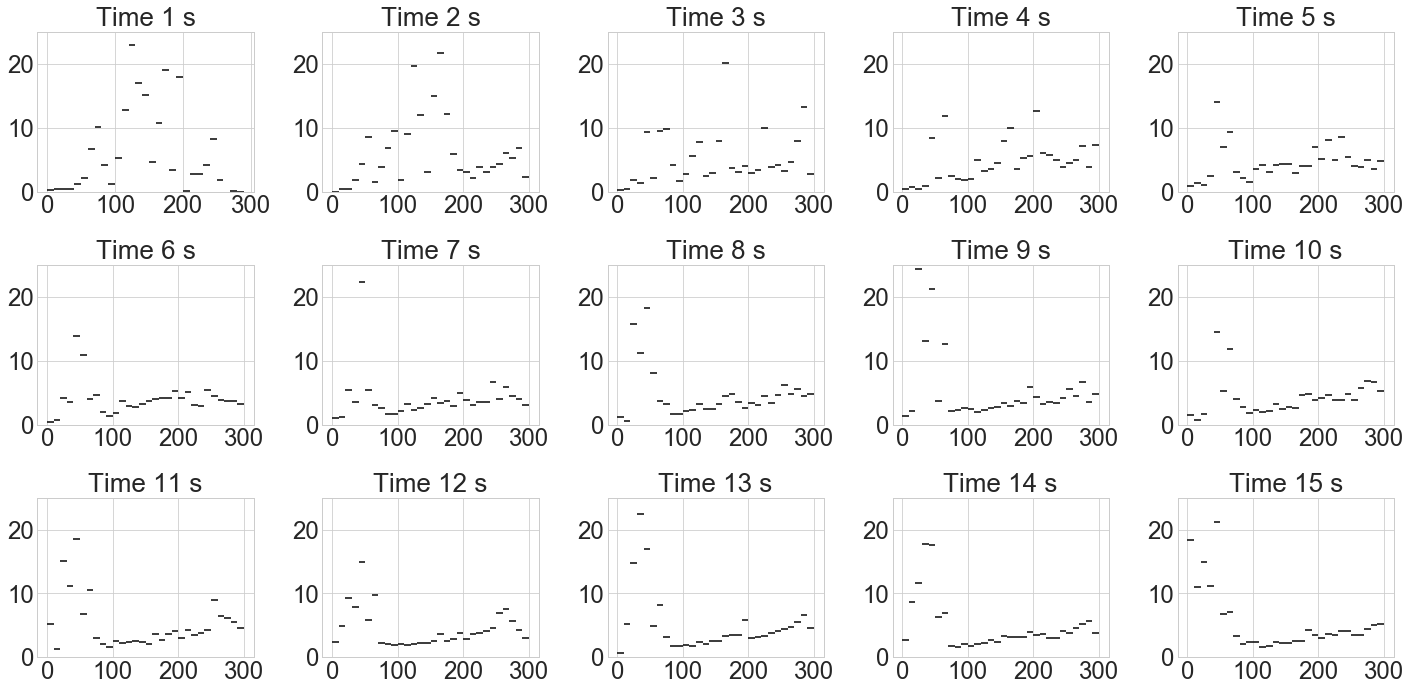

In [337]:
# over time

from scipy.stats import binned_statistic

# versus R and Z
plt.set_cmap('magma')
# filter by length of free filament

# free_length_threshold = 0.0


ends = branched_actin_bound_ends_bending.reset_index()
# outside_bud = 'yes'

plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,1),start=1):

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
#     ends_time = indirect_bound_ends_attachment.loc[indirect_bound_ends_attachment['length_to_plus_end']>free_length_threshold]
    
#     ends_time = ends_time.reset_index()
#     if outside_bud=='yes':
#         in_bud_idx =ends_time.loc[ends_time['plus_rpos_recalibrated']<0.05].loc[ends_time['plus_zpos_recalibrated']>-0.05].loc[ends_time['plus_zpos_recalibrated']<0.05].index
#         ends_time = ends_time.drop(in_bud_idx)
#     branched_actin_bound_ends_no_index=ends_time.reset_index()

    branched_actin_bound_ends_time=ends.loc[ends['time']>(timept-1)].loc[ends['time']<=(timept)]

  # set position
    
    x = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000

    y = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)
    
    color = branched_actin_bound_ends_time['bending_energy']

#     2D heat map
    
#     bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, bins=30, statistic='sum', range = [[0,300],[-200,0]])
#     bin_means = np.flipud(np.rot90(bin_means))

# hist

    bin_means, bin_edges, bin_numbers = binned_statistic(x, color, bins=30, statistic='mean', range = [0,300])
#     bin_means = np.flipud(np.rot90(bin_means))
    
#     bin_means = bin_means/len(runs)/10
    
    plt.subplot(3, 5, i)
#     plt.pcolormesh(xedges, yedges, bin_means)
#     plt.hist(x, color)
#     plt.plot(binnumbers, bin_means)
    plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:])

    
#     cb = plt.colorbar(label = 'Bending energy (pN nm)')
    plt.title('Time ' + str(timept) + ' s', fontsize=26)
    plt.ylim([0, 25])
#     plt.yticks([-90, -45, 0, 45, 90])
    
    plt.xticks(size=24)
    plt.yticks(size=24)
    plt.xticks([0,100,200,300])
#     plt.xlim([0,80])
#     plt.ylim([-80, 0])

    plt.tight_layout()
    
    
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'bending_energy_mean_hist_time_vs_r_subplots.png')
    plt.savefig('../figures/'+pref+'bending_energy_mean_hist_time_vs_r_subplots.pdf')
    


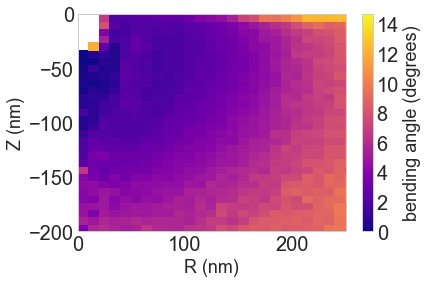

In [264]:
# versus RZ: mean bending angle in heat map
from scipy.stats import binned_statistic_2d

x = branched_actin_bound_ends_bending['plus_rpos_recalibrated']*1000
y = (branched_actin_bound_ends_bending['plus_zpos']+0.4)*(-1000)

color = branched_actin_bound_ends_bending['bending_angle_degrees']
# x = hip1r_bound_ends_attachment['bending_energy']

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='mean', range = [[0,300],[-200,0]])
bin_means = np.flipud(np.rot90(bin_means))

# bin_means = bin_means/len(runs)/len(times)

plt.pcolormesh(xedges, yedges, bin_means)

plt.colorbar(label='bending angle (degrees)')
plt.xlabel('R (nm)')
plt.ylabel('Z (nm)')

plt.ylim([-200,0])
plt.xlim([0, 250])


plt.savefig('../figures/'+pref+'bending_angles_direct_indirect_vs_RZ.pdf')

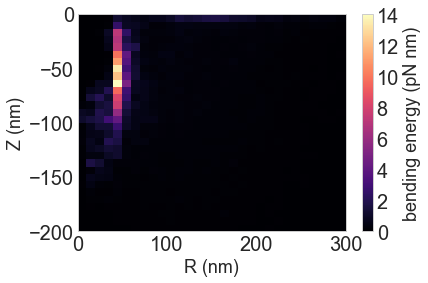

In [124]:
# versus RZ: sum bending energy in heat map
from scipy.stats import binned_statistic_2d

x = branched_actin_bound_ends_bending['plus_rpos_recalibrated']*1000
y = (branched_actin_bound_ends_bending['plus_zpos']+0.4)*(-1000)

color = branched_actin_bound_ends_bending['bending_energy']
# x = hip1r_bound_ends_attachment['bending_energy']

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='sum', range = [[0,300],[-200,0]])
bin_means = np.flipud(np.rot90(bin_means))

bin_means = bin_means/len(runs)/len(times)

plt.pcolormesh(xedges, yedges, bin_means)

plt.colorbar(label='bending energy (pN nm)')
plt.xlabel('R (nm)')
plt.ylabel('Z (nm)')

plt.ylim([-200,0])
# plt.clim([0, 5])


plt.savefig('../figures/'+pref+'bending_energy_direct_indirect_vs_RZ.pdf')

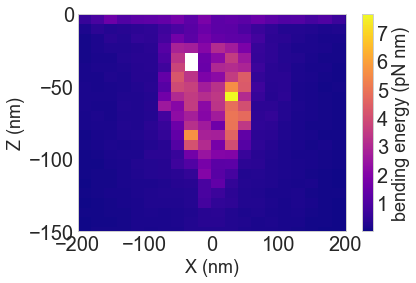

In [215]:
# versus XZ: sum bending energy in heat map
from scipy.stats import binned_statistic_2d

x = branched_actin_bound_ends_bending['plus_xpos_recalibrated']*1000
y = (branched_actin_bound_ends_bending['plus_zpos']+0.4)*(-1000)

color = branched_actin_bound_ends_bending['bending_energy']
# x = hip1r_bound_ends_attachment['bending_energy']

bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, 
  bins=30, statistic='sum', range = [[-300,300],[-200,0]])
bin_means = np.flipud(np.rot90(bin_means))

bin_means = bin_means/len(runs)/len(times)

plt.pcolormesh(xedges, yedges, bin_means)

plt.colorbar(label='bending energy (pN nm)')
plt.xlabel('X (nm)')
plt.ylabel('Z (nm)')


# plt.clim([0,3])
plt.ylim([-150,0])
plt.xlim([-200, 200])

plt.savefig('../figures/'+pref+'bending_energy_direct_indirect_vs_XZ.pdf')

In [ ]:

# filaments with plus end not stuck in bud.

# plot versus R
# plot versus Z


# contour map bending angle versus L


# heat map versus Z and R. can make a function for this.

# based on max actin plots? or?

In [ ]:
# histogram the top 20 nm or so near base, bending energy 

time 1
time 3
time 5
time 7
time 9
time 11
time 13
time 15


<Figure size 432x288 with 0 Axes>

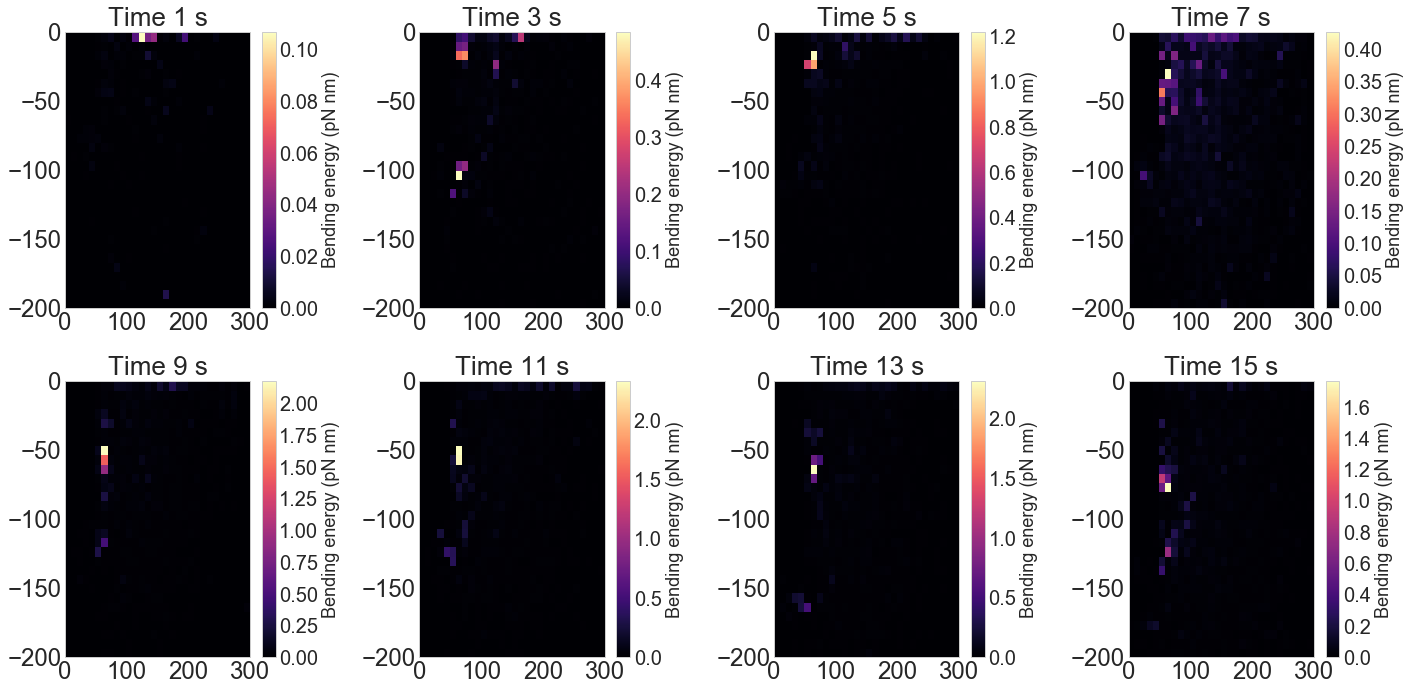

In [53]:
# over time

# versus R and Z
plt.set_cmap('magma')
# filter by length of free filament

free_length_threshold = 0.00

outside_bud = 'yes'

plt.figure(figsize=(20,10))

for i, timept in enumerate(range(1,16,2),start=1):

    print('time ' + str(timept))
    
    # bin ± 0.5s as interval
    
    ends_time = branched_actin_bound_ends_bending.loc[branched_actin_bound_ends_bending['length_to_plus_end']>free_length_threshold]
    
    ends_time = ends_time.reset_index()
    if outside_bud=='yes':
        in_bud_idx =ends_time.loc[ends_time['plus_rpos_recalibrated']<0.055].loc[ends_time['plus_zpos_recalibrated']>-0.055].loc[ends_time['plus_zpos_recalibrated']<0.055].index
        ends_time = ends_time.drop(in_bud_idx)
    branched_actin_bound_ends_no_index=ends_time.reset_index()

    branched_actin_bound_ends_time=branched_actin_bound_ends_no_index.loc[branched_actin_bound_ends_no_index['time']>(timept-1)].loc[branched_actin_bound_ends_no_index['time']<=(timept)]

  # set position
    
    x = branched_actin_bound_ends_time.plus_rpos_recalibrated*1000

    y = (branched_actin_bound_ends_time.plus_zpos+0.4)*(-1000)
    
    color = branched_actin_bound_ends_time['bending_energy']

    bin_means, xedges, yedges, binnumbers = binned_statistic_2d(x, y, color, bins=30, statistic='sum', range = [[0,300],[-200,0]])
    bin_means = np.flipud(np.rot90(bin_means))

    bin_means = bin_means/len(runs)/len(times)
    
    plt.subplot(2, 4, i)
    plt.pcolormesh(xedges, yedges, bin_means)


    
    cb = plt.colorbar(label = 'Bending energy (pN nm)')
    plt.title('Time ' + str(timept) + ' s', fontsize=26)
    
#     plt.yticks([-90, -45, 0, 45, 90])
    
    plt.xticks(size=24)
    plt.yticks(size=24)
    
#     plt.xlim([0,80])
#     plt.ylim([-80, 0])

    plt.tight_layout()
    
    
# if save_figures == 'yes': 
#     plt.savefig('../figures/'+pref+'radial_orientation_time_vs_r_subplots_relative_colorbar.png')
#     plt.savefig('../figures/'+pref+'radial_orientation_time_vs_r_subplots_relative_colorbar.pdf')
    


107532 ends near bud out of 576697


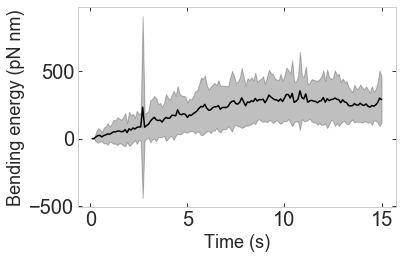

In [86]:
# outside bud, bending energy over time

free_length_threshold = 0.005

ends_time = branched_actin_bound_ends_bending
ends_time = ends_time.reset_index()
ends_time = ends_time.loc[ends_time['length_to_plus_end']>free_length_threshold]
    
if outside_bud=='yes':
    in_bud_idx =ends_time.loc[ends_time['plus_rpos_recalibrated']<0.06].loc[ends_time['plus_zpos_recalibrated']>-0.06].loc[ends_time['plus_zpos_recalibrated']<0.06].index
    print(str(len(in_bud_idx))+' ends near bud out of '+str(len(ends_time)))
    ends_time = ends_time.drop(in_bud_idx)

# plot direct + indirect bending energy

sum_bending_energy_run_time = ends_time.pivot_table(index=['run', 'time'], values='bending_energy', fill_value=0, dropna = False, aggfunc='sum')
# mean std grouped by time

mean_bending_energy_vs_time=sum_bending_energy_run_time.groupby('time').mean().iloc[:,0]
std_bending_energy_vs_time=sum_bending_energy_run_time.groupby('time').std().iloc[:,0]

# mean_bending_energy_vs_time

# plot
plot_errorbar(mean_bending_energy_vs_time, std_bending_energy_vs_time, 'black', 'Bending energy (pN nm)')   

if('save_figures'=='yes'):
    plt.savefig('../figures/'+pref+'_bending_energy_direct_indirect_vs_time_outside_bud.png')
    plt.savefig('../figures/'+pref+'_bending_energy_direct_indirect_vs_time_outside_bud.pdf')

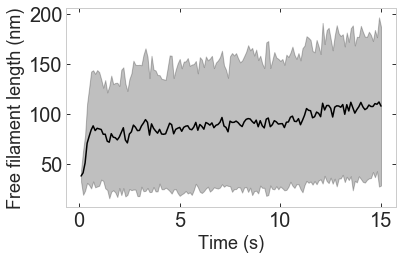

In [109]:

mean_lengths_to_plus_end = ends_time.groupby('time')['length_to_plus_end'].mean()
std_lengths_to_plus_end = ends_time.groupby('time')['length_to_plus_end'].std()

plot_errorbar(mean_lengths_to_plus_end*1000, std_lengths_to_plus_end*1000, 'black', 'Free filament length (nm)')   

if('save_figures'=='yes'):
    plt.savefig('../figures/'+pref+'_free_filament_length_time.png')
    plt.savefig('../figures/'+pref+'_free_filament_length_time.pdf')


83393 ends near bud out of 566054


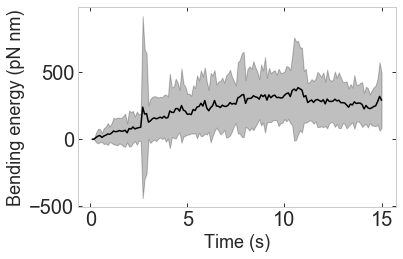

In [121]:
# just ends near base, bending energy over time

free_length_threshold = 0.000

base_threshold = 0.2

outside_bud = 'yes'
outside_bud_threshold = 0.055

ends_time = branched_actin_bound_ends_bending
ends_time = ends_time.reset_index()
ends_time = ends_time.loc[ends_time['length_to_plus_end']>free_length_threshold]

# near base only (for direct bound only? try too)

ends_time = ends_time.loc[(ends_time['plus_zpos']+0.4)<base_threshold]

if outside_bud=='yes':
    in_bud_idx =ends_time.loc[ends_time['plus_r_recalibrated_3D']<outside_bud_threshold].index
    print(str(len(in_bud_idx))+' ends near bud out of '+str(len(ends_time)))
    ends_time = ends_time.drop(in_bud_idx)

# plot direct + indirect bending energy

sum_bending_energy_run_time = ends_time.pivot_table(index=['run', 'time'], values='bending_energy', fill_value=0, dropna = False, aggfunc='sum')
# mean std grouped by time

mean_bending_energy_vs_time=sum_bending_energy_run_time.groupby('time').mean().iloc[:,0]
std_bending_energy_vs_time=sum_bending_energy_run_time.groupby('time').std().iloc[:,0]

# mean_bending_energy_vs_time

# plot
plot_errorbar(mean_bending_energy_vs_time, std_bending_energy_vs_time, 'black', 'Bending energy (pN nm)')   

if(save_figures=='yes'):
    plt.savefig('../figures/'+pref+'_bending_energy_cluster_r>'+str(outside_bud_threshold)+'base<'+str(base_threshold)+'.png')
    plt.savefig('../figures/'+pref+'_bending_energy_cluster_r>'+str(outside_bud_threshold)+'base<'+str(base_threshold)+'.pdf')

KeyError: 'the label [run0000_0020] is not in the [index]'

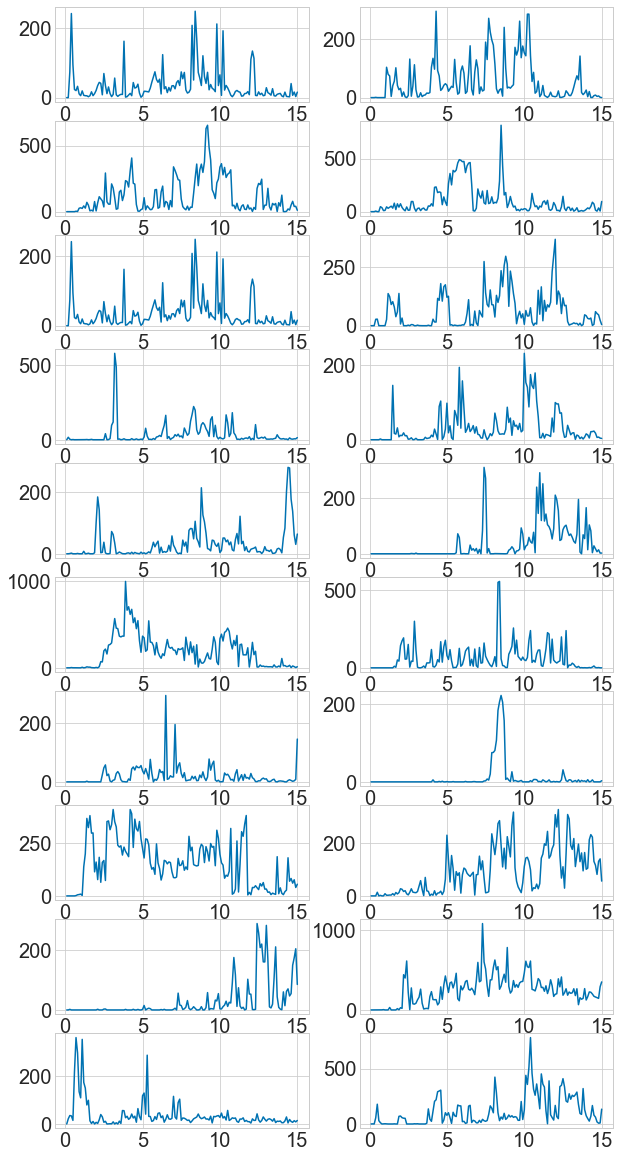

In [100]:
# be= sum_bending_energy_run_time.reset_index()
plt.figure(figsize=(10,50))
for i, runn in enumerate(runs):
    sum_bending_energy_time_one_run = sum_bending_energy_run_time.loc[runn]
    plt.subplot(24,2,i+1)
    plt.plot(sum_bending_energy_time_one_run.bending_energy)
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_bending_energy_all_plots_near_base_outside_bud.png')
    plt.savefig('../figures/'+pref+'_bending_energy_all_plots_near_base_outside_bud.pdf')
    
# abs y 
plt.figure(figsize=(10,50))
for i, runn in enumerate(runs):
    sum_bending_energy_time_one_run = sum_bending_energy_run_time.loc[runn]
    plt.subplot(24,2,i+1)
    plt.plot(sum_bending_energy_time_one_run.bending_energy)
    plt.ylim(0, 2500)
if save_figures == 'yes': 
    plt.savefig('../figures/'+pref+'_bending_energy_all_plots_near_base_abs_outside_bud.png')
    plt.savefig('../figures/'+pref+'_bending_energy_all_plots_near_base_abs_outside_bud.pdf')
 


In [ ]:
# do plot by plot for seeral nb ends near base measruements too.


In [ ]:
# anticorrelate bending energy with futher internalziaton after t = 10 s


In [ ]:
## capped versus growing filaments: bending energy


## bending energy versus internalization! 


## end